In [21]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor




import warnings
warnings.filterwarnings('ignore')

In [2]:
start = "2009-01-01"
end = '2019-1-01'
coke = yf.download('KO',start,end)
pepsi = yf.download('PEP',start,end)
monster = yf.download('MNST',start,end)
nestle = yf.download('NSRGY',start,end)


apple = yf.download('AAPL',start,end)
microsoft = yf.download('MSFT',start,end)
google = yf.download('GOOGL',start,end)
sony = yf.download('SONY',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Fix the index
coke['Date'] = coke.index
pepsi['Date'] = pepsi.index
monster['Date'] = monster.index
nestle['Date'] = nestle.index

apple['Date'] = apple.index
microsoft['Date'] = microsoft.index
google['Date'] = google.index
sony['Date'] = sony.index

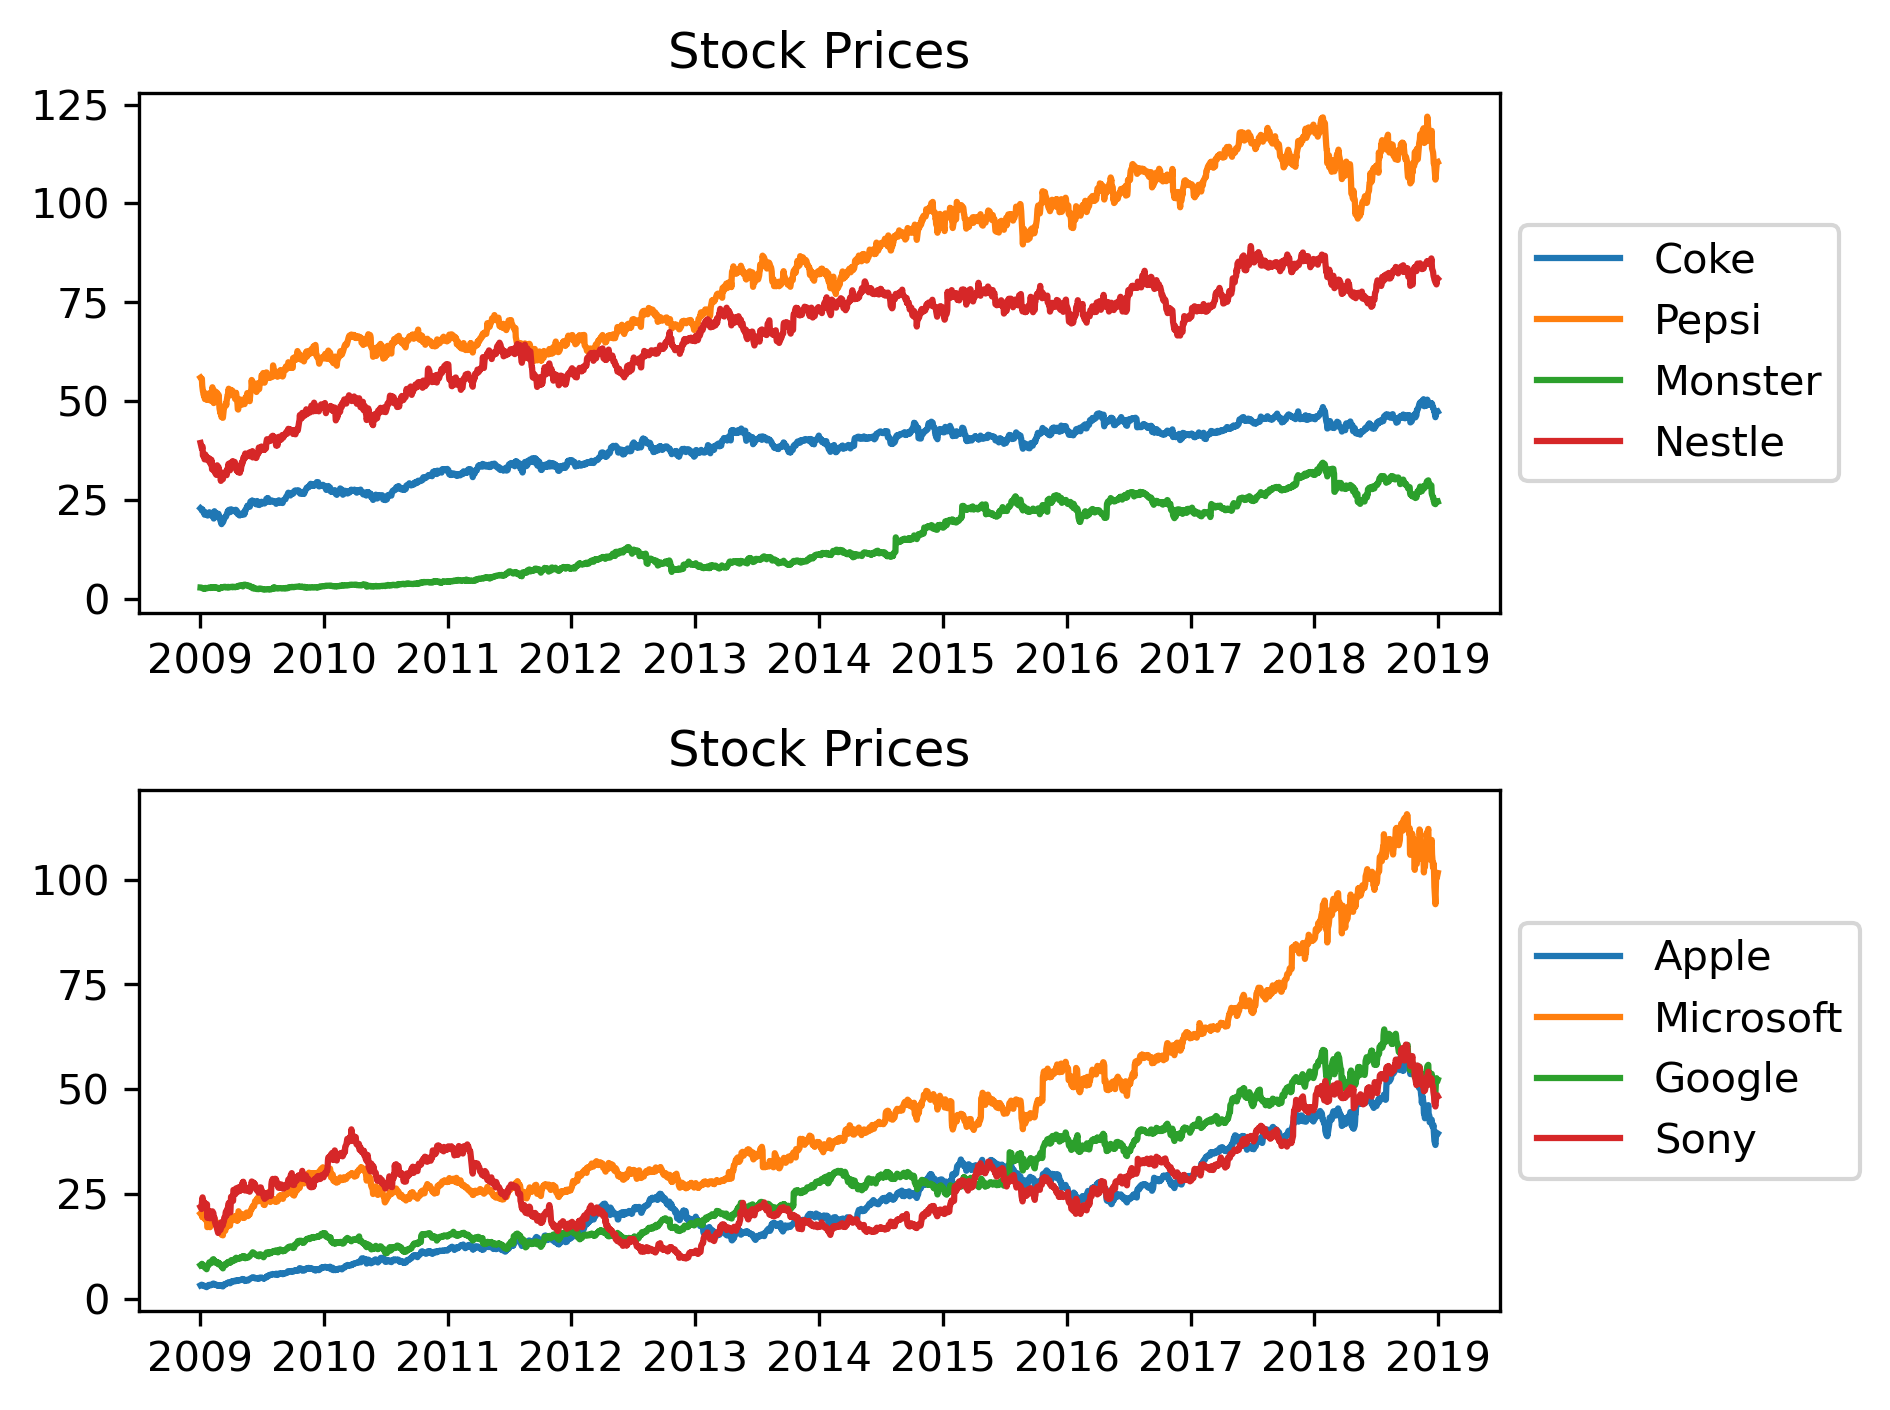

In [4]:
plt.figure(dpi=300)
plt.subplot(2, 1, 1)
plt.plot(coke['Close'], label='Coke')
plt.plot(pepsi['Close'], label='Pepsi')
plt.plot(monster['Close'], label='Monster')
plt.plot(nestle['Close'], label='Nestle')
plt.title('Stock Prices')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2, 1, 2)
plt.plot(apple['Close'], label='Apple')
plt.plot(microsoft['Close'], label='Microsoft')
plt.plot(google['Close'], label='Google')
plt.plot(sony['Close'], label='Sony')
plt.title('Stock Prices')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [5]:
def rolling_mean(data):
    data['MA50'] = data['Open'].rolling(50).mean()
    data['MA200'] = data['Open'].rolling(200).mean()
    data['Open'].plot(figsize = (15,7))
    data['MA50'].plot()
    data['MA200'].plot()
    plt.legend()

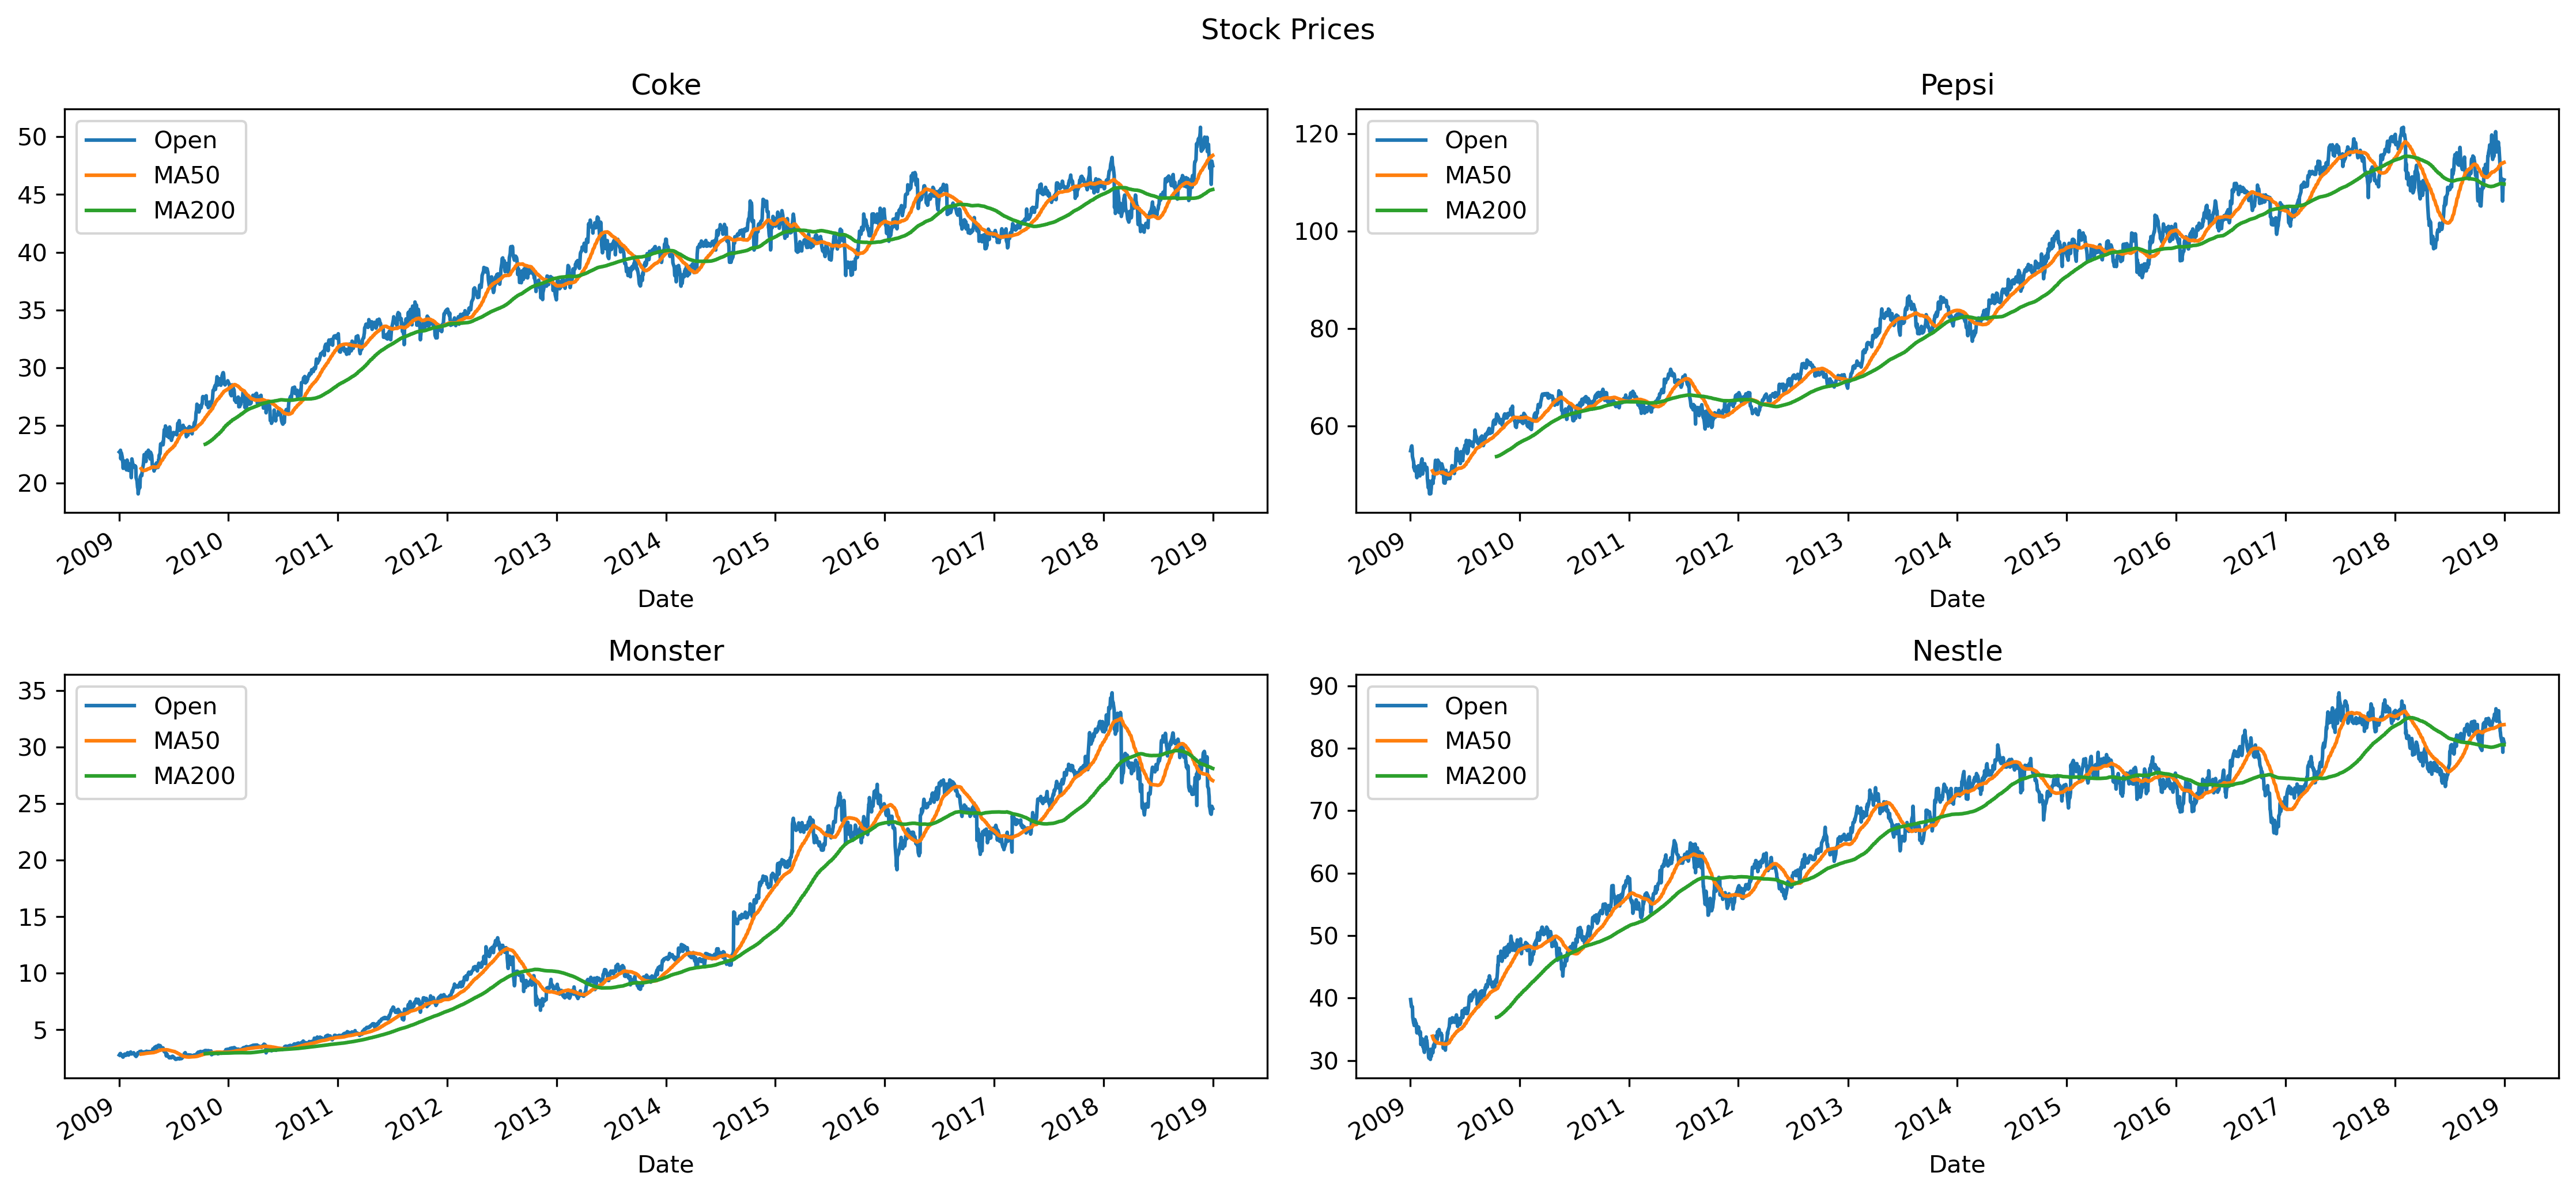

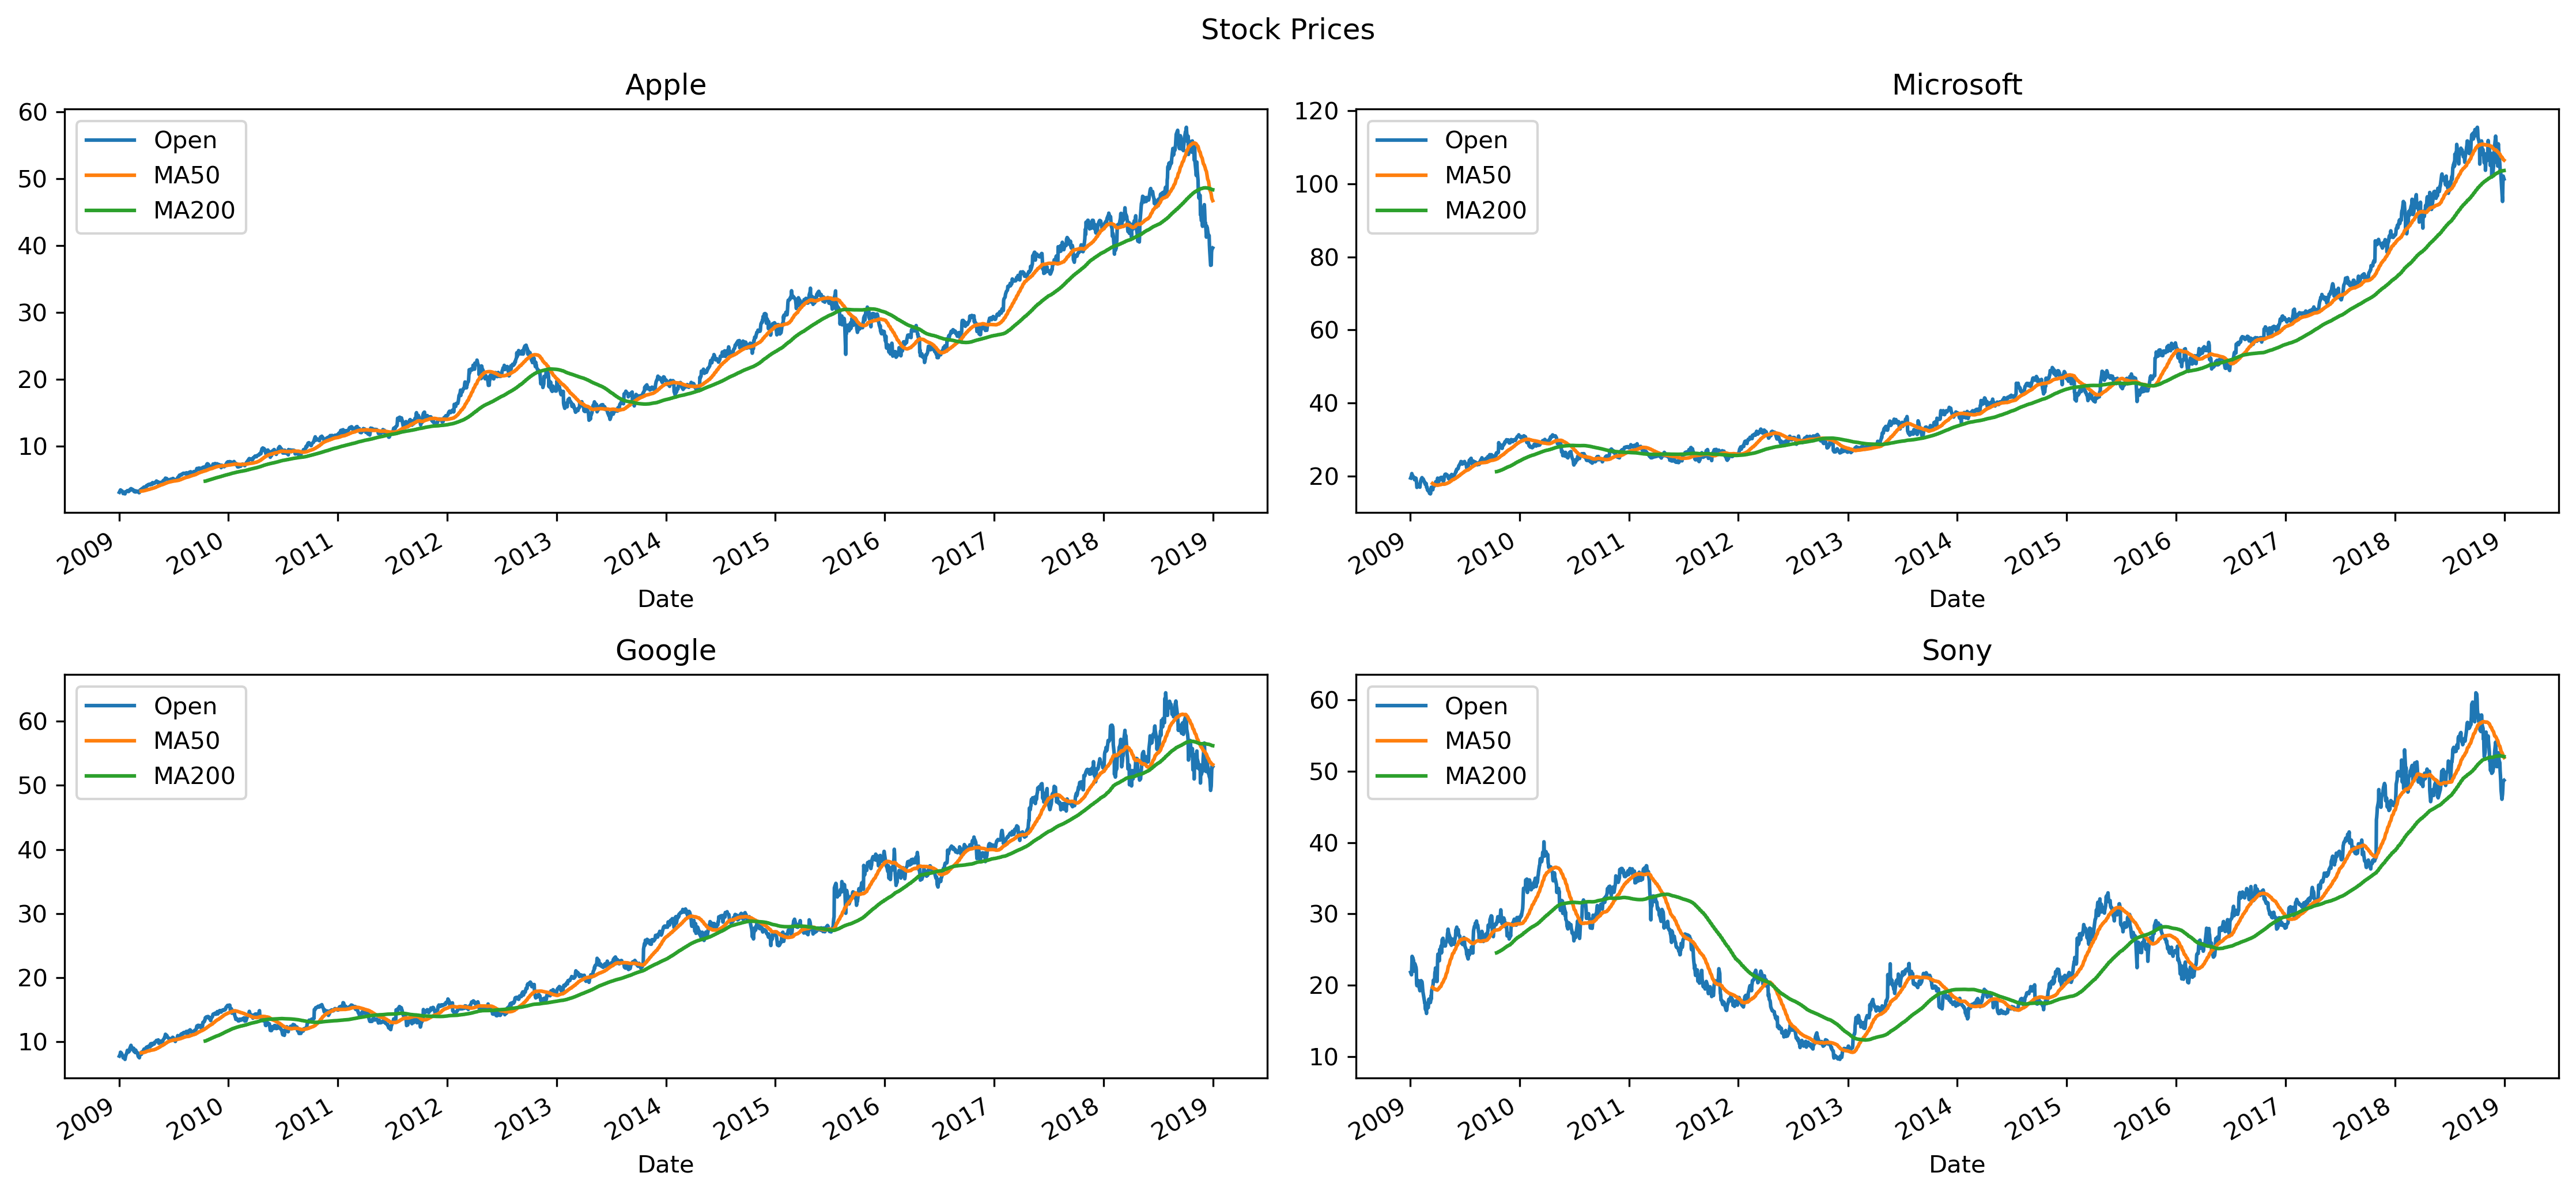

In [6]:
plt.figure(dpi=300)
plt.subplot(2, 2, 1)
rolling_mean(coke)
plt.title('Coke')

plt.subplot(2, 2, 2)
rolling_mean(pepsi)
plt.title('Pepsi')

plt.subplot(2, 2, 3)
rolling_mean(monster)
plt.title('Monster')

plt.subplot(2, 2, 4)
rolling_mean(nestle)
plt.title('Nestle')

plt.suptitle('Stock Prices')
plt.tight_layout()
plt.show()

plt.figure(dpi=300)
plt.subplot(2, 2, 1)
rolling_mean(apple)
plt.title('Apple')

plt.subplot(2, 2, 2)
rolling_mean(microsoft)
plt.title('Microsoft')

plt.subplot(2, 2, 3)
rolling_mean(google)
plt.title('Google')

plt.subplot(2, 2, 4)
rolling_mean(sony)
plt.title('Sony')

plt.suptitle('Stock Prices')
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='AppleOpen', ylabel='AppleOpen'>,
        <Axes: xlabel='MicrosoftOpen', ylabel='AppleOpen'>,
        <Axes: xlabel='GoogleOpen', ylabel='AppleOpen'>,
        <Axes: xlabel='SonyOpen', ylabel='AppleOpen'>],
       [<Axes: xlabel='AppleOpen', ylabel='MicrosoftOpen'>,
        <Axes: xlabel='MicrosoftOpen', ylabel='MicrosoftOpen'>,
        <Axes: xlabel='GoogleOpen', ylabel='MicrosoftOpen'>,
        <Axes: xlabel='SonyOpen', ylabel='MicrosoftOpen'>],
       [<Axes: xlabel='AppleOpen', ylabel='GoogleOpen'>,
        <Axes: xlabel='MicrosoftOpen', ylabel='GoogleOpen'>,
        <Axes: xlabel='GoogleOpen', ylabel='GoogleOpen'>,
        <Axes: xlabel='SonyOpen', ylabel='GoogleOpen'>],
       [<Axes: xlabel='AppleOpen', ylabel='SonyOpen'>,
        <Axes: xlabel='MicrosoftOpen', ylabel='SonyOpen'>,
        <Axes: xlabel='GoogleOpen', ylabel='SonyOpen'>,
        <Axes: xlabel='SonyOpen', ylabel='SonyOpen'>]], dtype=object)

<Figure size 1920x1440 with 0 Axes>

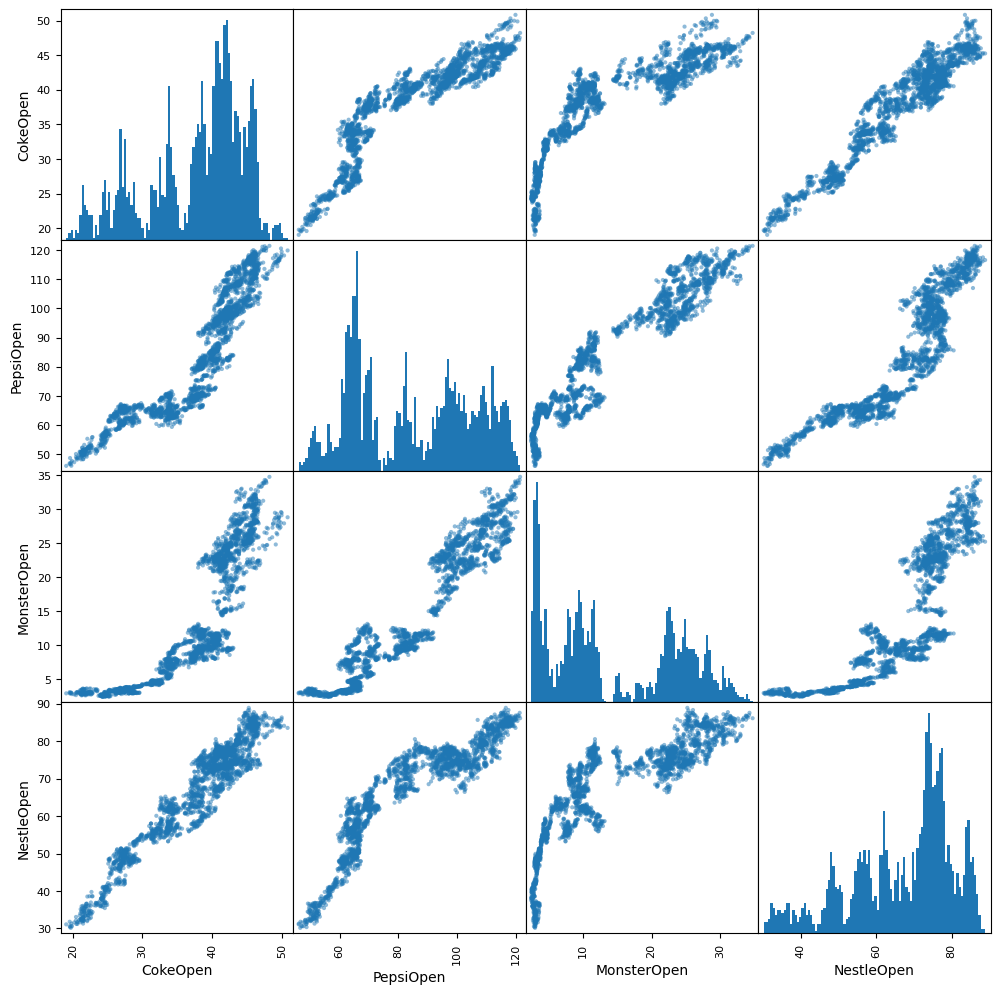

<Figure size 1920x1440 with 0 Axes>

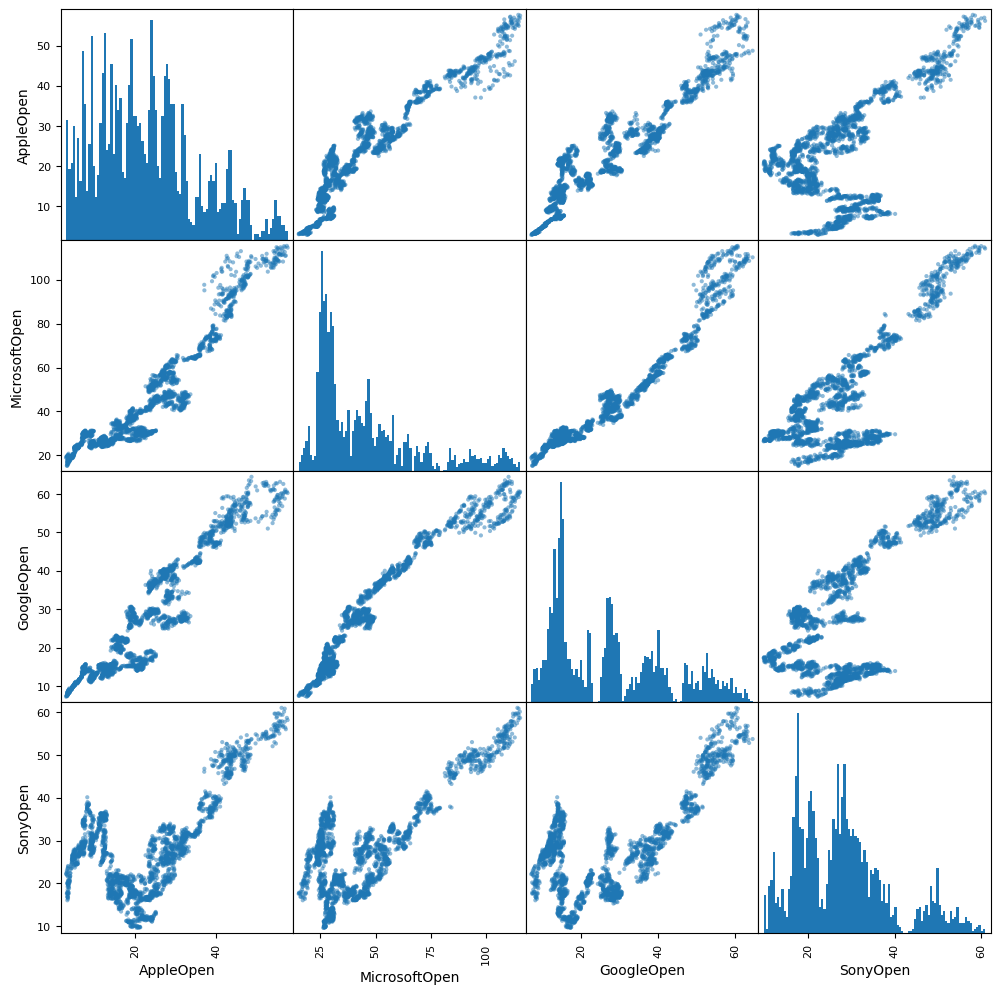

In [7]:
plt.figure(dpi=300)
data = pd.concat([coke['Open'],pepsi['Open'],monster['Open'],nestle['Open']],axis = 1)
data.columns = ['CokeOpen','PepsiOpen','MonsterOpen', 'NestleOpen']
scatter_matrix(data, figsize = (12,12), hist_kwds= {'bins':100})

plt.figure(dpi=300)
data = pd.concat([apple['Open'],microsoft['Open'],google['Open'],sony['Open']],axis = 1)
data.columns = ['AppleOpen','MicrosoftOpen','GoogleOpen', 'SonyOpen']
scatter_matrix(data, figsize = (12,12), hist_kwds= {'bins':100})

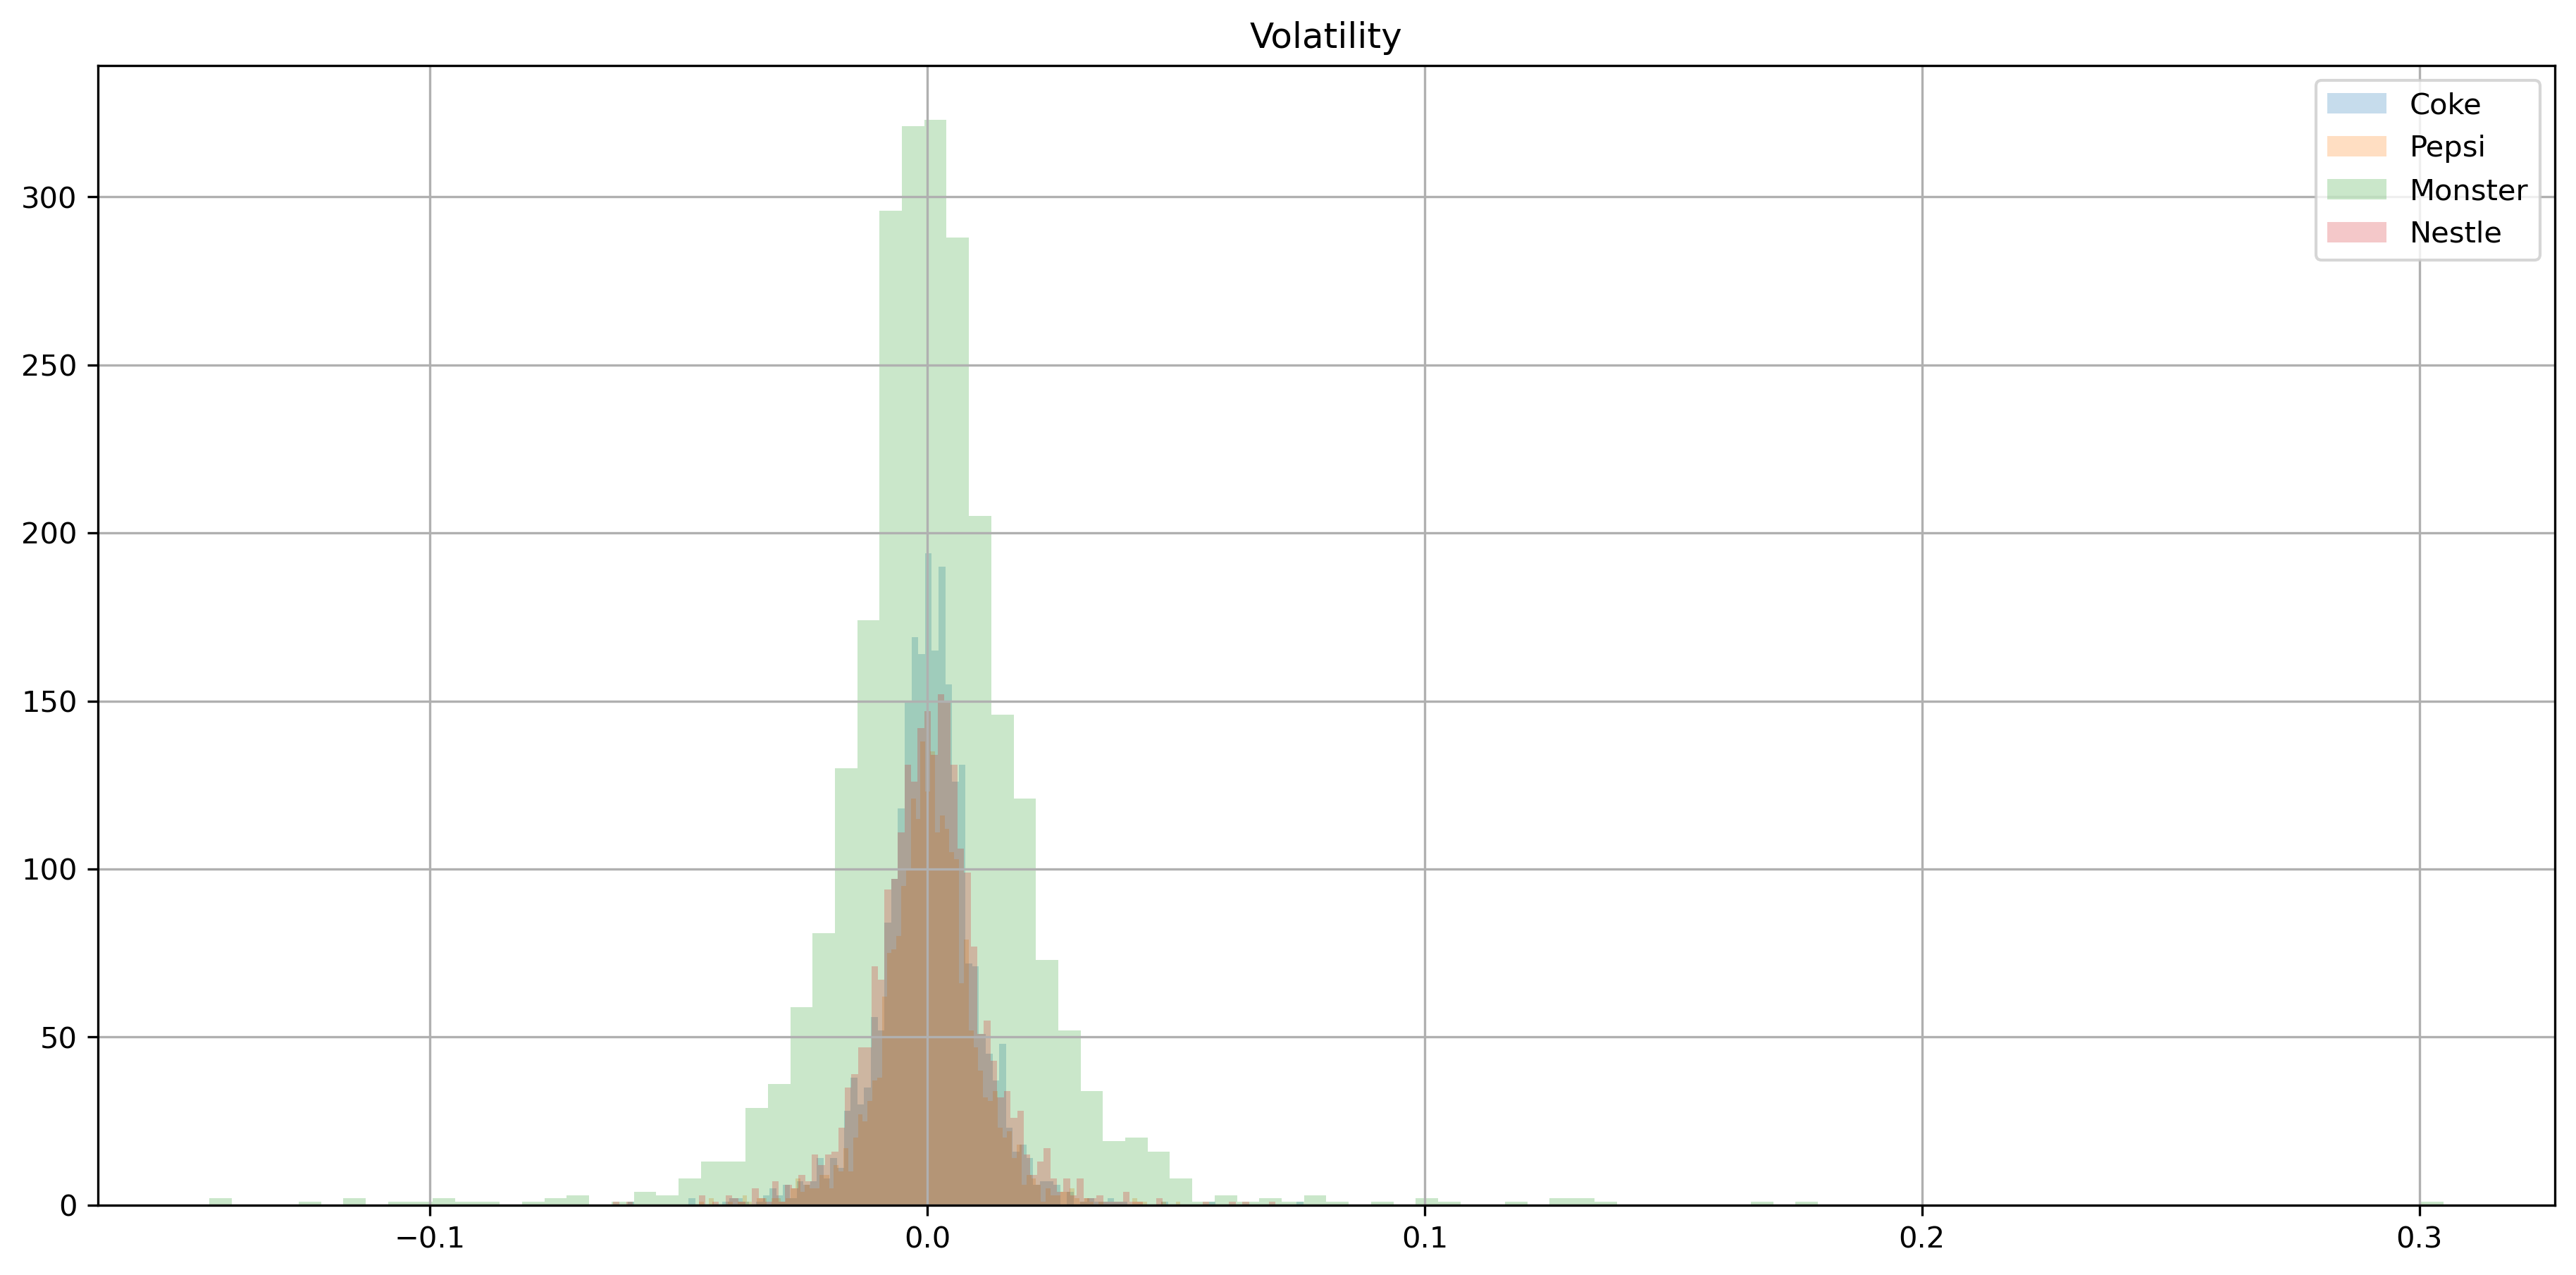

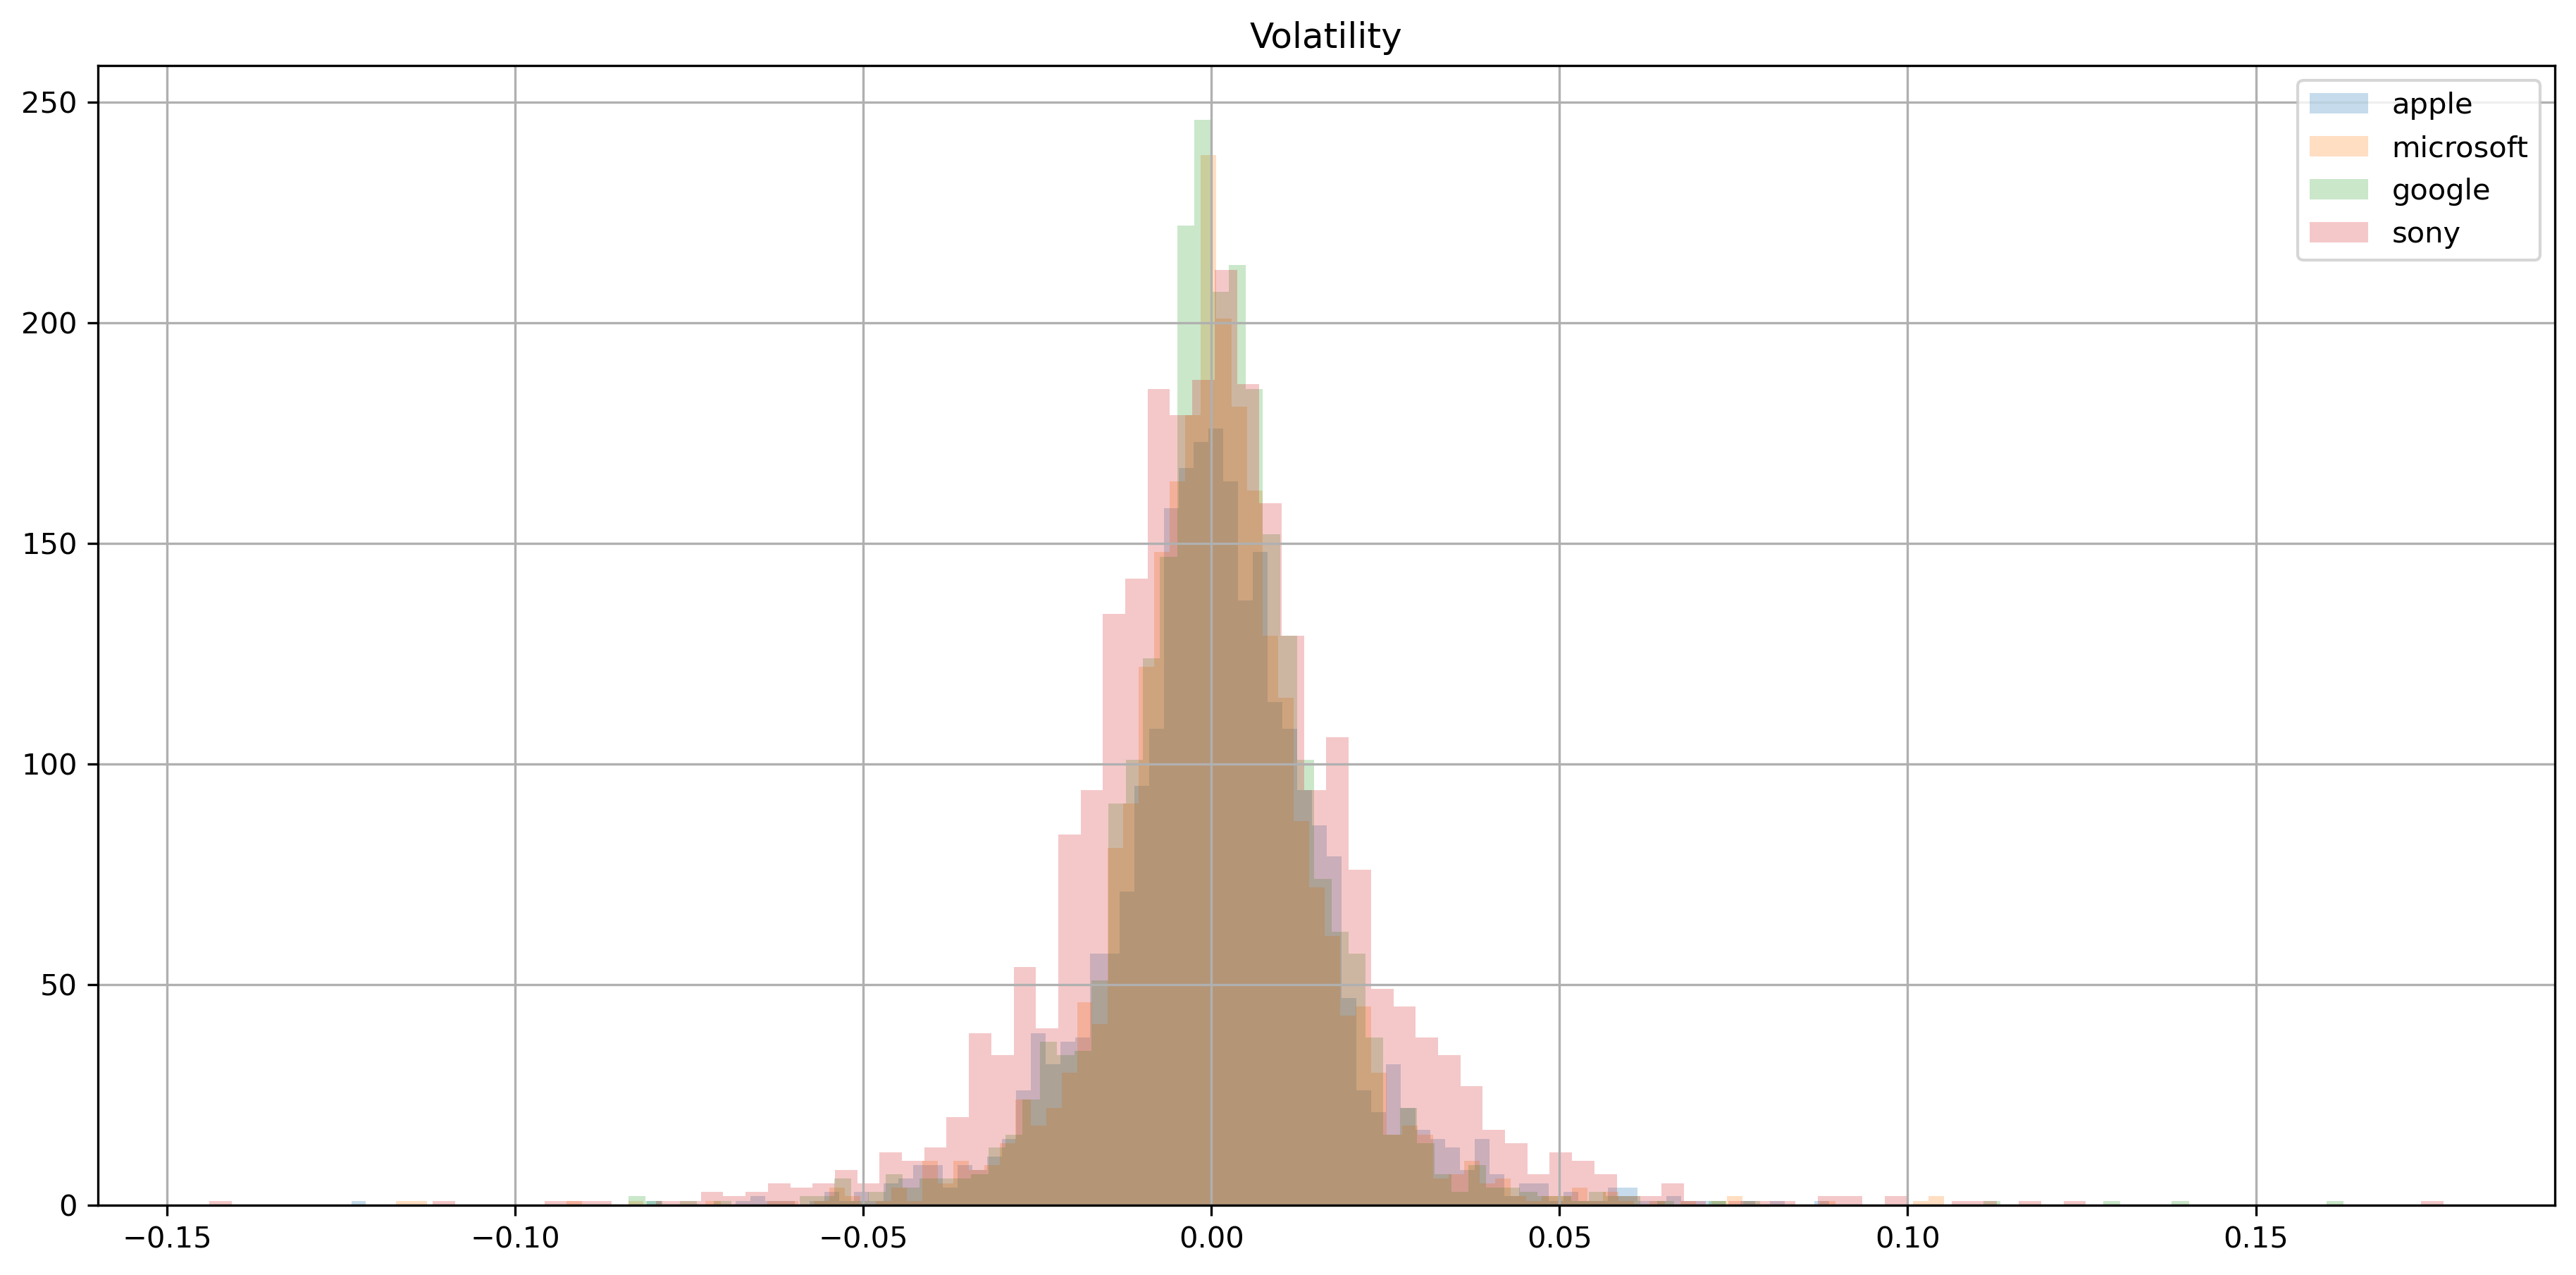

In [8]:
plt.figure(dpi=300)
#Volatility
coke['returns'] = (coke['Close']/coke['Close'].shift(1)) -1
pepsi['returns'] = (pepsi['Close']/pepsi['Close'].shift(1))-1
monster['returns'] = (monster['Close']/monster['Close'].shift(1)) - 1
nestle['returns'] = (nestle['Close']/nestle['Close'].shift(1)) -1
coke['returns'].hist(bins = 100, label = 'Coke', alpha = 0.25, figsize = (15,7))
pepsi['returns'].hist(bins = 100, label = 'Pepsi', alpha = 0.25)
monster['returns'].hist(bins = 100, label = 'Monster', alpha = 0.25)
nestle['returns'].hist(bins = 100, label = 'Nestle', alpha = 0.25)
plt.legend()
plt.title('Volatility')
plt.show()

plt.figure(dpi=300)
#Volatility
apple['returns'] = (apple['Close']/apple['Close'].shift(1)) -1
microsoft['returns'] = (microsoft['Close']/microsoft['Close'].shift(1))-1
google['returns'] = (google['Close']/google['Close'].shift(1)) - 1
sony['returns'] = (sony['Close']/sony['Close'].shift(1)) -1
apple['returns'].hist(bins = 100, label = 'apple', alpha = 0.25, figsize = (15,7))
microsoft['returns'].hist(bins = 100, label = 'microsoft', alpha = 0.25)
google['returns'].hist(bins = 100, label = 'google', alpha = 0.25)
sony['returns'].hist(bins = 100, label = 'sony', alpha = 0.25)
plt.legend()
plt.title('Volatility')
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-14614.840, Time=1.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-14614.126, Time=1.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-14619.359, Time=0.62 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-14619.441, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-14616.124, Time=0.26 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-14617.515, Time=0.69 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-14617.494, Time=0.66 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-14615.679, Time=1.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-14621.441, Time=2.56 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-14619.515, Time=0.97 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-14619.495, Time=0.74 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-14621.358, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-14617.680, Time=0.30 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 10.681 sec

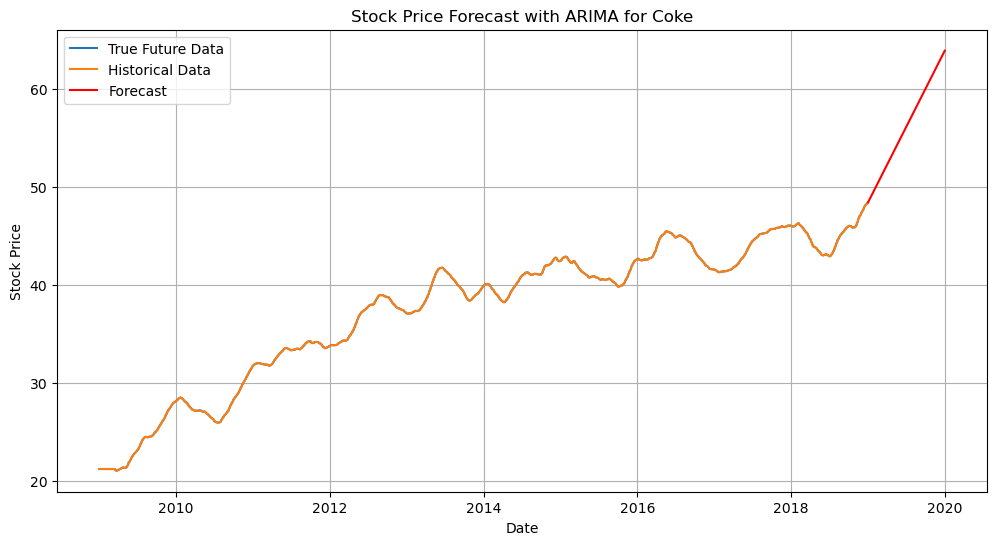

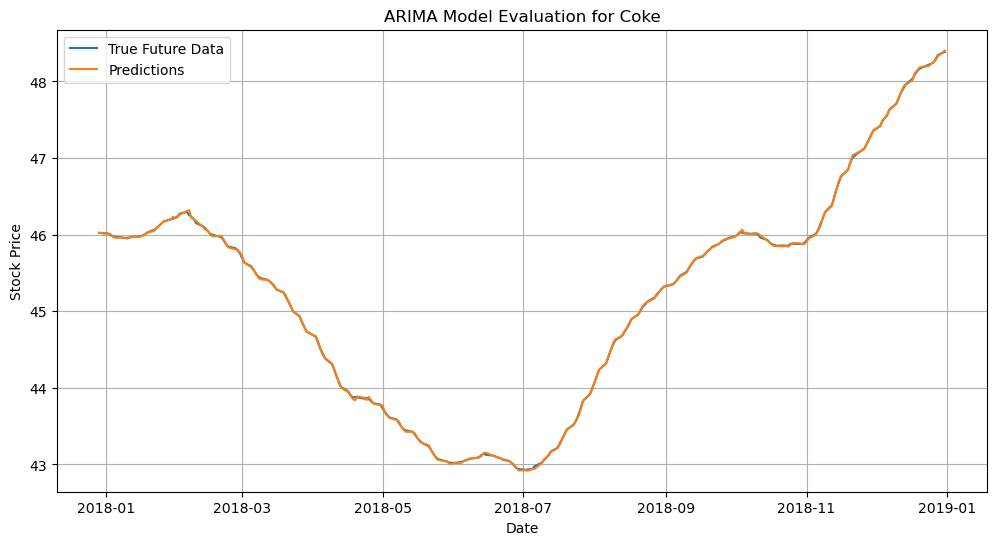

In [172]:
def ARIMA_Function(data, title, new_data):
    # Split data into training and testing sets
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Find the best ARIMA model parameters using auto_arima
    auto_model = auto_arima(train['MA50'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    best_order = auto_model.order

    # Define function to evaluate ARIMA model
    def evaluate_arima_model(train, test, order):
        history = [x for x in train['MA50']]
        predictions = []
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test['MA50'].iloc[t])
        error = mean_squared_error(test['MA50'], predictions)
        return error, predictions

    # Evaluate the ARIMA model with the best parameters
    error, predictions = evaluate_arima_model(train, test, best_order)

    # Train the ARIMA model with the best parameters on the full dataset
    model = ARIMA(data['MA50'], order=best_order)
    model_fit = model.fit()

    # Forecast next year of stock prices
    forecast = model_fit.forecast(steps=365)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['MA50'], label='True Future Data')
    plt.plot(data.index, data['MA50'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with ARIMA for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the error and the predictions
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, test['MA50'], label='True Future Data')
    plt.plot(test.index, predictions, label='Predictions')
    plt.title('ARIMA Model Evaluation for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

ARIMA_Function(coke, 'Coke', new_coke)


In [10]:
new_start = '2018-10-19'
new_end = '2020-1-01'

new_coke = yf.download('KO',new_start,new_end)
new_pepsi = yf.download('PEP',new_start,new_end)
new_monster = yf.download('MNST',new_start,new_end)
new_nestle = yf.download('NSRGY',new_start,new_end)

new_apple = yf.download('AAPL',new_start,new_end)
new_microsoft = yf.download('MSFT',new_start,new_end)
new_google = yf.download('GOOGL',new_start,new_end)
new_sony = yf.download('SONY',new_start,new_end)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


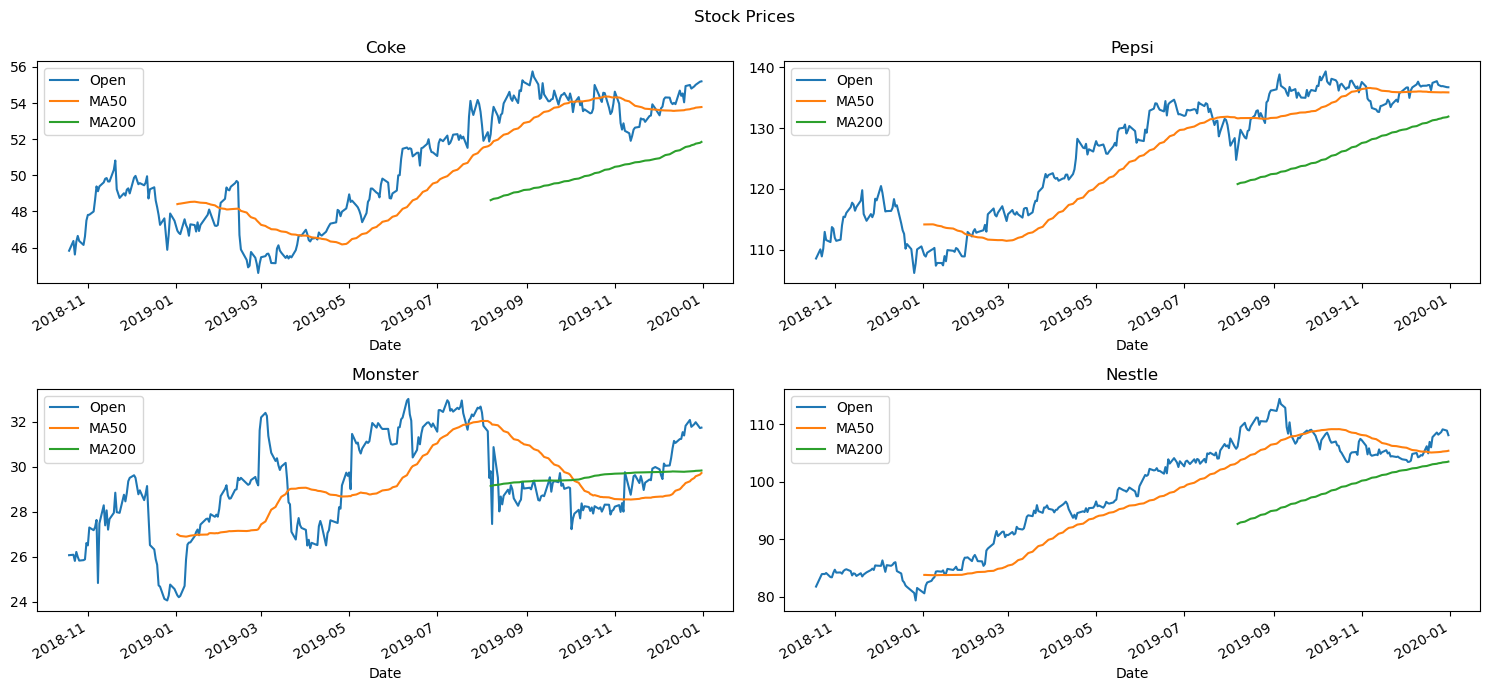

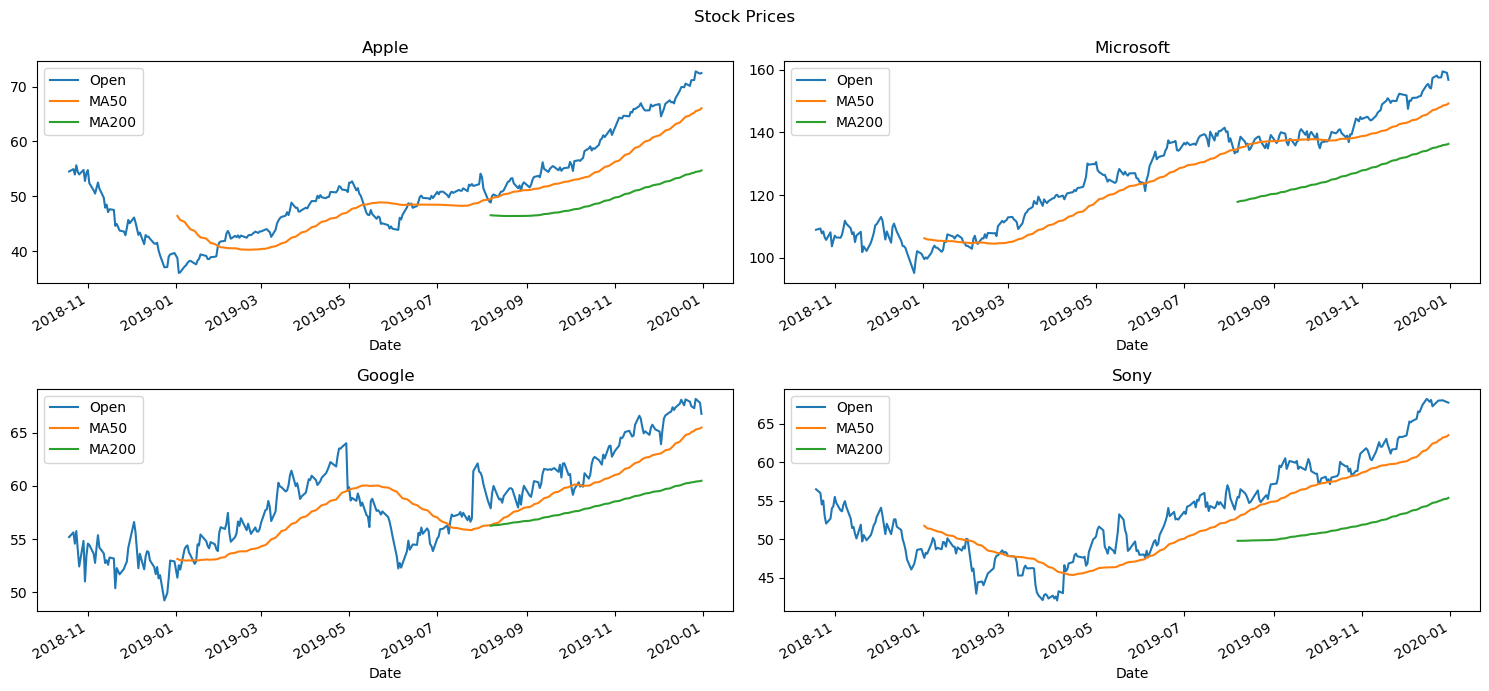

In [11]:
plt.subplot(2, 2, 1)
rolling_mean(new_coke)
plt.title('Coke')

plt.subplot(2, 2, 2)
rolling_mean(new_pepsi)
plt.title('Pepsi')

plt.subplot(2, 2, 3)
rolling_mean(new_monster)
plt.title('Monster')

plt.subplot(2, 2, 4)
rolling_mean(new_nestle)
plt.title('Nestle')

plt.suptitle('Stock Prices')
plt.tight_layout()
plt.show()

plt.subplot(2, 2, 1)
rolling_mean(new_apple)
plt.title('Apple')

plt.subplot(2, 2, 2)
rolling_mean(new_microsoft)
plt.title('Microsoft')

plt.subplot(2, 2, 3)
rolling_mean(new_google)
plt.title('Google')

plt.subplot(2, 2, 4)
rolling_mean(new_sony)
plt.title('Sony')

plt.suptitle('Stock Prices')
plt.tight_layout()
plt.show()


In [12]:
new_coke.iloc[:50, new_coke.columns.get_loc('MA50')] = coke['MA50'].tail(50).values
new_pepsi.iloc[:50, new_pepsi.columns.get_loc('MA50')] = pepsi['MA50'].tail(50).values
new_monster.iloc[:50, new_monster.columns.get_loc('MA50')] = monster['MA50'].tail(50).values
new_nestle.iloc[:50, new_nestle.columns.get_loc('MA50')] = nestle['MA50'].tail(50).values

new_apple.iloc[:50, new_apple.columns.get_loc('MA50')] = apple['MA50'].tail(50).values
new_microsoft.iloc[:50, new_microsoft.columns.get_loc('MA50')] = microsoft['MA50'].tail(50).values
new_google.iloc[:50, new_google.columns.get_loc('MA50')] = google['MA50'].tail(50).values
new_sony.iloc[:50, new_sony.columns.get_loc('MA50')] = sony['MA50'].tail(50).values


In [13]:
# Replace NaN values with the first non-NaN value
coke['MA50'].fillna(coke.at[coke['MA50'].first_valid_index(), 'MA50'], inplace=True)
pepsi['MA50'].fillna(pepsi.at[pepsi['MA50'].first_valid_index(), 'MA50'], inplace=True)
monster['MA50'].fillna(monster.at[monster['MA50'].first_valid_index(), 'MA50'], inplace=True)
nestle['MA50'].fillna(nestle.at[nestle['MA50'].first_valid_index(), 'MA50'], inplace=True)

apple['MA50'].fillna(apple.at[apple['MA50'].first_valid_index(), 'MA50'], inplace=True)
microsoft['MA50'].fillna(microsoft.at[microsoft['MA50'].first_valid_index(), 'MA50'], inplace=True)
google['MA50'].fillna(google.at[google['MA50'].first_valid_index(), 'MA50'], inplace=True)
sony['MA50'].fillna(sony.at[sony['MA50'].first_valid_index(), 'MA50'], inplace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-14614.840, Time=1.92 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-14614.126, Time=0.55 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-14619.359, Time=0.87 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-14619.441, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-14616.124, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-14617.515, Time=1.44 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-14617.494, Time=0.66 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-14615.679, Time=2.00 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-14621.441, Time=0.82 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-14619.515, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-14619.495, Time=0.75 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-14621.358, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-14617.680, Time=0.33 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 10.262 sec

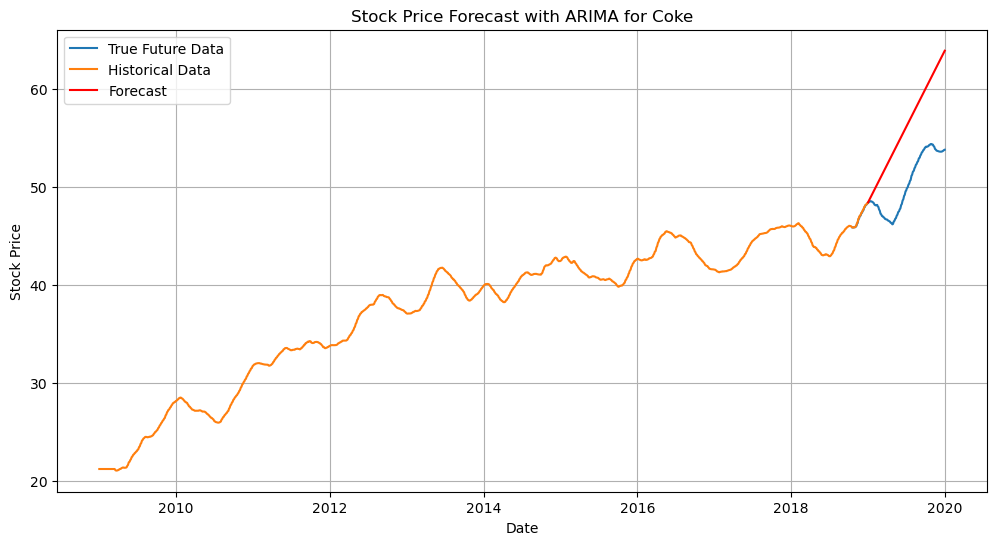

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11246.084, Time=2.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5298.713, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11237.868, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7558.877, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5000.171, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11247.518, Time=1.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8898.909, Time=2.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11237.904, Time=1.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11246.293, Time=1.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-9638.010, Time=3.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11241.745, Time=2.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-11222.738, Time=1.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-11243.367, Time=0.89 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 19.526 seconds


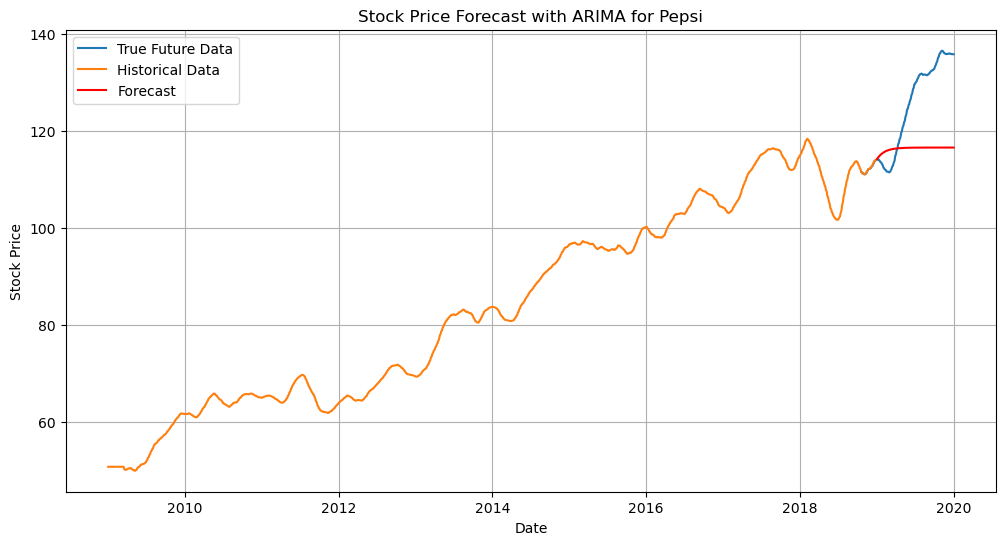

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-15364.281, Time=1.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-15355.866, Time=0.70 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-15360.495, Time=0.35 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-15360.560, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-15357.820, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-15359.196, Time=0.48 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-15356.524, Time=2.77 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-15364.270, Time=1.05 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-15370.749, Time=2.60 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-15366.862, Time=0.73 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-15368.836, Time=1.60 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : AIC=-15368.827, Time=1.94 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-15367.866, Time=2.10 sec
 ARIMA(3,2,4)(0,0,0)[0] intercept   : AIC=-15366.804, Time=3.27 sec
 ARIM

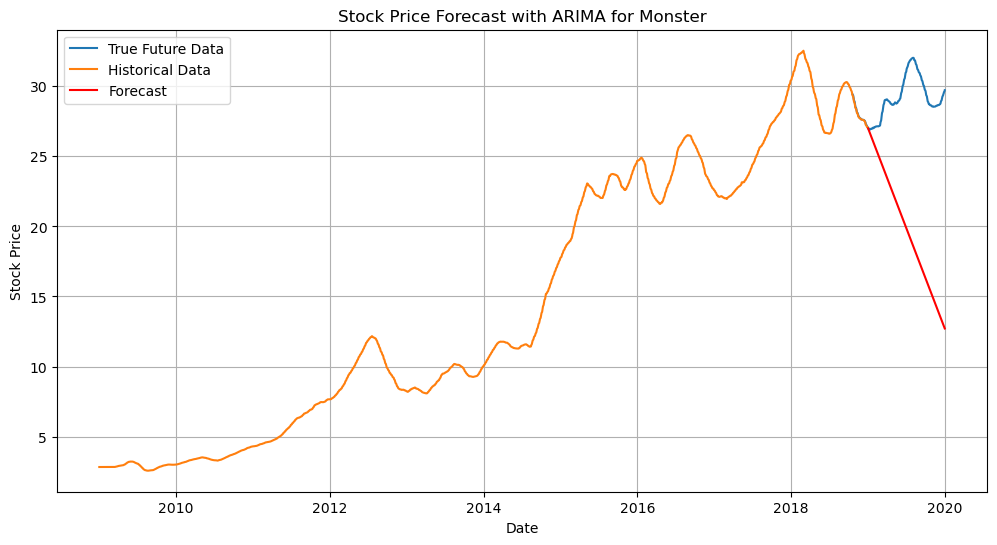

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-11243.552, Time=3.58 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-11232.789, Time=0.33 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-11249.519, Time=0.32 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-11249.230, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-11234.788, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-11247.552, Time=0.40 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-11247.551, Time=0.74 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-11245.549, Time=0.63 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-11251.519, Time=0.89 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-11249.552, Time=0.92 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-11249.551, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-11251.231, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-11247.549, Time=0.78 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 9.570 seco

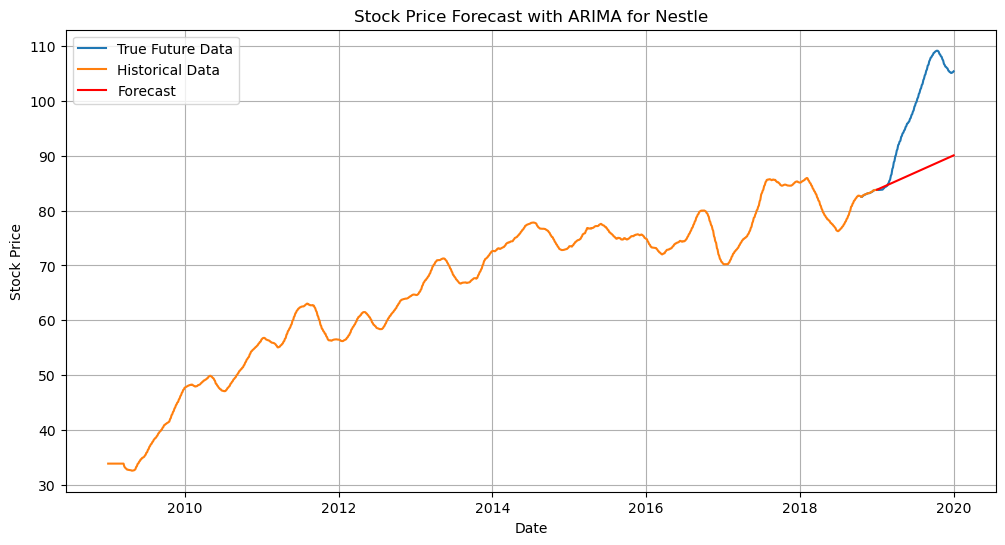

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-14414.911, Time=3.51 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-14376.537, Time=0.25 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-14412.492, Time=0.24 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-14411.396, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-14378.521, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-14411.122, Time=1.42 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-14408.725, Time=1.14 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-14415.722, Time=1.44 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-14416.401, Time=1.82 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-14418.321, Time=0.81 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-14410.994, Time=0.66 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-14416.439, Time=1.54 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-14414.361, Time=0.97 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-14420.300, Time=0.47 sec
 ARIM

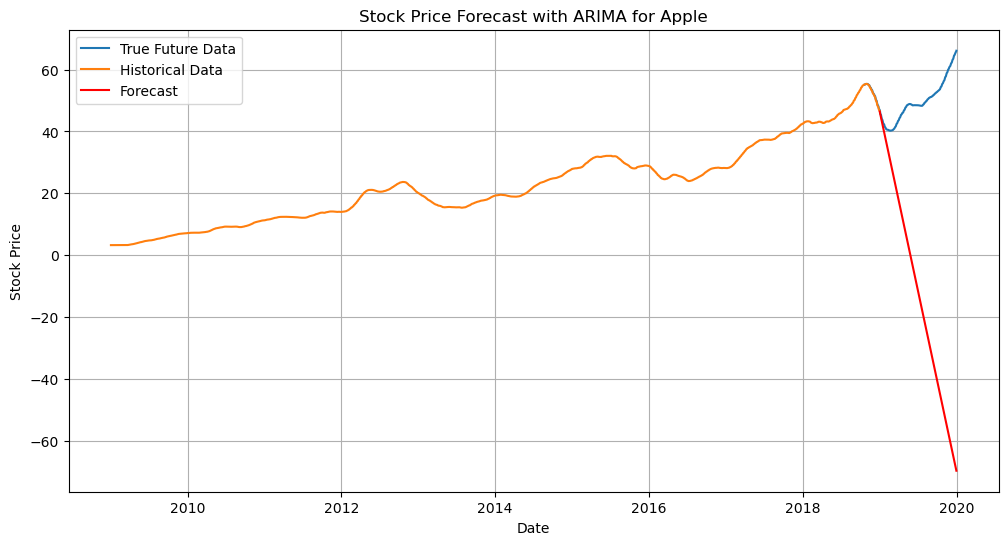

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-12351.824, Time=0.84 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-12356.784, Time=0.35 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-12355.558, Time=0.23 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-12355.529, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-12358.733, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-12353.161, Time=1.57 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 3.375 seconds


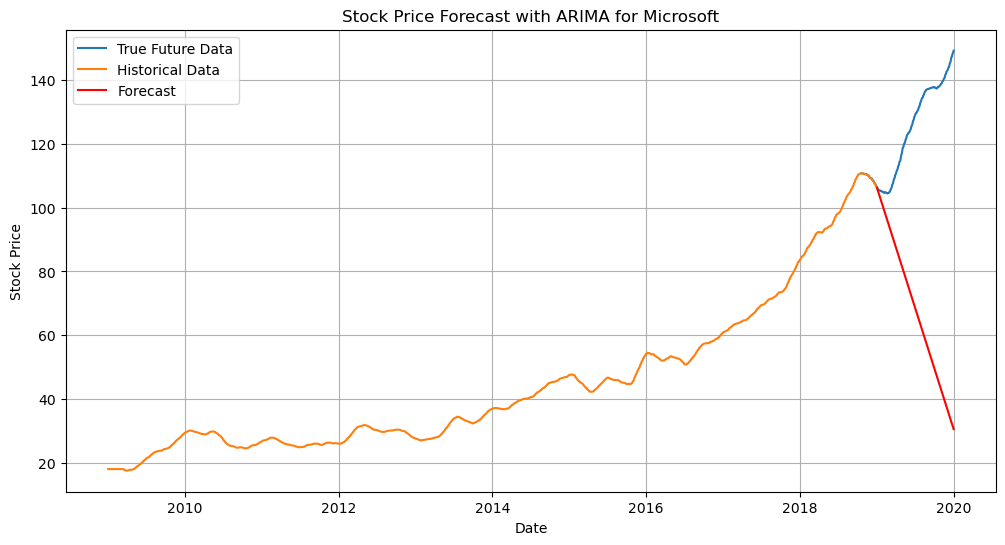

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-14043.607, Time=0.91 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-14049.321, Time=0.27 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-14048.237, Time=0.44 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-14048.284, Time=0.43 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-14051.309, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-14046.560, Time=0.78 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 2.927 seconds


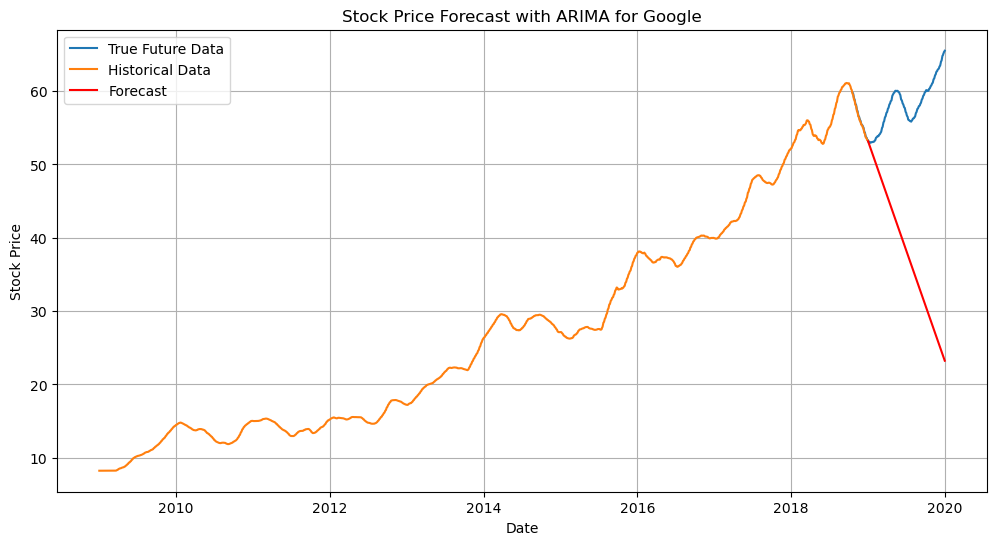

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-12942.869, Time=1.01 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-12936.133, Time=0.23 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-12943.424, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-12943.348, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-12938.071, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-12941.439, Time=0.41 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-12941.420, Time=1.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-12939.421, Time=0.73 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-12945.369, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-12943.384, Time=0.53 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-12943.364, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-12945.292, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-12941.369, Time=0.42 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 5.413 seco

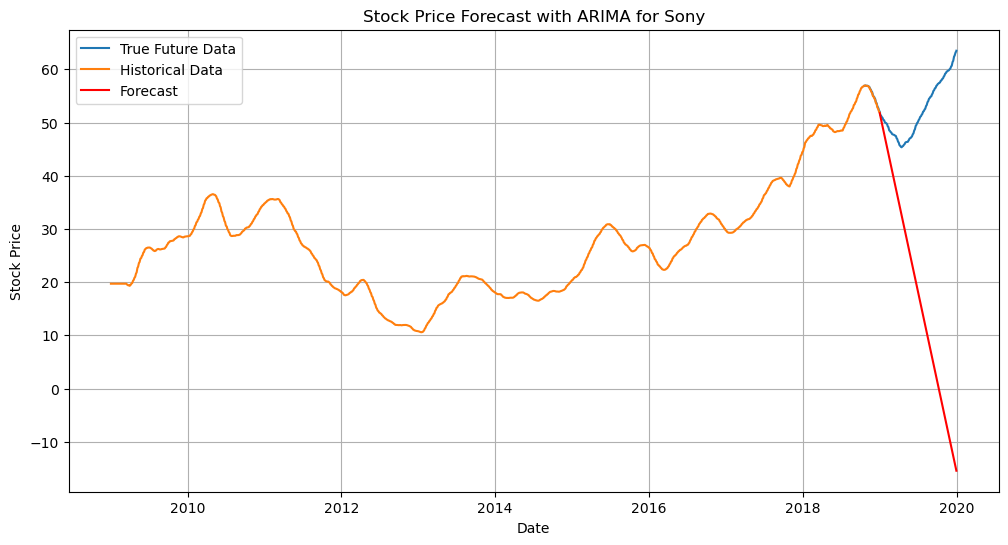

In [14]:
ARIMA_Function(coke, 'Coke', new_coke)
ARIMA_Function(pepsi, 'Pepsi', new_pepsi)
ARIMA_Function(monster, 'Monster', new_monster)
ARIMA_Function(nestle, 'Nestle', new_nestle)

ARIMA_Function(apple, 'Apple', new_apple)
ARIMA_Function(microsoft, 'Microsoft', new_microsoft)
ARIMA_Function(google, 'Google', new_google)
ARIMA_Function(sony, 'Sony', new_sony)

In [15]:
def SVM_Function(data, title, new_data):
    # Split data into training and testing sets
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Train Support Vector Machine model
    svm_model = SVR(kernel='rbf')
    svm_model.fit(train.index.to_numpy().reshape(-1, 1), train['MA50'])

    # Predict using SVM model
    predictions = svm_model.predict(test.index.to_numpy().reshape(-1, 1))

    # Evaluate SVM model
    error = mean_squared_error(test['MA50'], predictions)

    # Forecast next year of stock prices
    forecast = svm_model.predict(pd.date_range(start=data.index[-1], periods=365, freq='D').to_numpy().reshape(-1, 1))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['MA50'], label='True Future Data')
    plt.plot(data.index, data['MA50'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with SVM for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


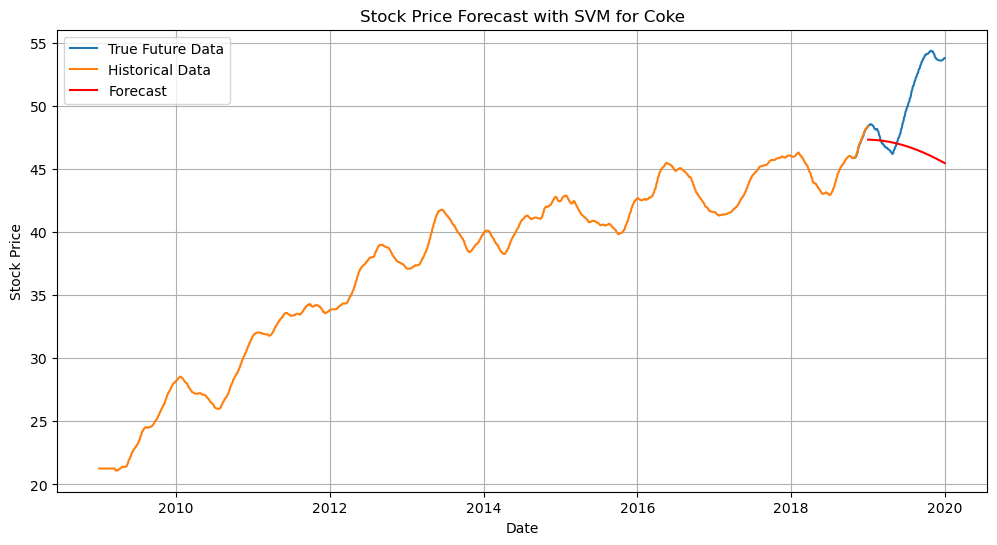

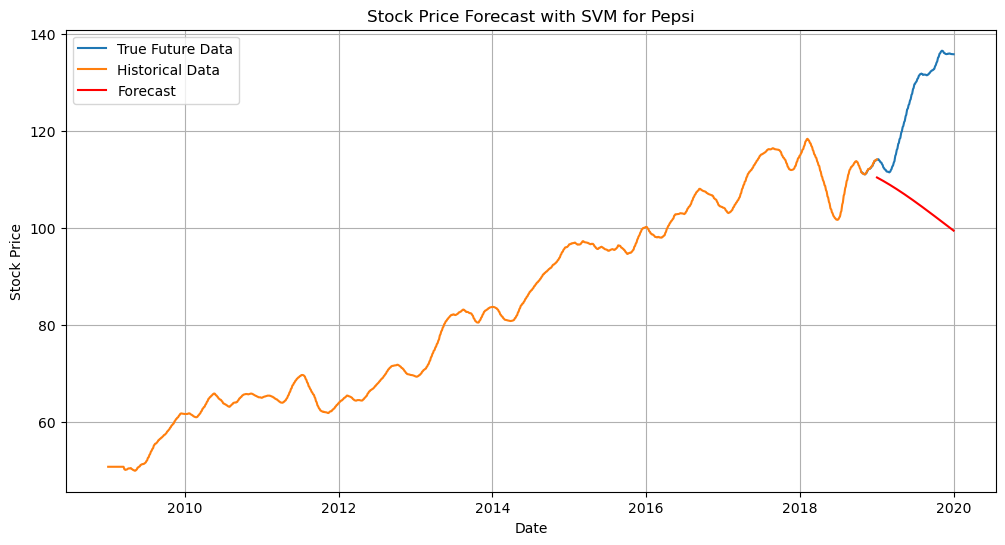

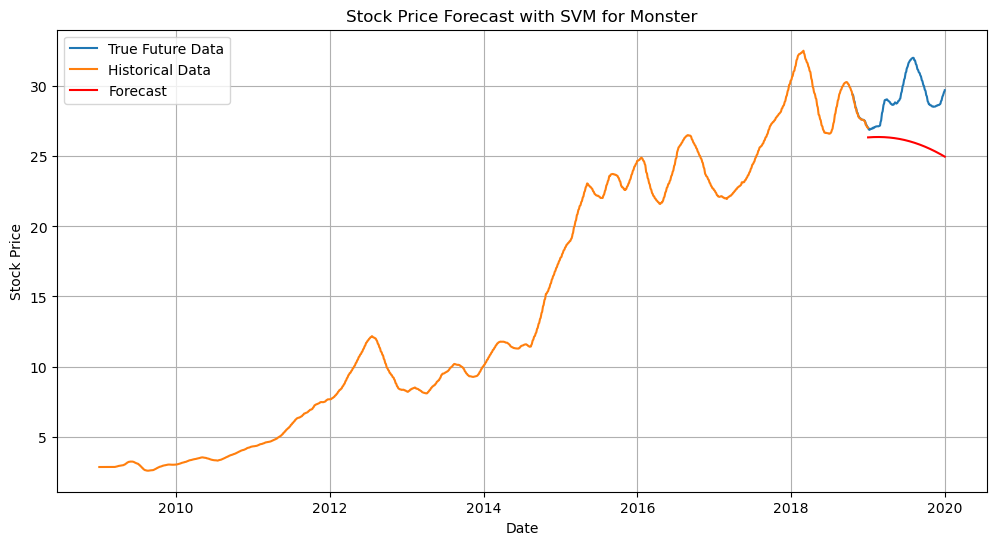

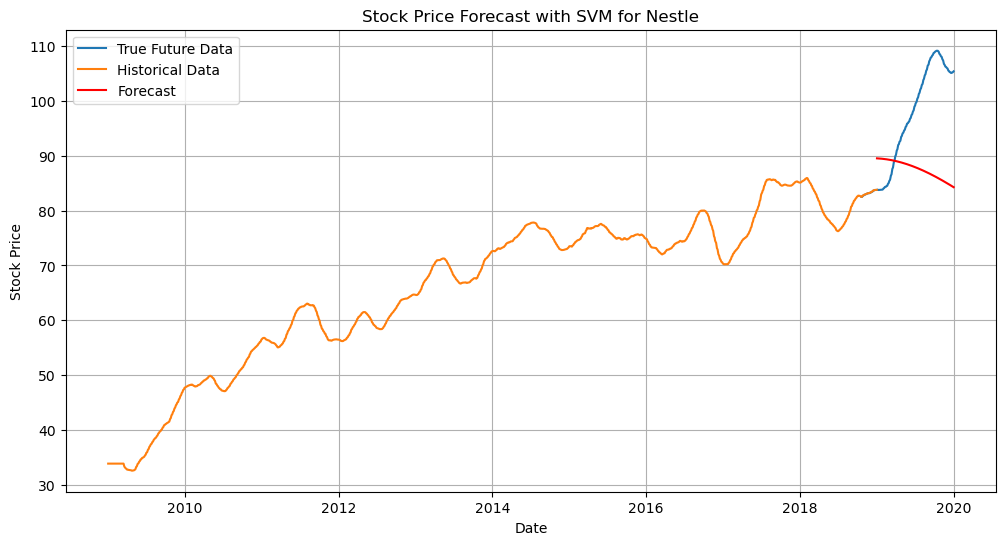

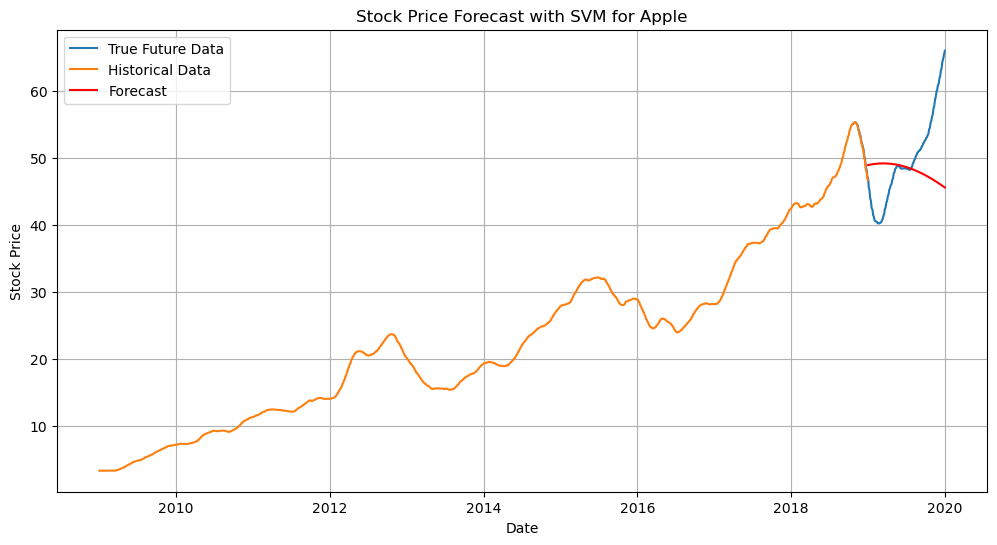

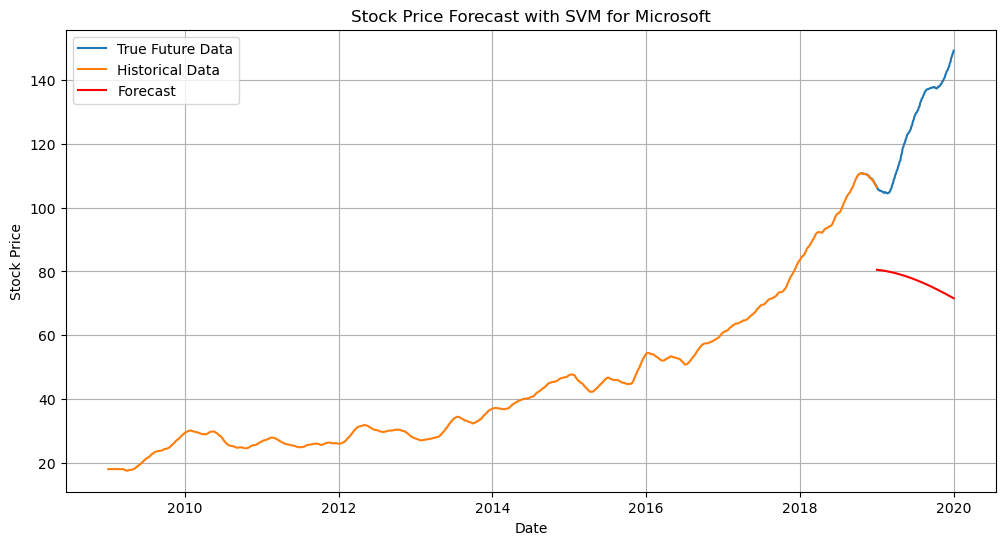

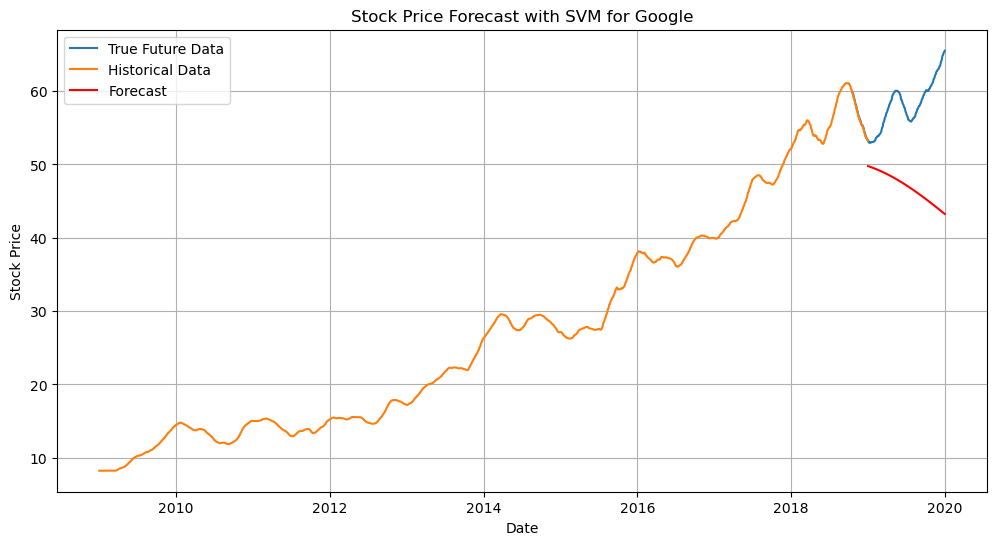

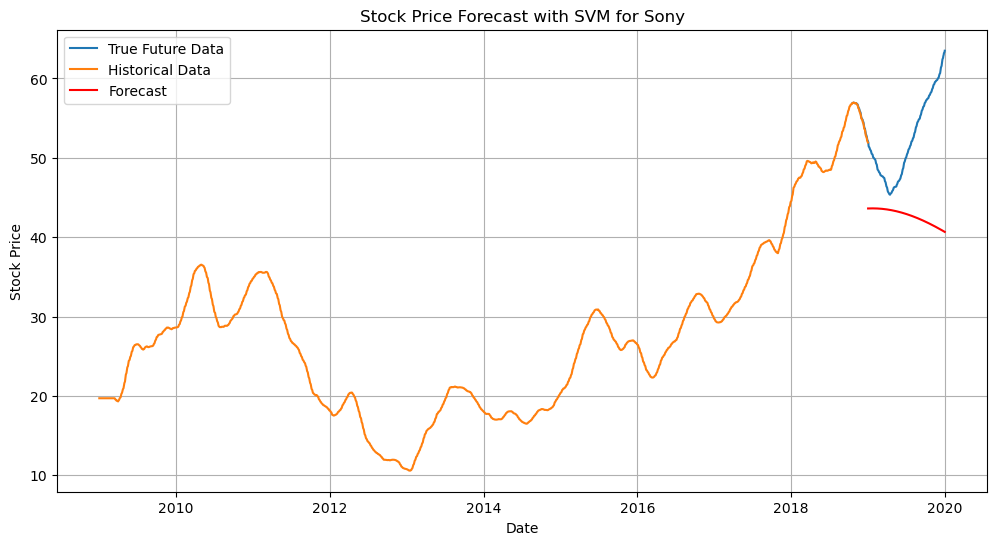

In [16]:
SVM_Function(coke, 'Coke', new_coke)
SVM_Function(pepsi, 'Pepsi', new_pepsi)
SVM_Function(monster, 'Monster', new_monster)
SVM_Function(nestle, 'Nestle', new_nestle)

SVM_Function(apple, 'Apple', new_apple)
SVM_Function(microsoft, 'Microsoft', new_microsoft)
SVM_Function(google, 'Google', new_google)
SVM_Function(sony, 'Sony', new_sony)

In [17]:
def KNN_Function(data, title, new_data):
    # Split data into training and testing sets
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Train K-Nearest Neighbors model
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(train.index.to_numpy().reshape(-1, 1), train['MA50'])

    # Predict using KNN model
    predictions = knn_model.predict(test.index.to_numpy().reshape(-1, 1))

    # Evaluate KNN model
    error = mean_squared_error(test['MA50'], predictions)

    # Forecast next year of stock prices
    forecast = knn_model.predict(pd.date_range(start=data.index[-1], periods=365, freq='D').to_numpy().reshape(-1, 1))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['MA50'], label='True Future Data')
    plt.plot(data.index, data['MA50'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with KNN for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


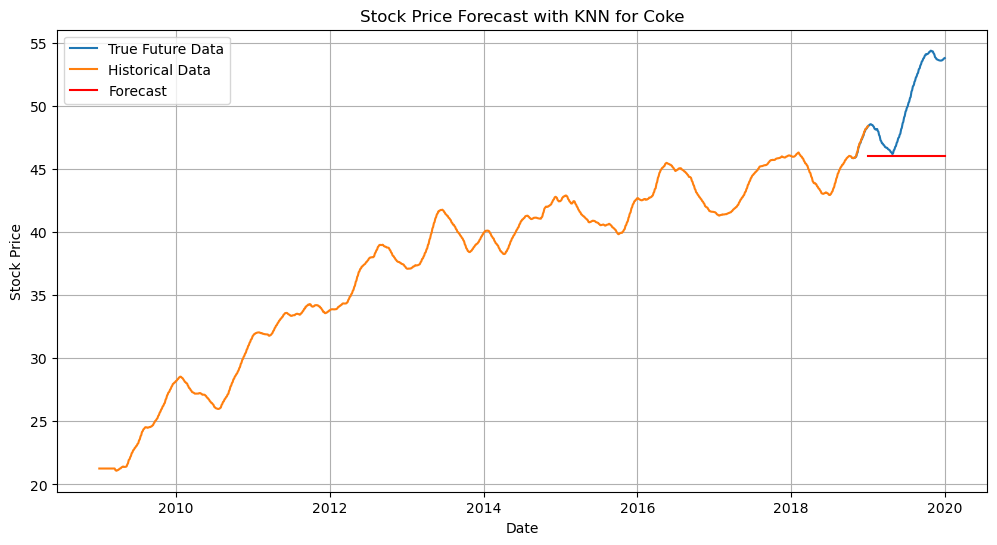

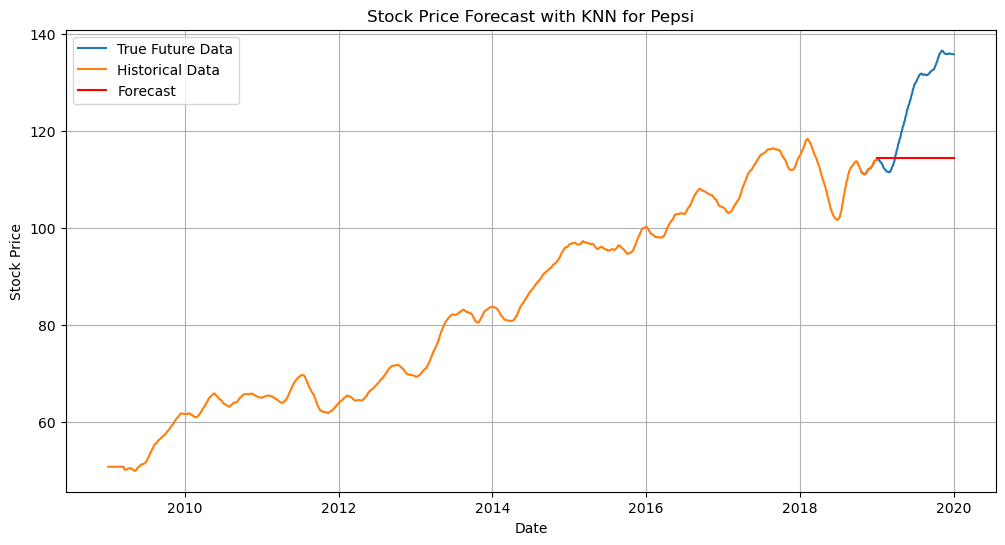

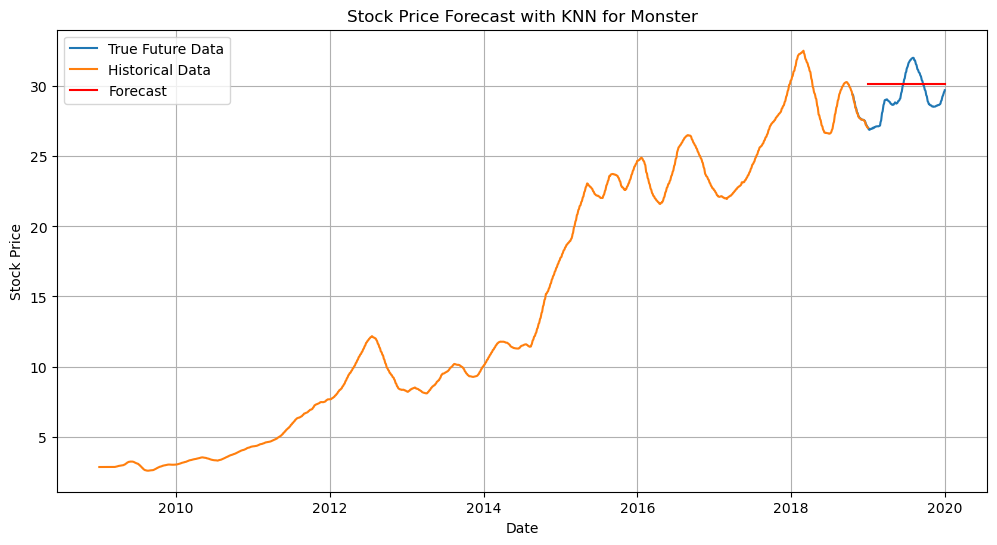

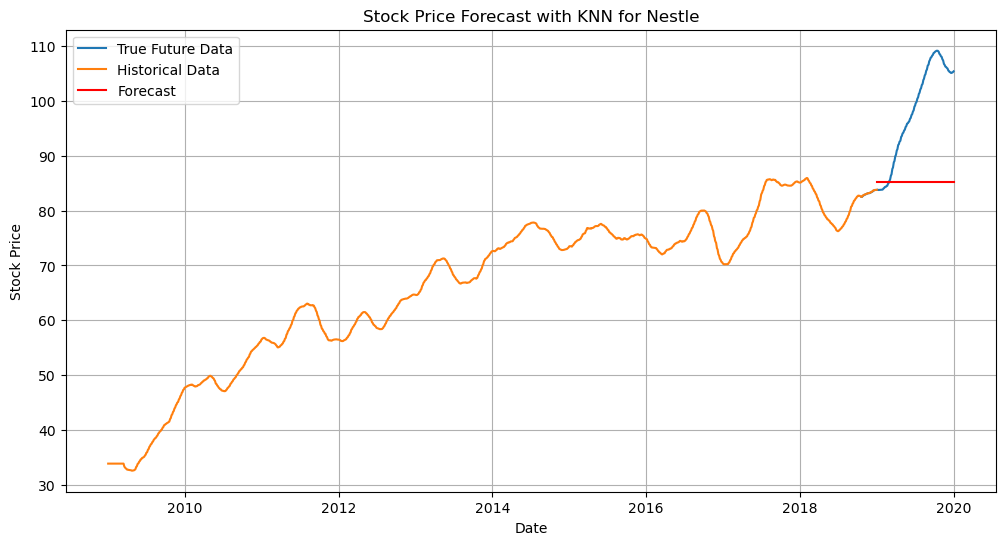

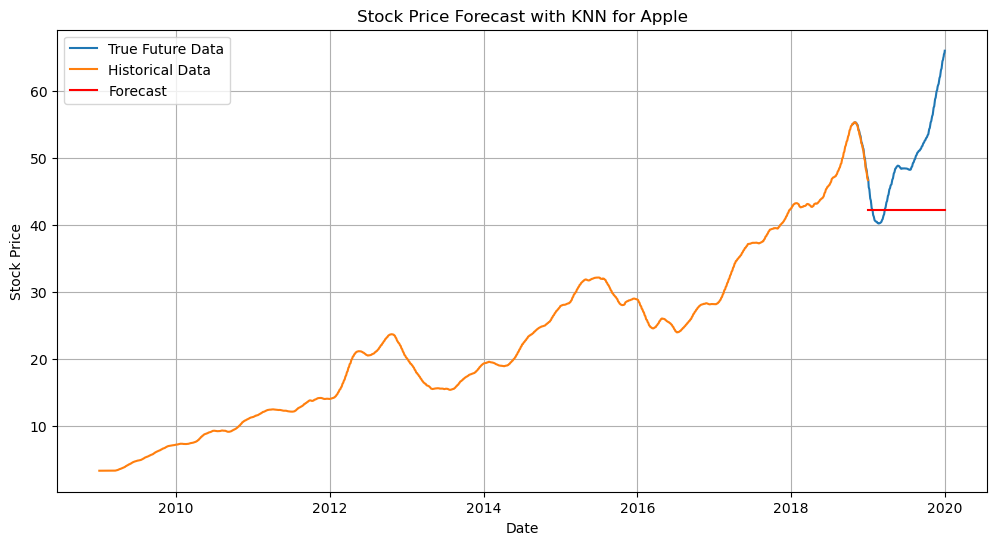

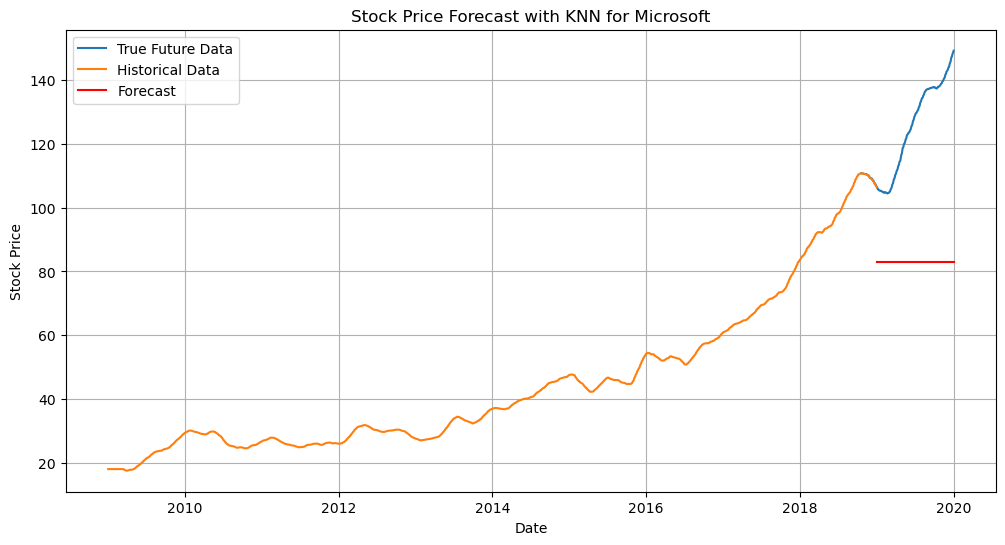

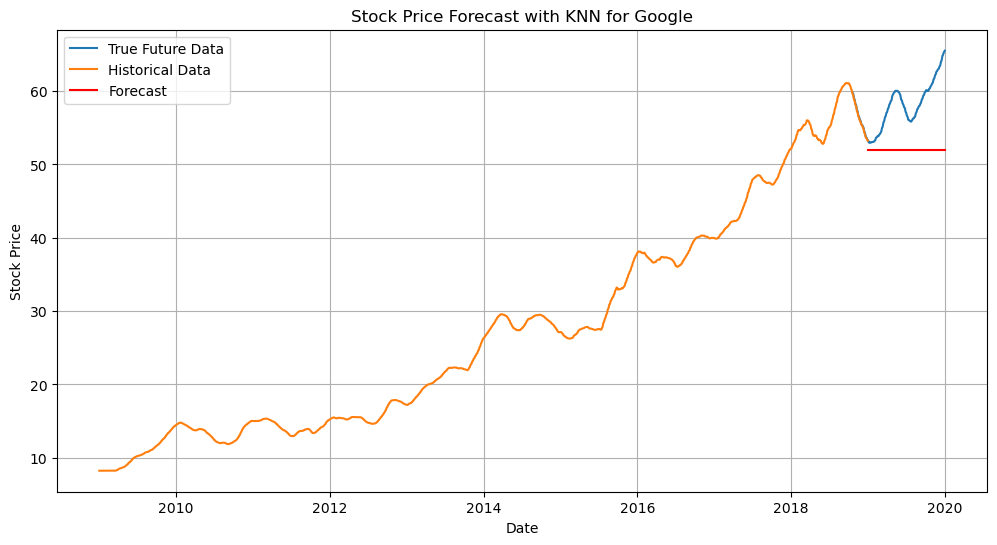

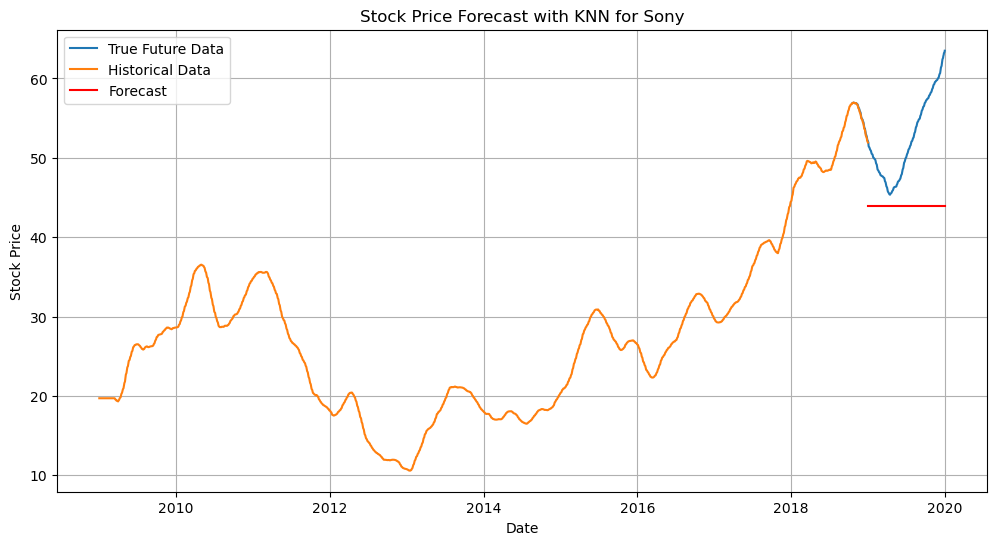

In [18]:
KNN_Function(coke, 'Coke', new_coke)
KNN_Function(pepsi, 'Pepsi', new_pepsi)
KNN_Function(monster, 'Monster', new_monster)
KNN_Function(nestle, 'Nestle', new_nestle)

KNN_Function(apple, 'Apple', new_apple)
KNN_Function(microsoft, 'Microsoft', new_microsoft)
KNN_Function(google, 'Google', new_google)
KNN_Function(sony, 'Sony', new_sony)

In [19]:
def DecisionTree_Function(data, title, new_data):
    # Split data into training and testing sets
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Train Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(train.index.to_numpy().reshape(-1, 1), train['MA50'])

    # Predict using Decision Tree model
    predictions = dt_model.predict(test.index.to_numpy().reshape(-1, 1))

    # Evaluate Decision Tree model
    error = mean_squared_error(test['MA50'], predictions)

    # Forecast next year of stock prices
    forecast = dt_model.predict(pd.date_range(start=data.index[-1], periods=365, freq='D').to_numpy().reshape(-1, 1))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['MA50'], label='True Future Data')
    plt.plot(data.index, data['MA50'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with Decision Tree for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


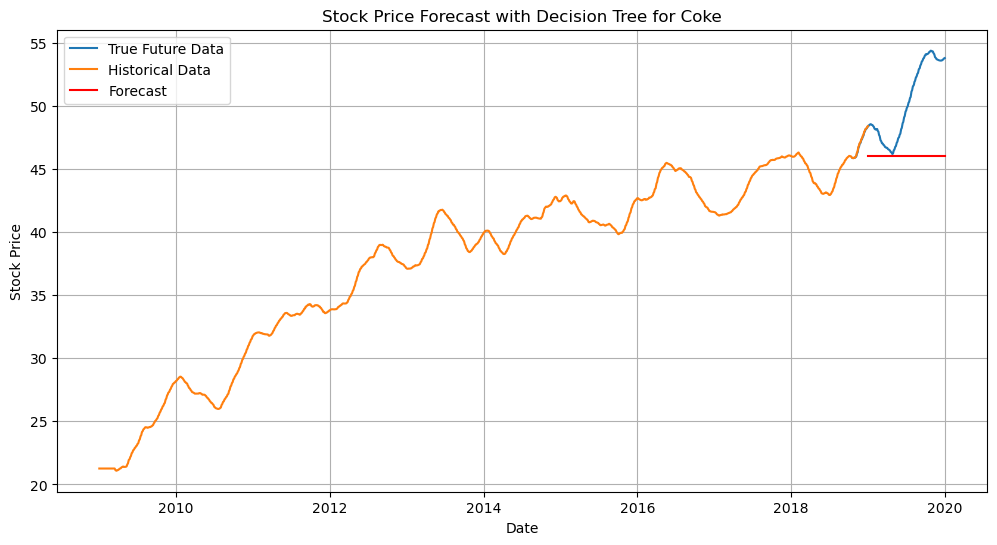

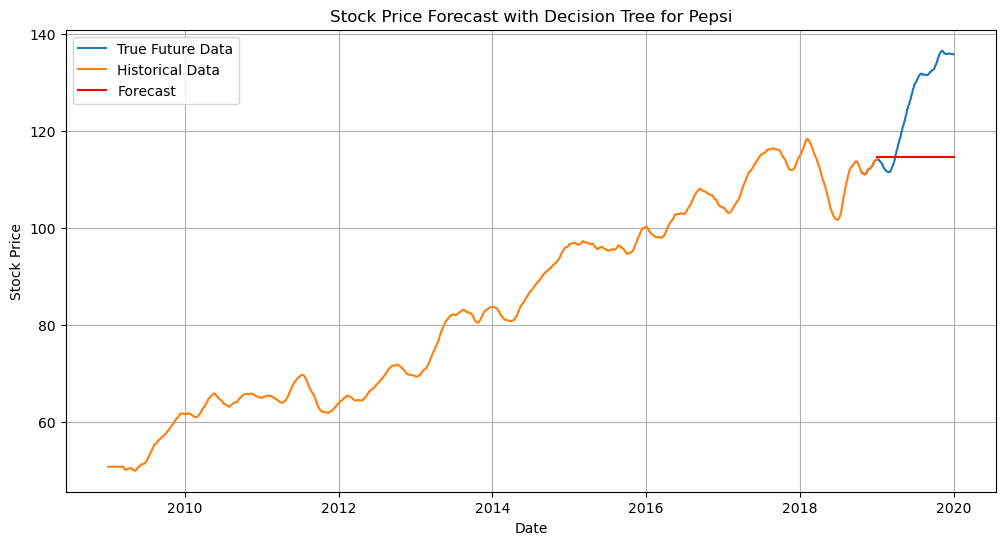

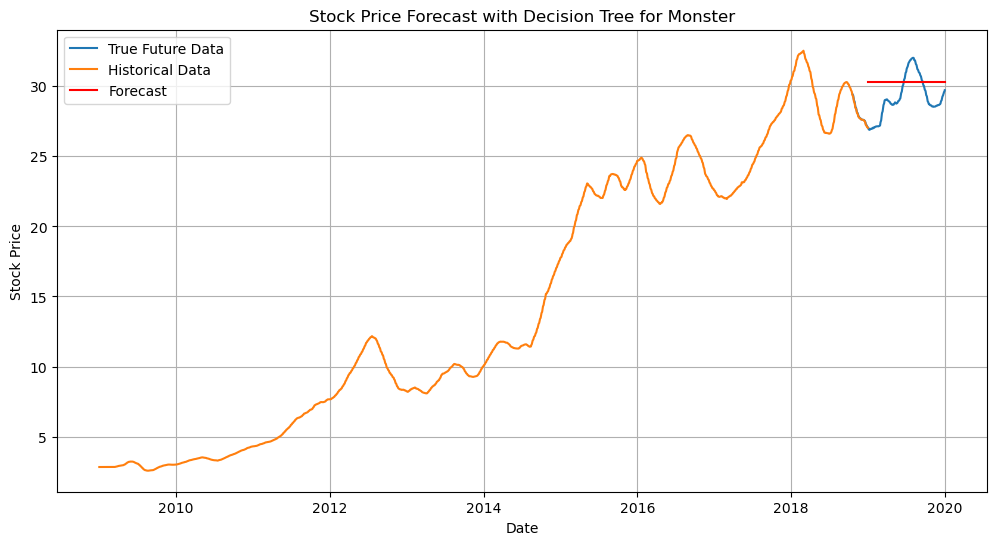

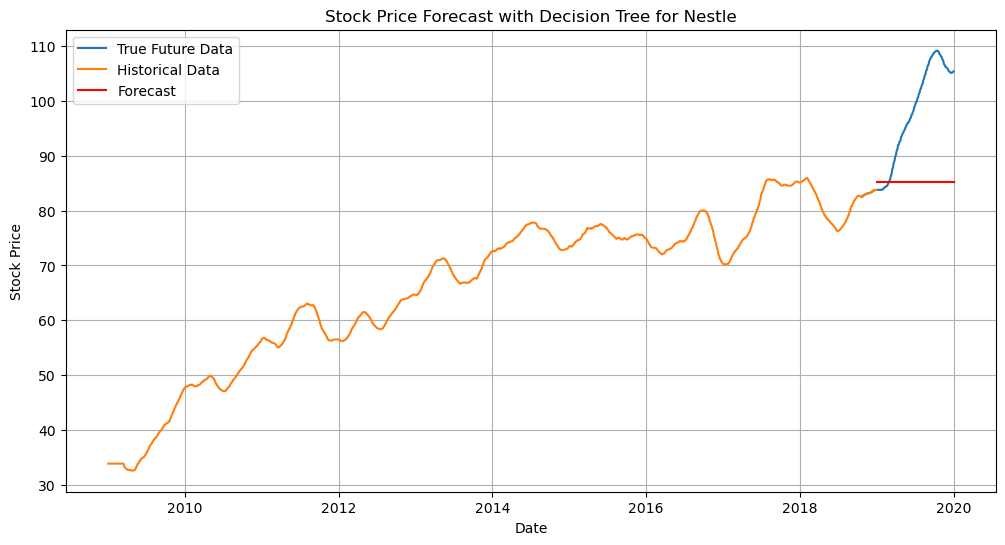

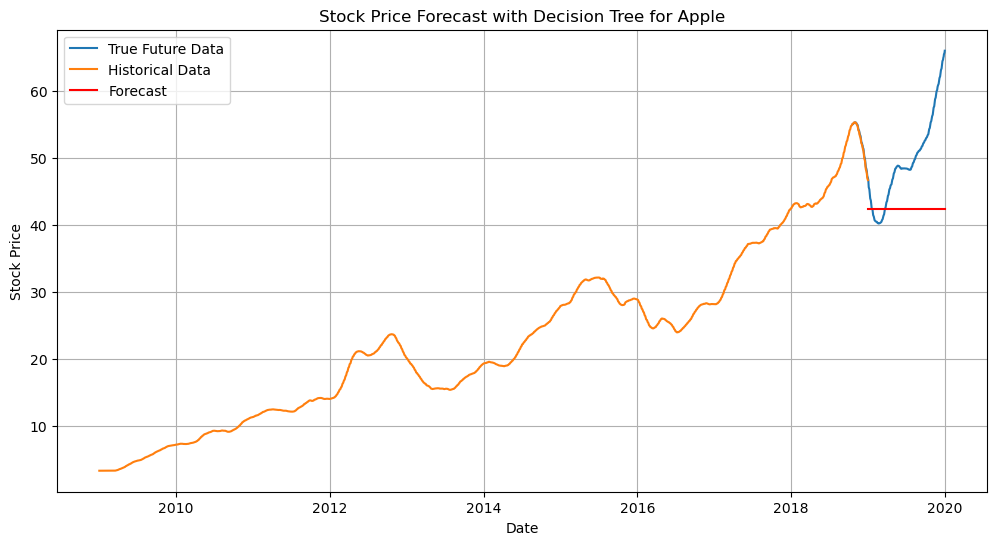

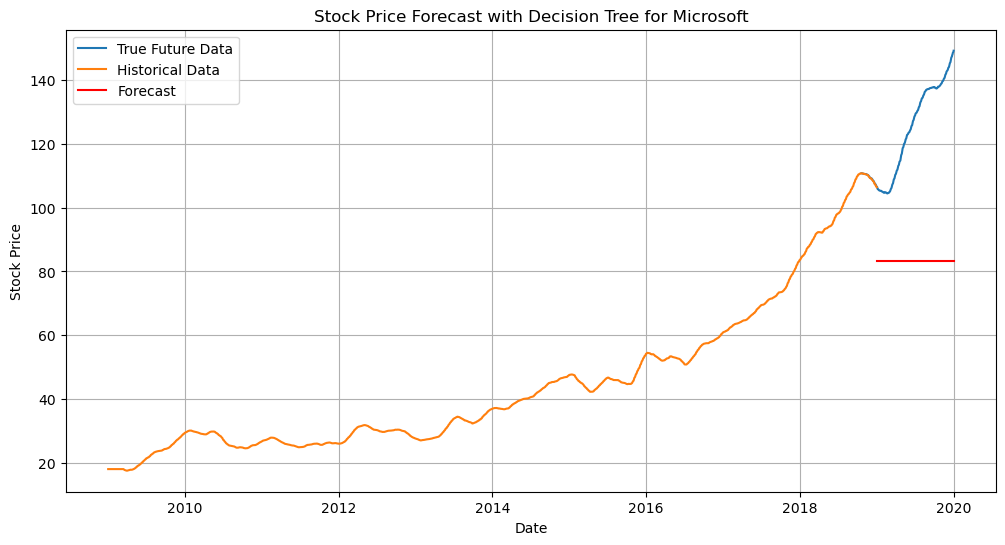

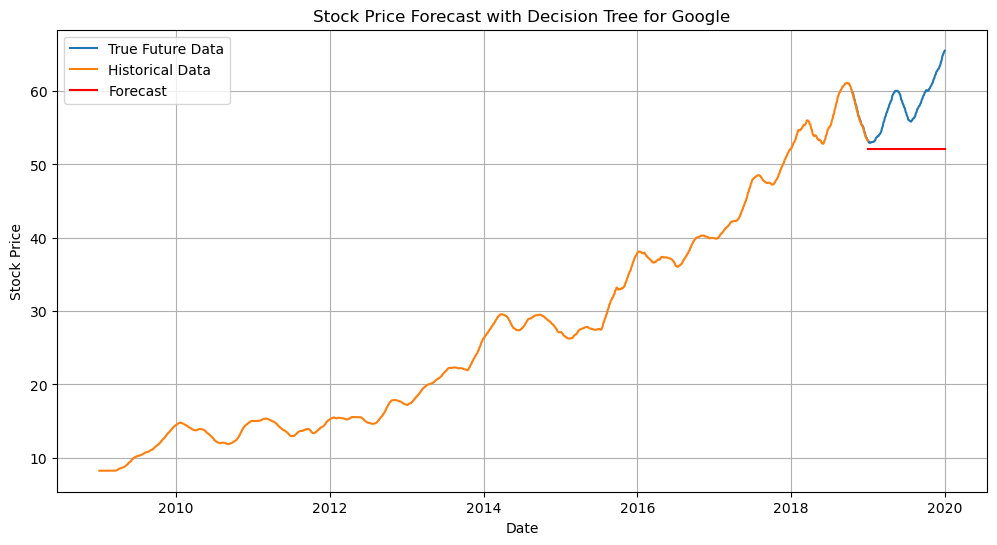

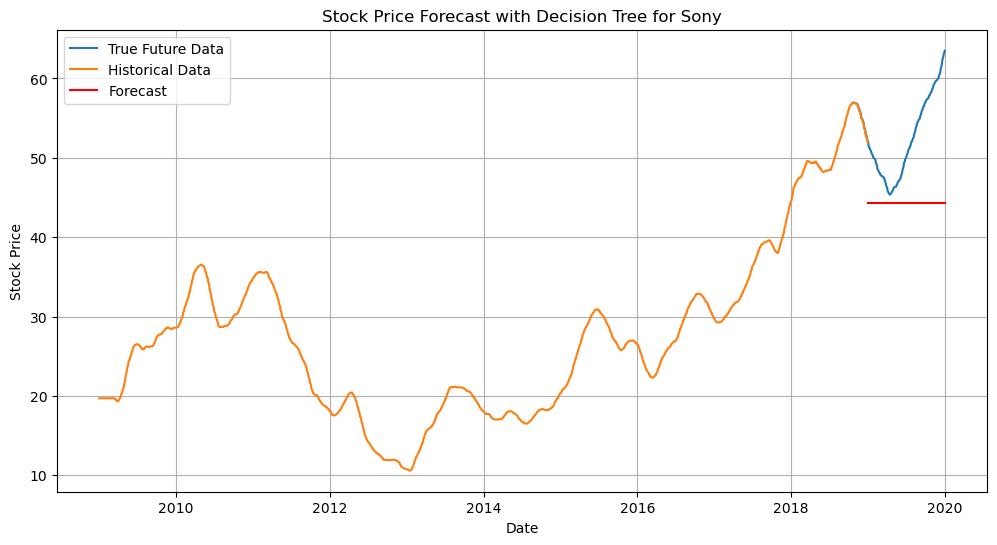

In [20]:
DecisionTree_Function(coke, 'Coke', new_coke)
DecisionTree_Function(pepsi, 'Pepsi', new_pepsi)
DecisionTree_Function(monster, 'Monster', new_monster)
DecisionTree_Function(nestle, 'Nestle', new_nestle)

DecisionTree_Function(apple, 'Apple', new_apple)
DecisionTree_Function(microsoft, 'Microsoft', new_microsoft)
DecisionTree_Function(google, 'Google', new_google)
DecisionTree_Function(sony, 'Sony', new_sony)

In [33]:
start = "2019-01-01"
end = '2020-1-01'
new_coke = yf.download('KO',start,end)

[*********************100%%**********************]  1 of 1 completed


In [35]:
new_coke.reset_index(inplace=True)
new_coke

Date       Open       High        Low      Close  Adj Close  \
0   2019-01-02  46.939999  47.220001  46.560001  46.930000  39.828793   
1   2019-01-03  46.820000  47.369999  46.529999  46.639999  39.582676   
2   2019-01-04  46.750000  47.570000  46.639999  47.570000  40.371948   
3   2019-01-07  47.570000  47.750000  46.900002  46.950001  39.845768   
4   2019-01-08  47.250000  47.570000  47.040001  47.480000  40.295570   
..         ...        ...        ...        ...        ...        ...   
247 2019-12-24  54.799999  55.000000  54.639999  54.709999  47.902802   
248 2019-12-26  54.919998  55.020000  54.790001  55.020000  48.174232   
249 2019-12-27  55.009998  55.450001  55.000000  55.349998  48.463177   
250 2019-12-30  55.180000  55.389999  55.060001  55.270000  48.393127   
251 2019-12-31  55.200001  55.380001  54.980000  55.349998  48.463177   

       Volume  
0    11603700  
1    14714400  
2    13013700  
3    13135500  
4    15420700  
..        ...  
247   3359300  
248   6228500  
249   6895500  
250   6431700  
251   7982600  

[252 rows x 7 columns]

In [38]:
# Make a multi dimensional array of the stock prices
data = pd.concat([coke['Open'],pepsi['Open'],monster['Open'],nestle['Open']],axis = 1)

# rename the columns
data.columns = ['KO','PEP','MNST','NSRGY']
data.reset_index(inplace=True)
data

# now i want to predict the stock price of coke trainging on the other 3 using an ARIMA model

# # Split the data into training and testing sets
# train_size = int(len(data) * 0.9)
# train, test = data[:train_size], data[train_size:]

# # Find the best ARIMA model parameters using auto_arima
# auto_model = auto_arima(train['KO'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
# best_order = auto_model.order

# # Define function to evaluate ARIMA model
# def evaluate_arima_model(train, test, order):
#     history = [x for x in train['KO']]
#     predictions = []
#     for t in range(len(test)):
#         model = ARIMA(history, order=order)
#         model_fit = model.fit()
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test['KO'].iloc[t])
#     error = mean_squared_error(test['KO'], predictions)
#     return error, predictions

# # Train the ARIMA model with the best parameters on the full dataset
# model = ARIMA(data['KO'], order=best_order)
# model_fit = model.fit()

# # Forecast next year of stock prices
# forecast = model_fit.forecast(steps=365)

# # Plotting
# plt.figure(figsize=(12, 6), dpi=300)
# plt.plot(new_coke['Date'], new_coke['Open'], label='True Future Data')
# plt.plot(data['Date'], data['KO'], label='Historical Data')
# plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
# plt.title('Stock Price Forecast with ARIMA for Coke')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.grid(True)
# plt.show()

Date         KO         PEP       MNST      NSRGY
0    2009-01-02  22.700001   54.930000   2.751667  39.750000
1    2009-01-05  22.785000   55.820000   2.880000  38.590000
2    2009-01-06  22.850000   55.930000   2.888333  38.599998
3    2009-01-07  22.110001   55.340000   2.810000  38.520000
4    2009-01-08  22.420000   53.799999   2.756667  38.599998
...         ...        ...         ...        ...        ...
2511 2018-12-24  47.619999  110.129997  24.125000  81.080002
2512 2018-12-26  45.880001  106.220001  24.055000  80.660004
2513 2018-12-27  46.740002  107.769997  24.270000  79.360001
2514 2018-12-28  47.889999  110.089996  24.760000  81.529999
2515 2018-12-31  47.490002  110.580002  24.565001  80.970001

[2516 rows x 5 columns]

In [47]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8) # Adjust the split ratio as needed
train_data, test_data = data[:train_size], data[train_size:]

# Function to train ARIMA model and evaluate
def train_arima(column):
    model = ARIMA(train_data.loc[:, column], order=(5,1,0)) # Adjust order as needed
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data.loc[:, column], forecast)
    return model_fit, forecast, mse

# Train ARIMA models for each stock
stocks = ["PEP", "MNST", "NSRGY"]
models = {}
forecasts = {}
mse_values = {}

for stock in stocks:
    model, forecast, mse = train_arima(stock)
    models[stock] = model
    forecasts[stock] = forecast
    mse_values[stock] = mse

# Find the best model
best_stock = min(mse_values, key=mse_values.get)
best_model = models[best_stock]

# Forecast "KO" using the best model
ko_model = ARIMA(train_data["KO"], order=(5,1,0)) # Use the same order as the best model
ko_model_fit = ko_model.fit()
ko_forecast = ko_model_fit.forecast(steps=len(test_data))

# Visualize results, etc. (not implemented in this code snippet)

# Print MSE values for each stock
for stock, mse in mse_values.items():
    print(f"MSE for {stock}: {mse}")

# Print best performing model
print(f"Best performing stock: {best_stock}, MSE: {mse_values[best_stock]}")

# Print forecast for "KO"
print("Forecast for KO:")
print(ko_forecast)


MSE for PEP: 75.57994346873372
MSE for MNST: 30.663271726112132
MSE for NSRGY: 124.32633486597551
Best performing stock: MNST, MSE: 30.663271726112132
Forecast for KO:
2012    41.498876
2013    41.501057
2014    41.499091
2015    41.500521
2016    41.502444
          ...    
2511    41.501957
2512    41.501957
2513    41.501957
2514    41.501957
2515    41.501957
Name: predicted_mean, Length: 504, dtype: float64


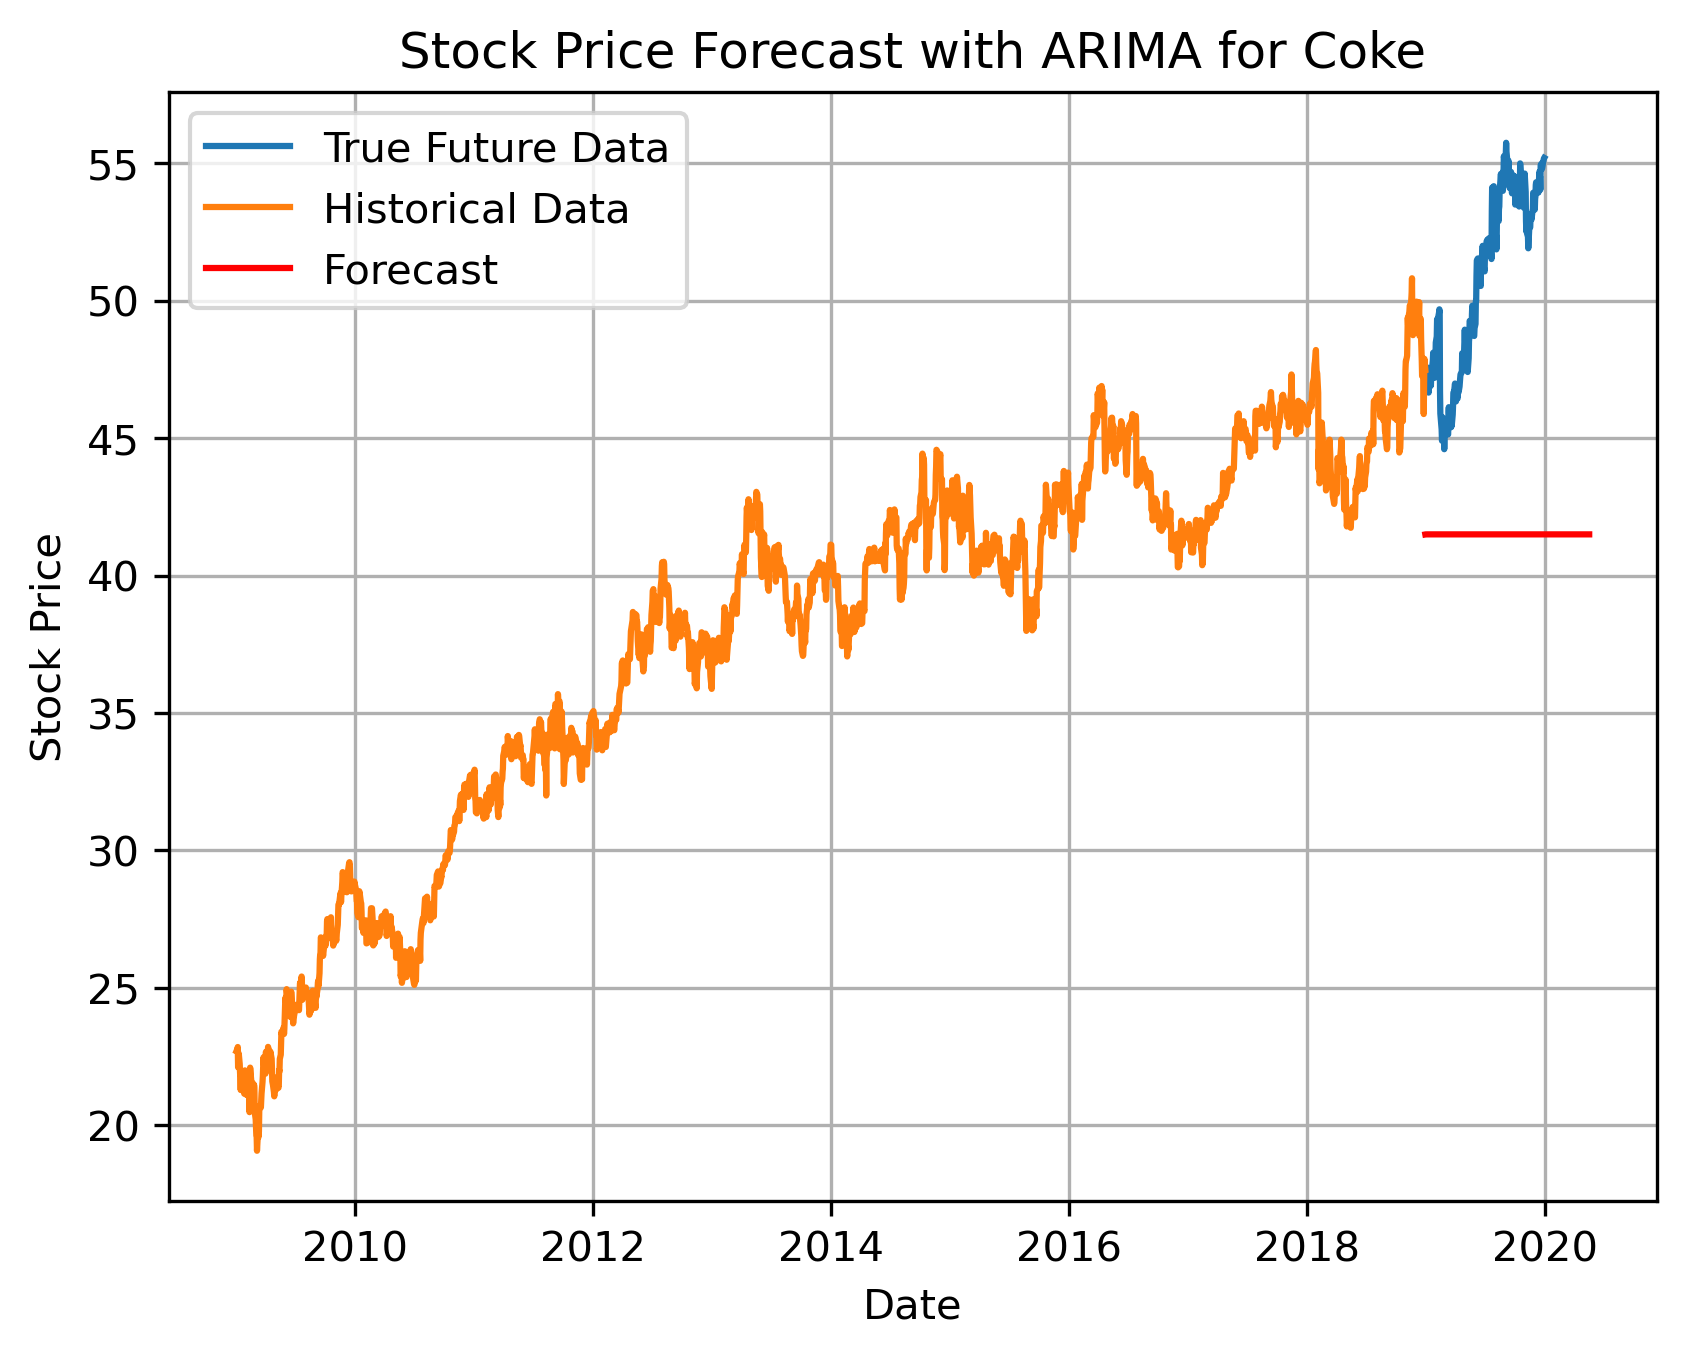

In [52]:
# Now using the best model we can forecast the stock price of coke and graph it
plt.figure(dpi=300)
plt.plot(new_coke['Date'], new_coke['Open'], label='True Future Data')
plt.plot(data['Date'], data['KO'], label='Historical Data')
# Plot ko_forecast here
plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=len(ko_forecast), freq='D'), ko_forecast, color='red', label='Forecast')
plt.title('Stock Price Forecast with ARIMA for Coke')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Create training DataFrame
train_data = data[['PEP', 'MNST', 'NSRGY']]

# Split into individual time series
pep_series = train_data['PEP']
mnst_series = train_data['MNST']
nsrgy_series = train_data['NSRGY']

# Check for stationarity and apply transformations if needed
# ...

# Fit ARIMA models
pep_model = auto_arima(pep_series, seasonal=False)
mnst_model = auto_arima(mnst_series, seasonal=False)
nsrgy_model = auto_arima(nsrgy_series, seasonal=False)

# Evaluate models
# ...

# Select the best model
best_model = pep_model  # Example: Assuming PEP model is the best

# Extract "KO" time series
ko_series = data['KO']

# Make predictions for "KO"
ko_forecast = best_model.predict(n_periods=10)  # Adjust n_periods as needed

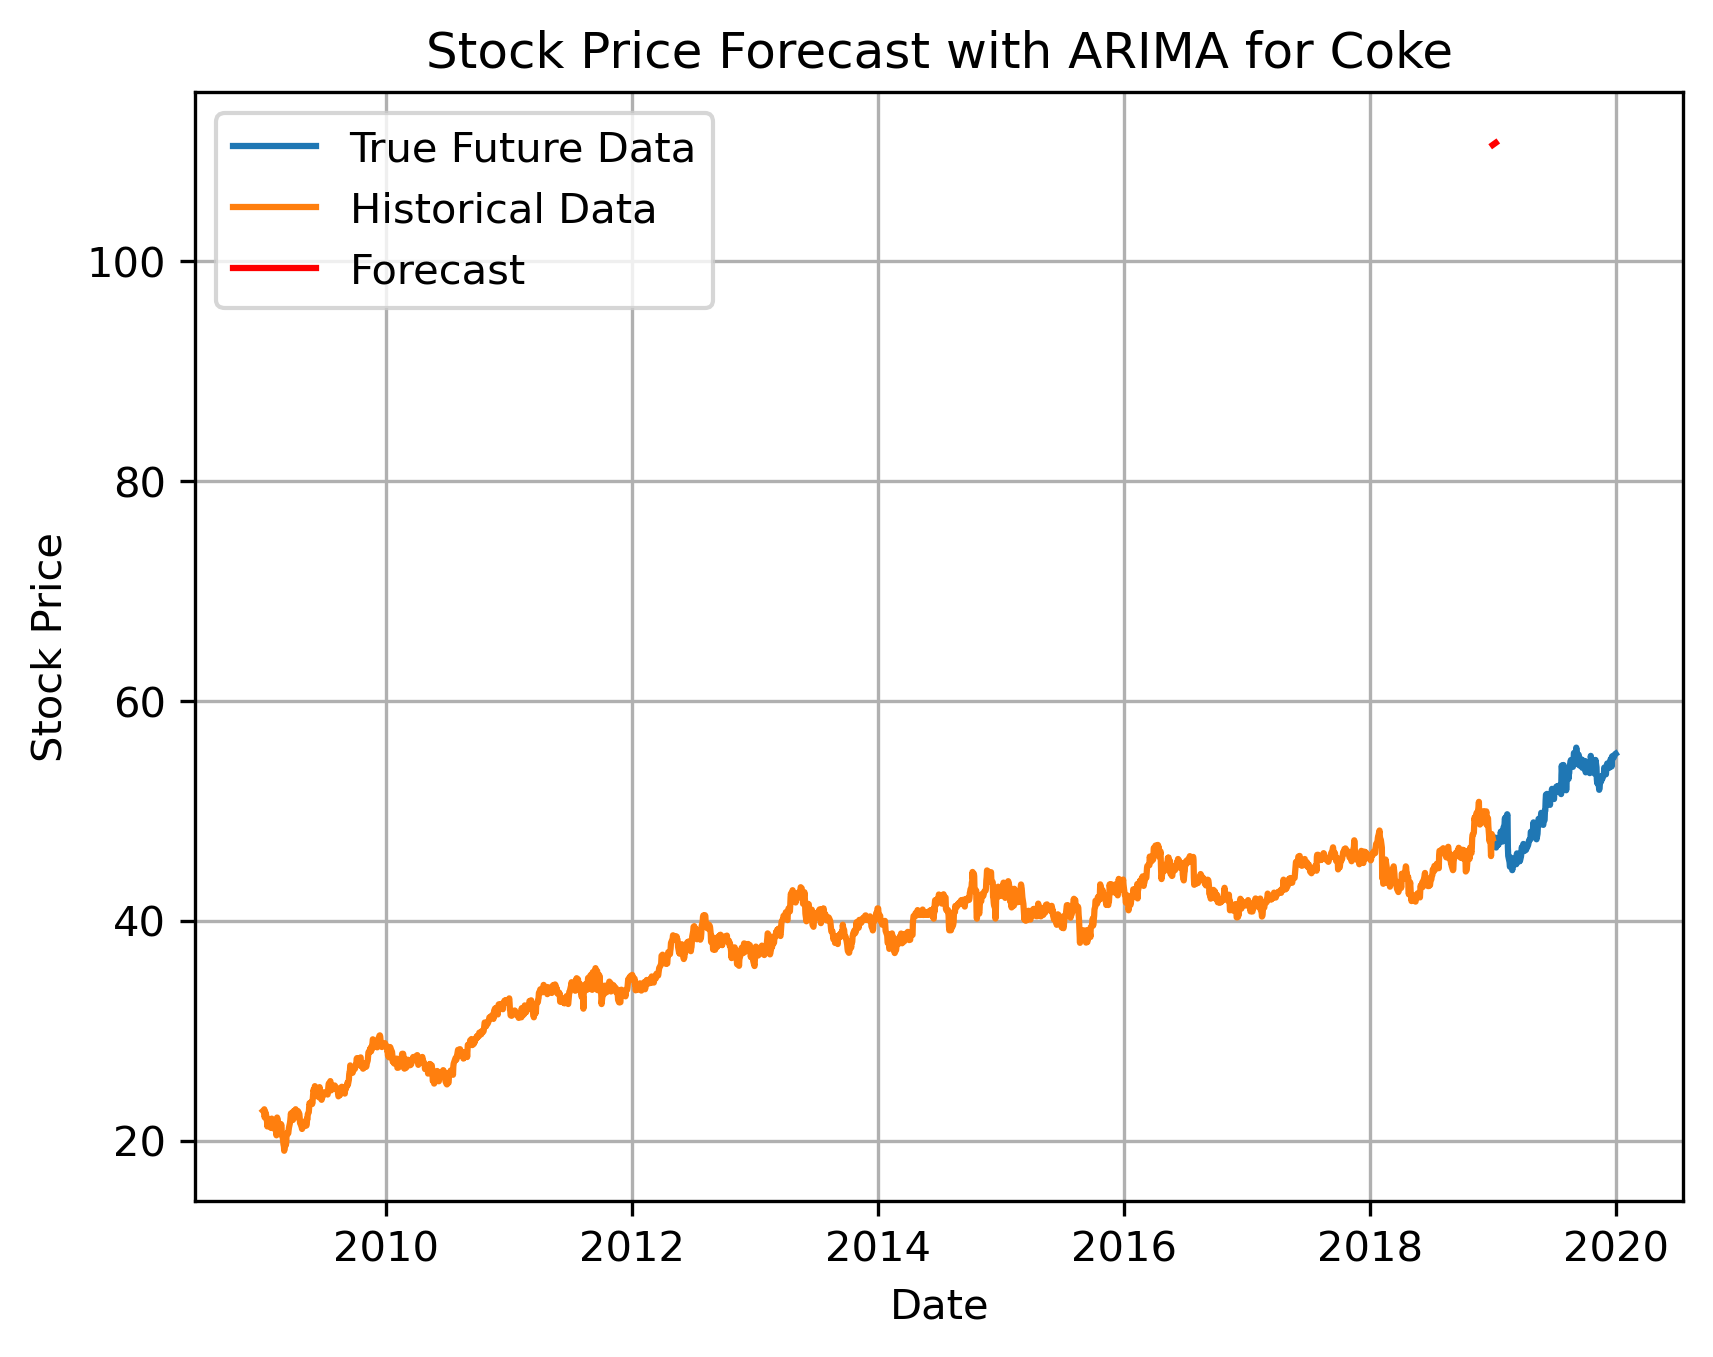

In [58]:
# Visualize results

# Now using the best model we can forecast the stock price of coke and graph it
plt.figure(dpi=300)
plt.plot(new_coke['Date'], new_coke['Open'], label='True Future Data')
plt.plot(data['Date'], data['KO'], label='Historical Data')
# Plot ko_forecast here
plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=len(ko_forecast), freq='D'), ko_forecast, color='red', label='Forecast')
plt.title('Stock Price Forecast with ARIMA for Coke')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
new_coke

Date       Open       High        Low      Close  Adj Close  \
0   2019-01-02  46.939999  47.220001  46.560001  46.930000  39.828793   
1   2019-01-03  46.820000  47.369999  46.529999  46.639999  39.582676   
2   2019-01-04  46.750000  47.570000  46.639999  47.570000  40.371948   
3   2019-01-07  47.570000  47.750000  46.900002  46.950001  39.845768   
4   2019-01-08  47.250000  47.570000  47.040001  47.480000  40.295570   
..         ...        ...        ...        ...        ...        ...   
247 2019-12-24  54.799999  55.000000  54.639999  54.709999  47.902802   
248 2019-12-26  54.919998  55.020000  54.790001  55.020000  48.174232   
249 2019-12-27  55.009998  55.450001  55.000000  55.349998  48.463177   
250 2019-12-30  55.180000  55.389999  55.060001  55.270000  48.393127   
251 2019-12-31  55.200001  55.380001  54.980000  55.349998  48.463177   

       Volume  
0    11603700  
1    14714400  
2    13013700  
3    13135500  
4    15420700  
..        ...  
247   3359300  
248   6228500  
249   6895500  
250   6431700  
251   7982600  

[252 rows x 7 columns]

In [68]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

def updated_ARIMA_Function(data, title, new_data):
    train_size = int(len(data) * 0.9)
    train, test = data[:train_size], data[train_size:]

    # Find the best ARIMA model parameters for each column
    best_orders = {}
    for col in ['PEP', 'MNST', 'NSRGY']:
        auto_model = auto_arima(train[col], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
        best_orders[col] = auto_model.order

    # Define function to evaluate ARIMA model
    def evaluate_arima_model(train, test, order):
        history = [x for x in train['KO']]
        predictions = []
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test['KO'].iloc[t])
        error = mean_squared_error(test['KO'], predictions)
        return error, predictions

    # Select the best ARIMA model order
    best_order = None
    min_error = float('inf')
    for order in best_orders.values():
        error, _ = evaluate_arima_model(train, test, order)
        if error < min_error:
            min_error = error
            best_order = order

    # Train the ARIMA model with the best parameters on the full dataset
    model = ARIMA(data['KO'], order=best_order)
    model_fit = model.fit()

    # Forecast next year of stock prices
    forecast = model_fit.forecast(steps=365)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(new_data.index, new_data['Open'], label='True Future Data')
    plt.plot(data.index, data['KO'], label='Historical Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
    plt.title('Stock Price Forecast with ARIMA for ' + title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4980.530, Time=8.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4998.823, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4987.171, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4987.614, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5000.264, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4989.372, Time=1.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4988.255, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.34 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4989.154, Time=2.18 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 

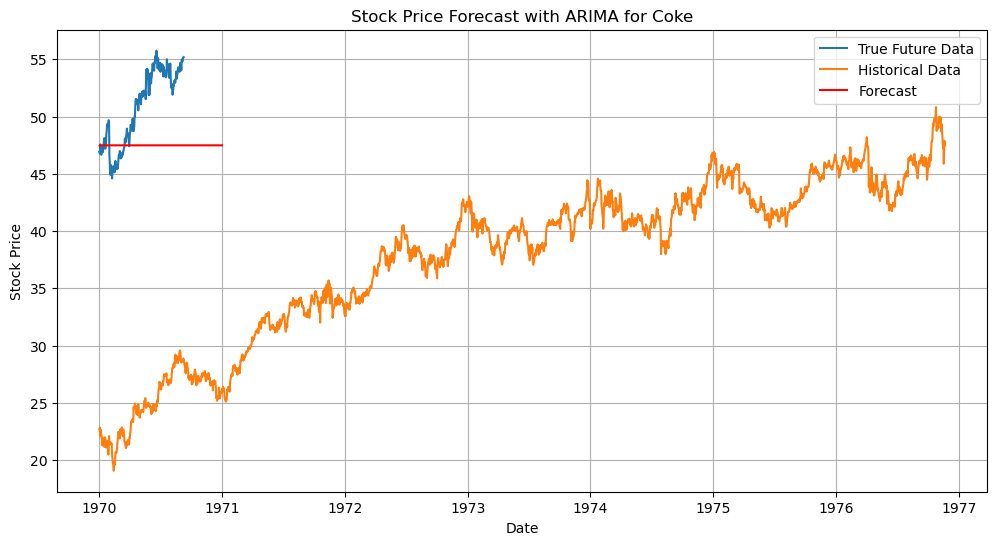

In [69]:
updated_ARIMA_Function(data, 'Coke', new_coke)

In [72]:
# make a dataframe called coke_open that is the open price of coke
coke_open = coke['Open']
coke_open = coke_open.reset_index()

coke_open

Date       Open
0    2009-01-02  22.700001
1    2009-01-05  22.785000
2    2009-01-06  22.850000
3    2009-01-07  22.110001
4    2009-01-08  22.420000
...         ...        ...
2511 2018-12-24  47.619999
2512 2018-12-26  45.880001
2513 2018-12-27  46.740002
2514 2018-12-28  47.889999
2515 2018-12-31  47.490002

[2516 rows x 2 columns]

In [81]:
# conduct and ADF test on coke_open
from statsmodels.tsa.stattools import adfuller

result = adfuller(coke_open['Open'])

print('ADF Statistic: %f' % result[0])

# check to see if the data is stationary 
if result[1] > 0.05:
    print('Data is not stationary')
else:
    print('Data is stationary')

# make the data stationary
coke_open['Open_diff'] = coke_open['Open'] - coke_open['Open'].shift(1)
coke_open

# Determine the order of the ARIMA model (p, d, q) based on the data's characteristics
from pmdarima import auto_arima

auto_model = auto_arima(coke_open['Open_diff'].dropna(), seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
best_order = auto_model.order

print(f'Best ARIMA model order: {best_order}')

# Create an ARIMA model object using ARIMA(data, order=(p, d, q)).
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(coke_open['Open'], order=best_order)
model_fit = model.fit()


ADF Statistic: -1.744935
Data is not stationary
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1945.448, Time=1.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1950.004, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1944.083, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1943.386, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1942.563, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1943.490, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1943.555, Time=0.57 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1941.674, Time=1.95 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1943.529, Time=0.65 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1940.294, Time=2.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1944.115, Time=2.19 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=1946.809, Time=0.87 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1945.527, Time=0.26 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=1945.459,

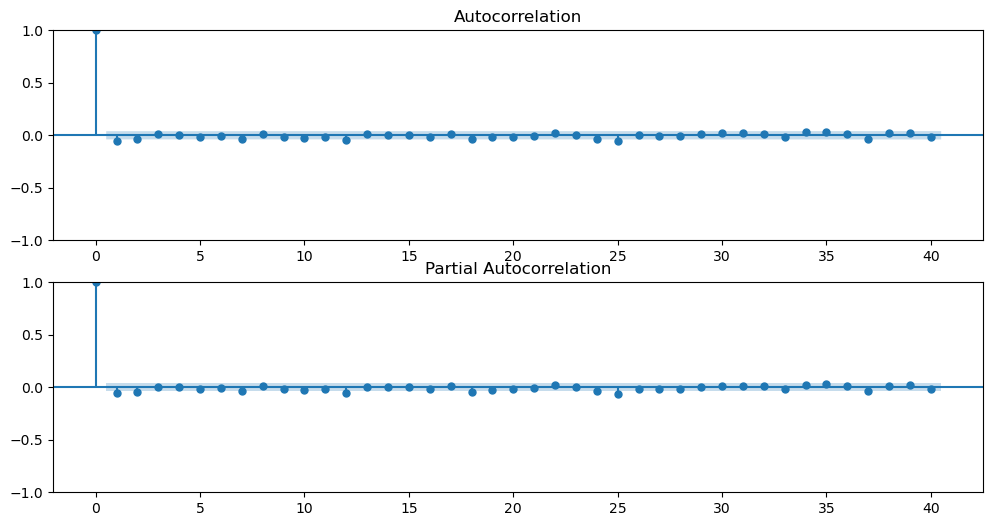

In [82]:
# plot the partial autocorrelation and autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(coke_open['Open_diff'].dropna(), ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(coke_open['Open_diff'].dropna(), ax=plt.gca(), lags=40)
plt.show()

In [84]:
# Train the ARIMA model, forecast the time series using return model_fit.forecast() and fit the model using print(model_fit.()).

# Train the ARIMA model
model = ARIMA(coke_open['Open'], order=best_order)
model_fit = model.fit()

# Forecast the time series
forecast = model_fit.forecast(steps=365)

# Fit the model
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 2516
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -971.277
Date:                Fri, 12 Apr 2024   AIC                           1954.554
Time:                        21:17:32   BIC                           1989.537
Sample:                             0   HQIC                          1967.251
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1400      6.222      5.648      0.000      22.945      47.335
ar.L1          0.9994      0.001   1299.558      0.000       0.998       1.001
ma.L1         -0.0578      0.015     -3.736      0.0

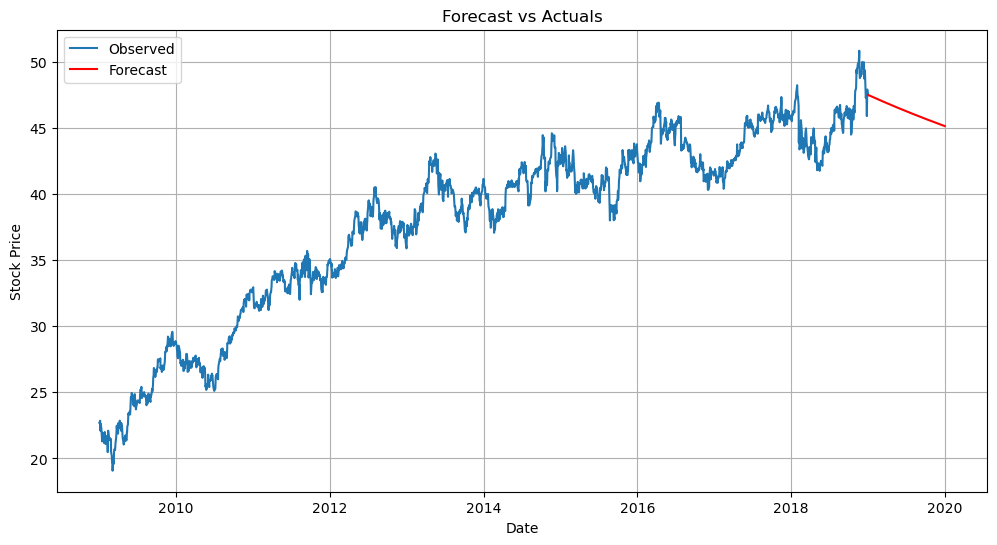

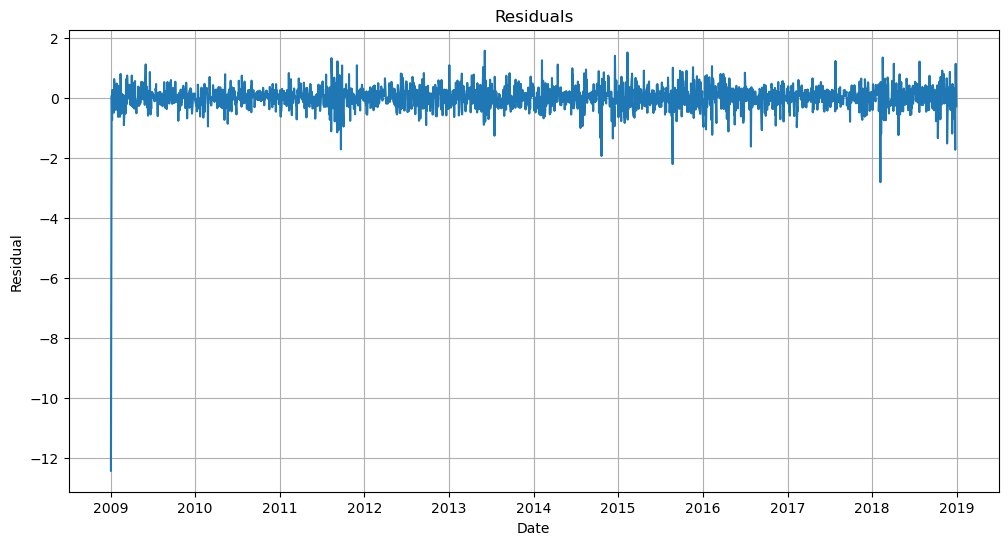

In [85]:
# plot the predicted vs the observed
plt.figure(figsize=(12, 6))
plt.plot(coke_open['Date'], coke_open['Open'], label='Observed')
plt.plot(pd.date_range(start=coke_open['Date'].iloc[-1], periods=366, freq='D')[1:], forecast, color='red', label='Forecast')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# plot the residuals
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.plot(coke_open['Date'], residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

In [120]:
start = "2019-01-01"
end = '2022-1-01'
new_coke = yf.download('KO',start,end)

new_coke

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  46.939999  47.220001  46.560001  46.930000  39.828789  11603700
2019-01-03  46.820000  47.369999  46.529999  46.639999  39.582672  14714400
2019-01-04  46.750000  47.570000  46.639999  47.570000  40.371952  13013700
2019-01-07  47.570000  47.750000  46.900002  46.950001  39.845768  13135500
2019-01-08  47.250000  47.570000  47.040001  47.480000  40.295574  15420700
...               ...        ...        ...        ...        ...       ...
2021-12-27  58.000000  58.689999  58.000000  58.650002  54.784252   9860000
2021-12-28  58.400002  58.939999  58.299999  58.880001  54.999092   8979900
2021-12-29  58.950001  59.099998  58.660000  58.950001  55.064472   9996000
2021-12-30  59.060001  59.230000  58.759998  58.779999  54.905682   7703900
2021-12-31  58.750000  59.349998  58.700001  59.209999  55.307343  10021300

[757 rows x 6 columns]

In [127]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


# train_data, test_data = coke[0:int(len(coke)*0.9)], coke[int(len(coke)*0.9):]
train_data, test_data = coke, new_coke



train_arima = train_data['Open']
test_arima = test_data['Open']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

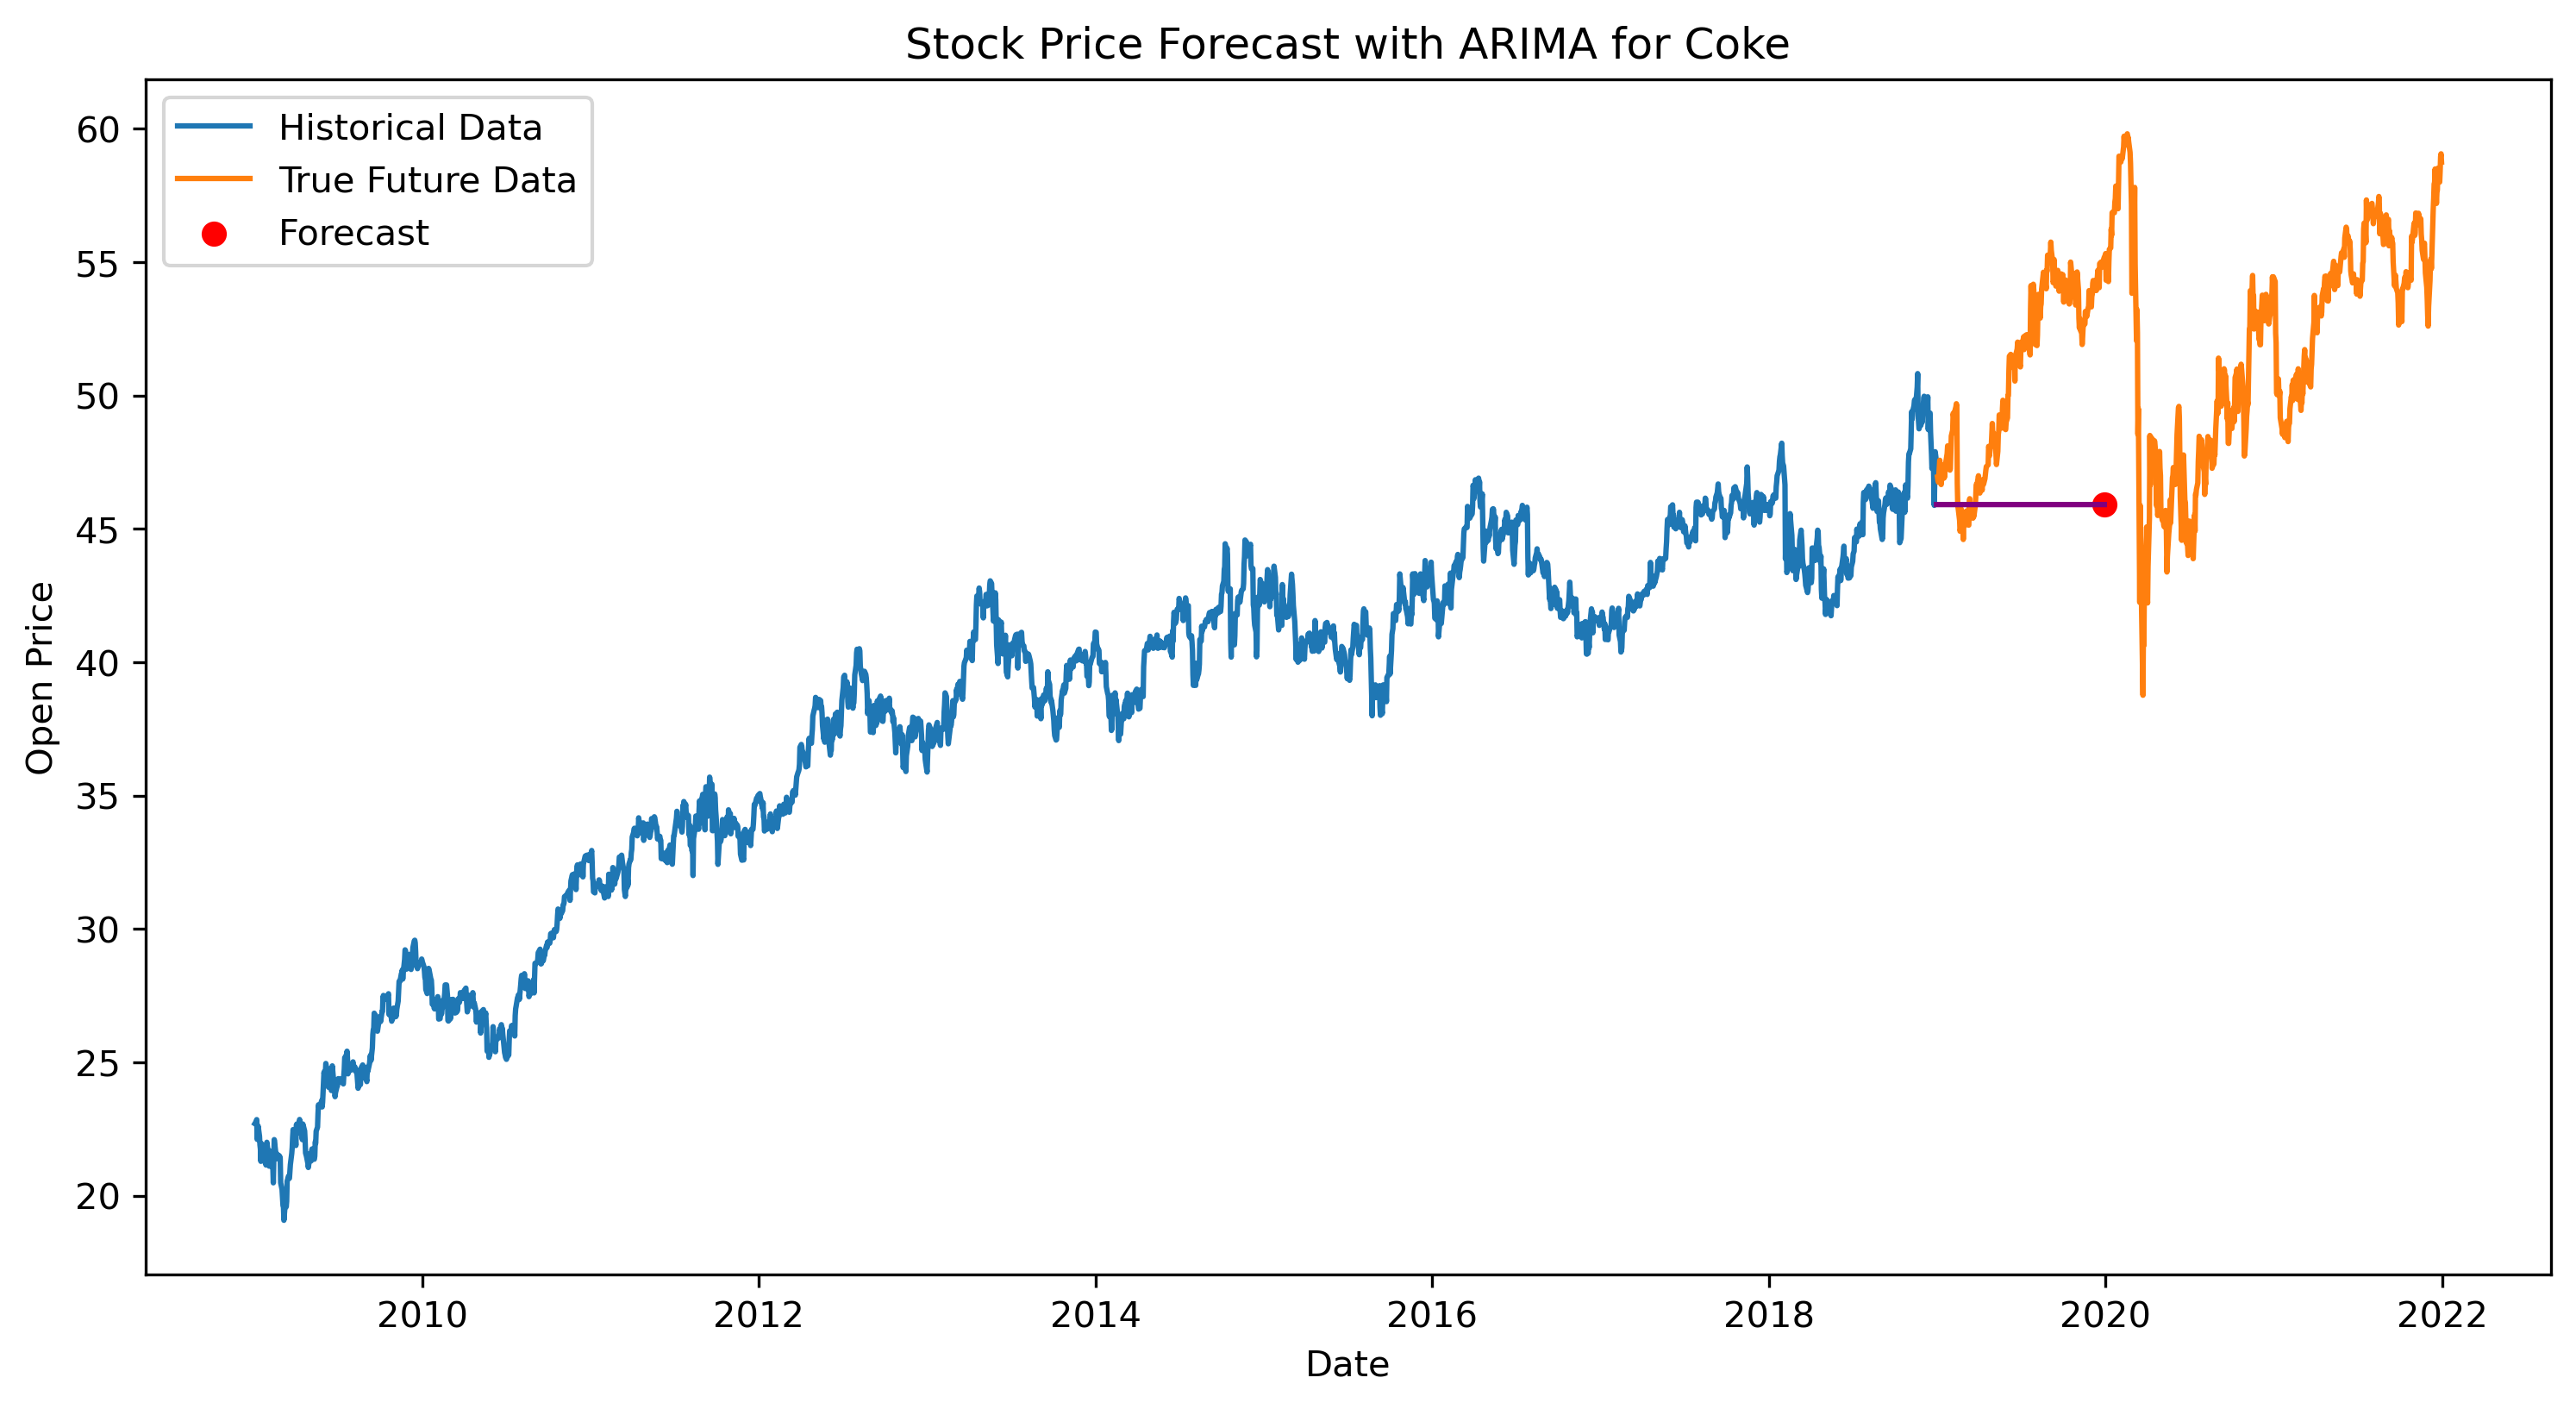

In [171]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Assuming train_data and test_data are defined earlier
train_arima = train_data['Open']
test_arima = test_data['Open']

history = [x for x in train_arima]
y = test_arima

# Fit the ARIMA model
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()

# Forecast for the next year (assuming 'test_data' is the data for the next year)
forecast_steps = 365
forecast = model_fit.forecast(steps=forecast_steps)[0]

# forecast_array = []
# for i in range(1, 366):
#     forecast_steps = i
#     forecast = model_fit.forecast(steps=forecast_steps)[0]
#     forecast_array.append(forecast)

forecast_array = []
history = [x for x in train_arima]  # Reset history

for i in range(1, 366):
    forecast_steps = i
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)[0]  # Forecast one step
    forecast_array.append(forecast)
    
    # Update history with the forecasted value
    history.append(forecast)


# Now 'forecast' contains the predictions for the next year


# Assuming 'test_data' contains the actual data for the next year

plt.figure(figsize=(12, 6), dpi=300)
# Plot actual data
plt.plot(coke.index, coke['Open'], label='Historical Data')
plt.plot(new_coke.index, new_coke['Open'], label='True Future Data')

# Plot forecasted data
forecast_index = pd.date_range(start=test_data.index[-1], periods=forecast_steps+1)
plt.scatter(forecast_index[-1], forecast, color='red', label='Forecast')

# have the forecast_index have 1 less value
forecast_index = forecast_index[:-1]
# plot forecast_array
plt.plot(forecast_index, forecast_array, color='purple')

plt.title('Stock Price Forecast with ARIMA for Coke')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()



In [122]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

In [123]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 0.5454223521179395
MAE: 0.47034406736205475
RMSE: 0.7385271505624824


In [124]:
test_data

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  46.939999  47.220001  46.560001  46.930000  39.828789  11603700
2019-01-03  46.820000  47.369999  46.529999  46.639999  39.582672  14714400
2019-01-04  46.750000  47.570000  46.639999  47.570000  40.371952  13013700
2019-01-07  47.570000  47.750000  46.900002  46.950001  39.845768  13135500
2019-01-08  47.250000  47.570000  47.040001  47.480000  40.295574  15420700
...               ...        ...        ...        ...        ...       ...
2021-12-27  58.000000  58.689999  58.000000  58.650002  54.784252   9860000
2021-12-28  58.400002  58.939999  58.299999  58.880001  54.999092   8979900
2021-12-29  58.950001  59.099998  58.660000  58.950001  55.064472   9996000
2021-12-30  59.060001  59.230000  58.759998  58.779999  54.905682   7703900
2021-12-31  58.750000  59.349998  58.700001  59.209999  55.307343  10021300

[757 rows x 6 columns]

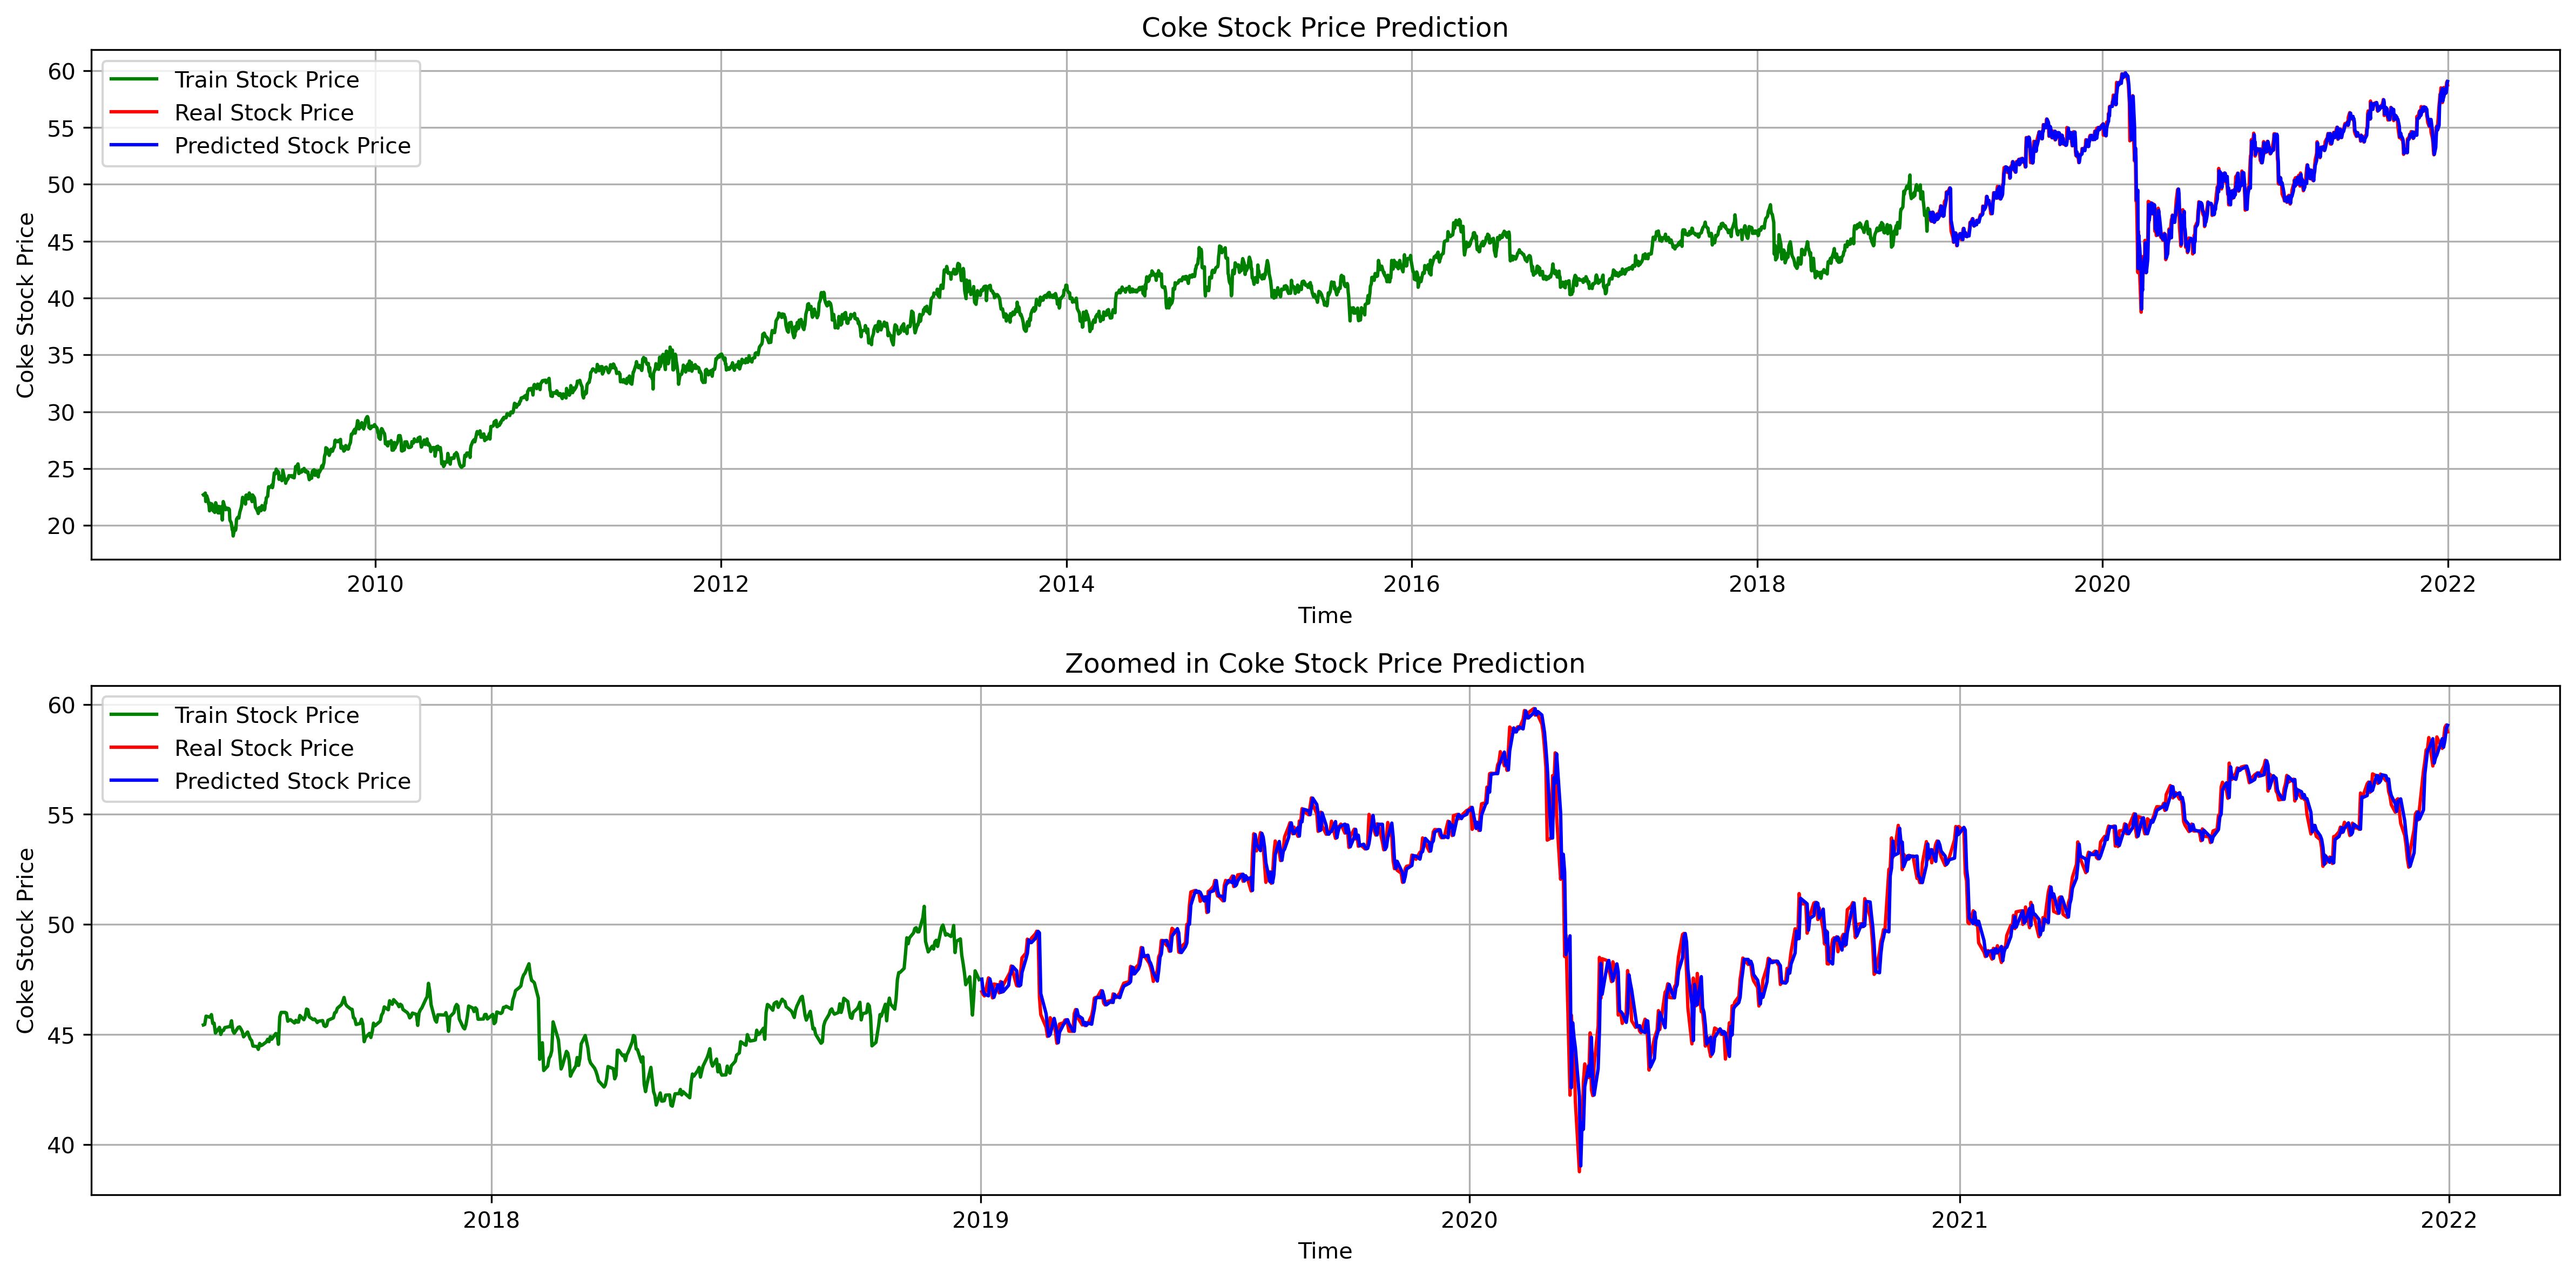

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=300)
plt.subplot(2, 1, 1)
plt.plot(coke.index[-3285:], coke['Open'].tail(3285), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Coke Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Coke Stock Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(coke.index[-400:], coke['Open'].tail(400), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Zoomed in Coke Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Coke Stock Price')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

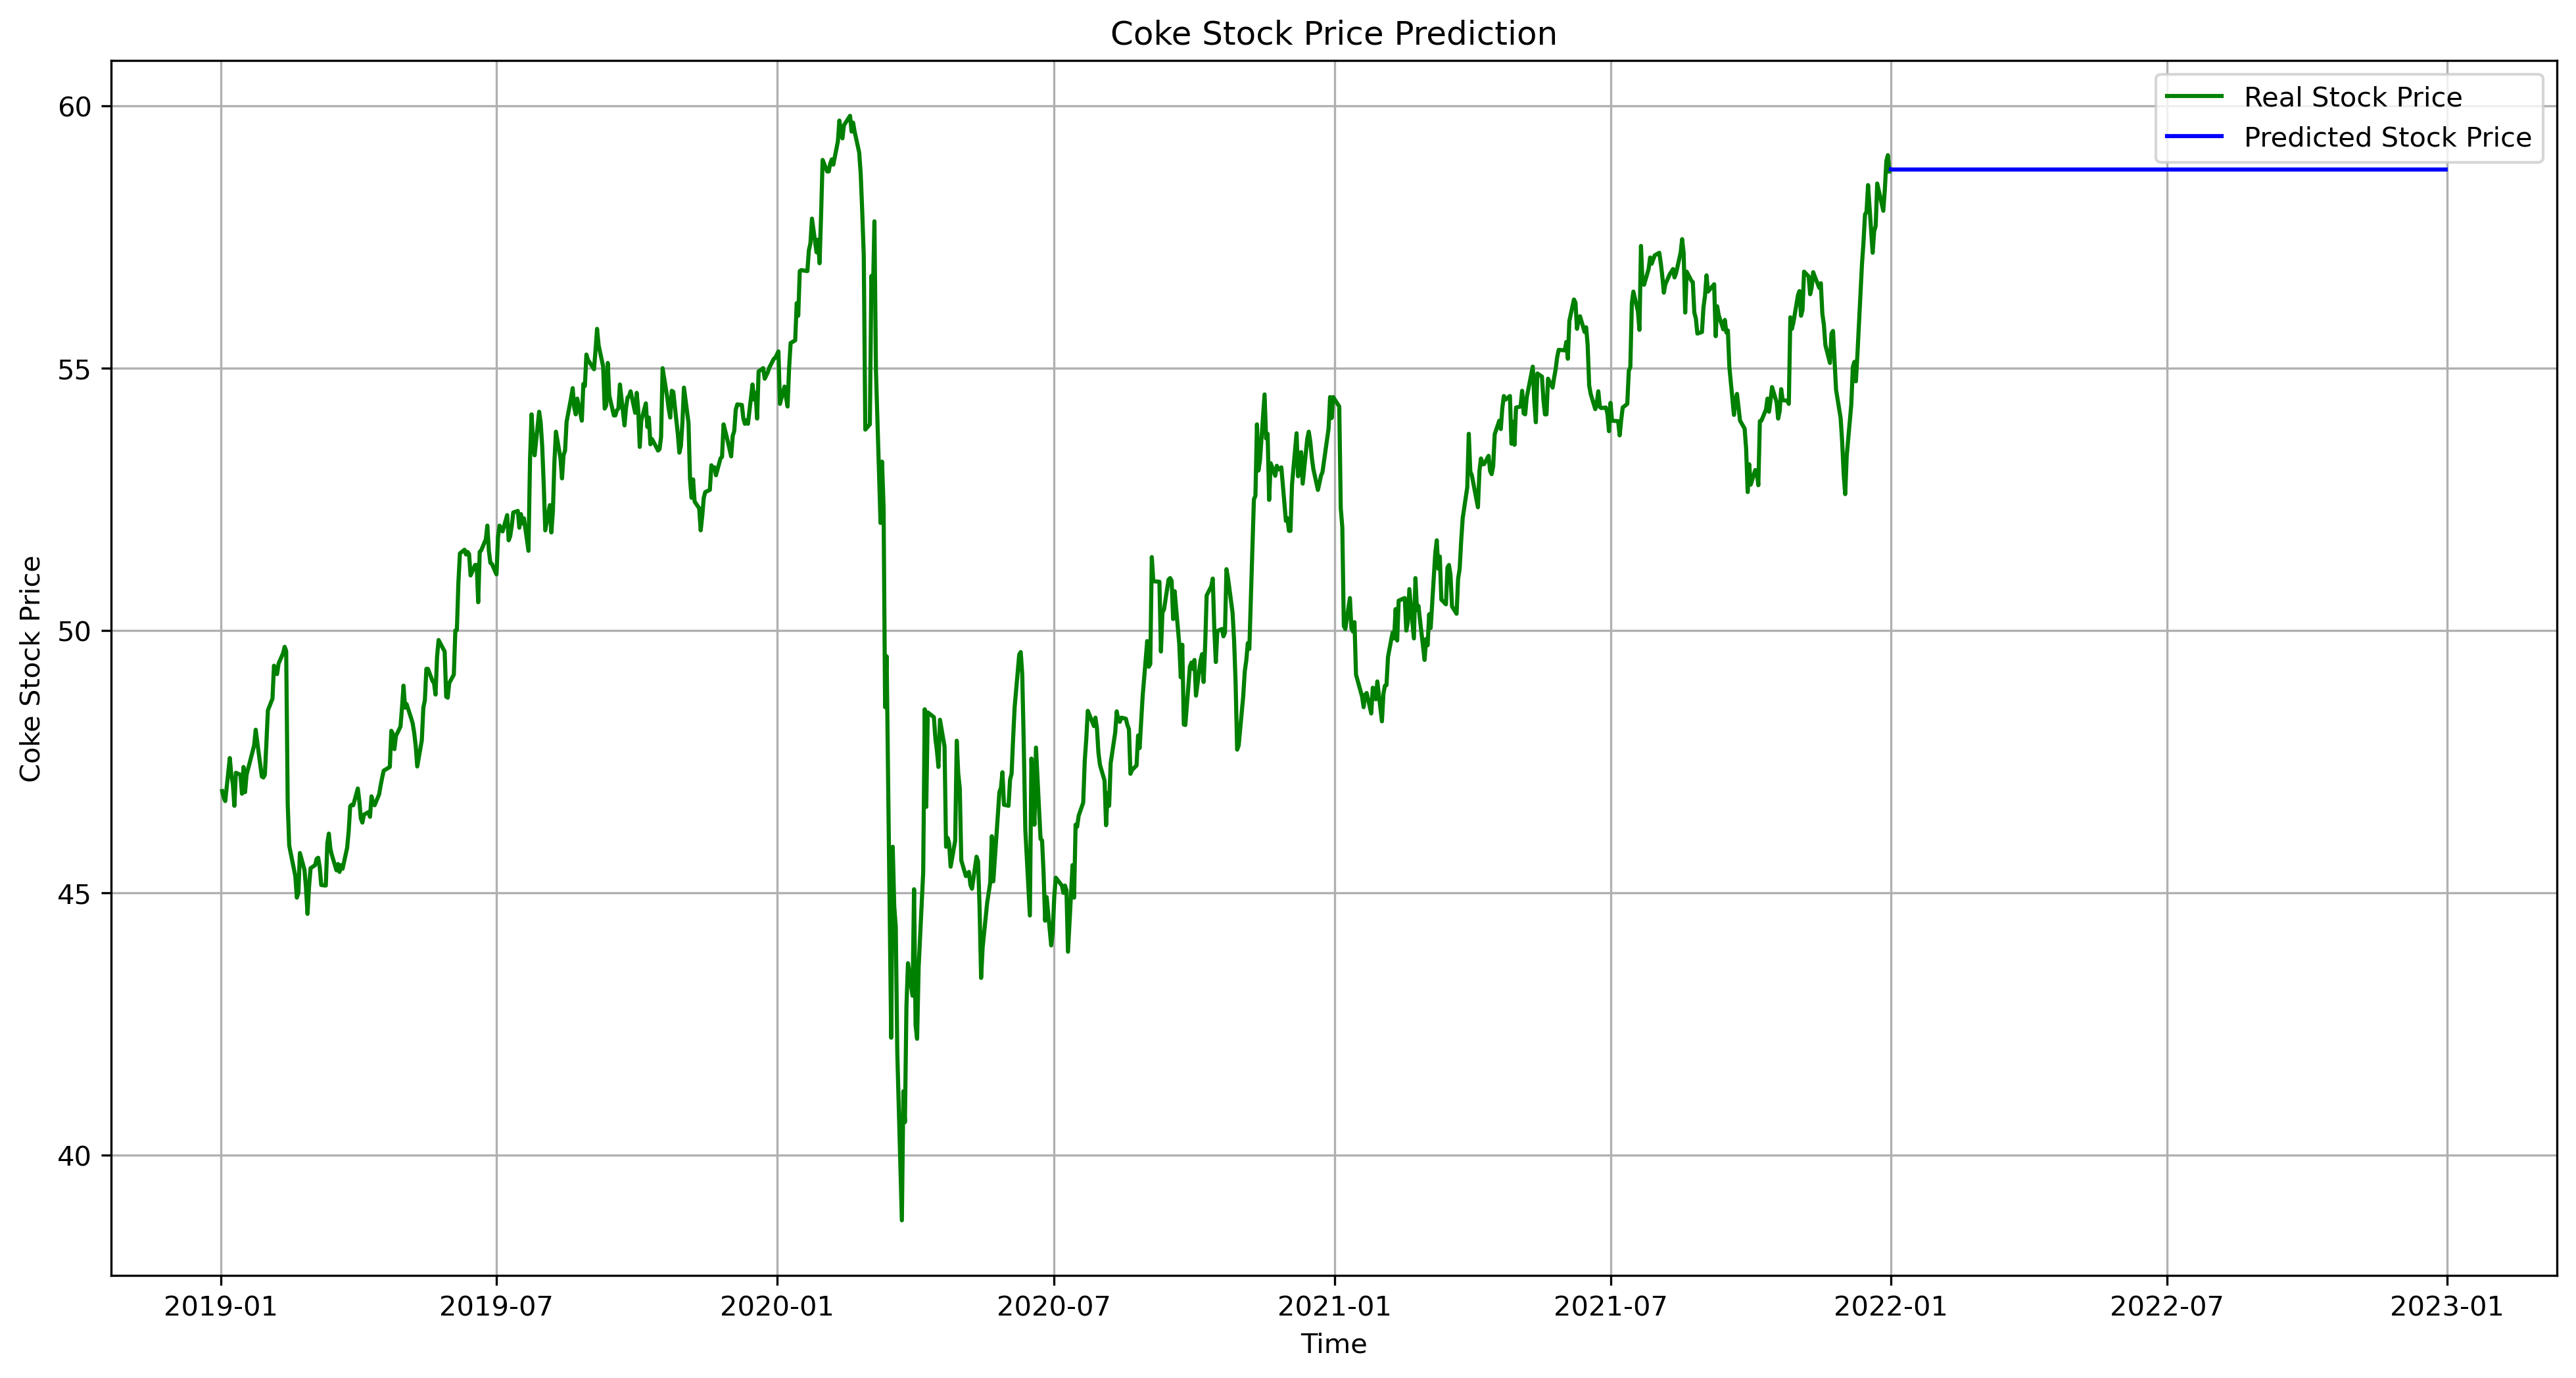

In [126]:
# now predict the future stock price of coke without a test set
future = new_coke['Open']
history = [x for x in future]
future_predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
future_predictions.append(yhat)
history.append(yhat)

# rolling forecasts
for i in range(1, 365):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    future_predictions.append(yhat)
    # observation
    history.append(yhat)

future_predictions

plt.figure(figsize=(16,8), dpi=300)
plt.plot(new_coke.index, new_coke['Open'], color='green', label = 'Real Stock Price')
plt.plot(pd.date_range(start=new_coke.index[-1], periods=366, freq='D')[1:], future_predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Coke Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Coke Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Convert pandas DataFrames to numpy arrays
train_data = np.asarray(train_arima)
test_data = np.asarray(test_arima)

# Initialize an empty list to store predictions
predictions = []

# Initialize the ARIMA model
model = None

# Define the order of the ARIMA model
order = (1, 1, 0)  # Example order, replace with appropriate values

# Iterate through each observation in the test data
for obs in test_data:
    # Update the model with the latest observation
    if model is None:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
    else:
        # Concatenate the new observation to the end of the training data
        train_data = np.append(train_data, obs)
        # Re-fit the model with the updated training data
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()

    # Make a one-step forecast
    yhat = model_fit.forecast(steps=1)
    predictions.append(yhat[0])

# Print the predictions
print("Predictions:", predictions)


Predictions: [47.51244126978122, 46.857005476683604, 46.75385056323575, 47.52474653143777, 47.267884636295726, 47.089471082358585, 46.683299212553706, 47.25455172225187, 47.25225114650744, 46.910243048774355, 47.37104320997948, 46.94759633020346, 47.23087750825036, 47.67414102973746, 47.81312828182212, 48.09342654947075, 47.89319010416773, 47.257531095720665, 47.201135706619866, 47.24716259679284, 47.81600522098034, 48.445083041690665, 48.687916837897156, 49.295672961086765, 49.21655804357772, 49.17218379873918, 49.359066108608594, 49.55909290448041, 49.683464326602895, 49.61435891513672, 46.85644446609425, 45.93631616512428, 45.345469864473095, 44.92769414967273, 44.99610787491611, 45.727288223899144, 45.4539802766437, 45.11473884897608, 44.62141399328322, 45.09733966404825, 45.45495207288958, 45.52742374831228, 45.644853780169235, 45.66914055308246, 45.49772328984874, 45.16452361017298, 45.140426351947156, 45.91540464141289, 46.12240614849958, 45.85228031207609, 45.72506890978546, 45

In [137]:
test_data

array([46.93999863, 46.81999969, 46.75      , 47.56999969, 47.25      ,
       47.08000183, 46.65999985, 47.29000092, 47.25      , 46.88999939,
       47.40000153, 46.91999817, 47.25      , 47.70000076, 47.81999969,
       48.11000061, 47.88000107, 47.22000122, 47.20000076, 47.25      ,
       47.84999847, 48.47999954, 48.70000076, 49.33000183, 49.20999908,
       49.16999817, 49.36999893, 49.56999969, 49.68999863, 49.61000061,
       46.70000076, 45.90000153, 45.31999969, 44.90999985, 45.        ,
       45.75999832, 45.43999863, 45.09999847, 44.59999847, 45.11999893,
       45.47000122, 45.52999878, 45.65000153, 45.66999817, 45.49000168,
       45.15000153, 45.13999939, 45.95000076, 46.13000107, 45.84000015,
       45.72000122, 45.43000031, 45.54999924, 45.40000153, 45.52999878,
       45.45999908, 45.86000061, 46.16999817, 46.65000153, 46.68000031,
       46.66999817, 46.99000168, 46.75      , 46.41999817, 46.34000015,
       46.49000168, 46.54000092, 46.45000076, 46.84000015, 46.72

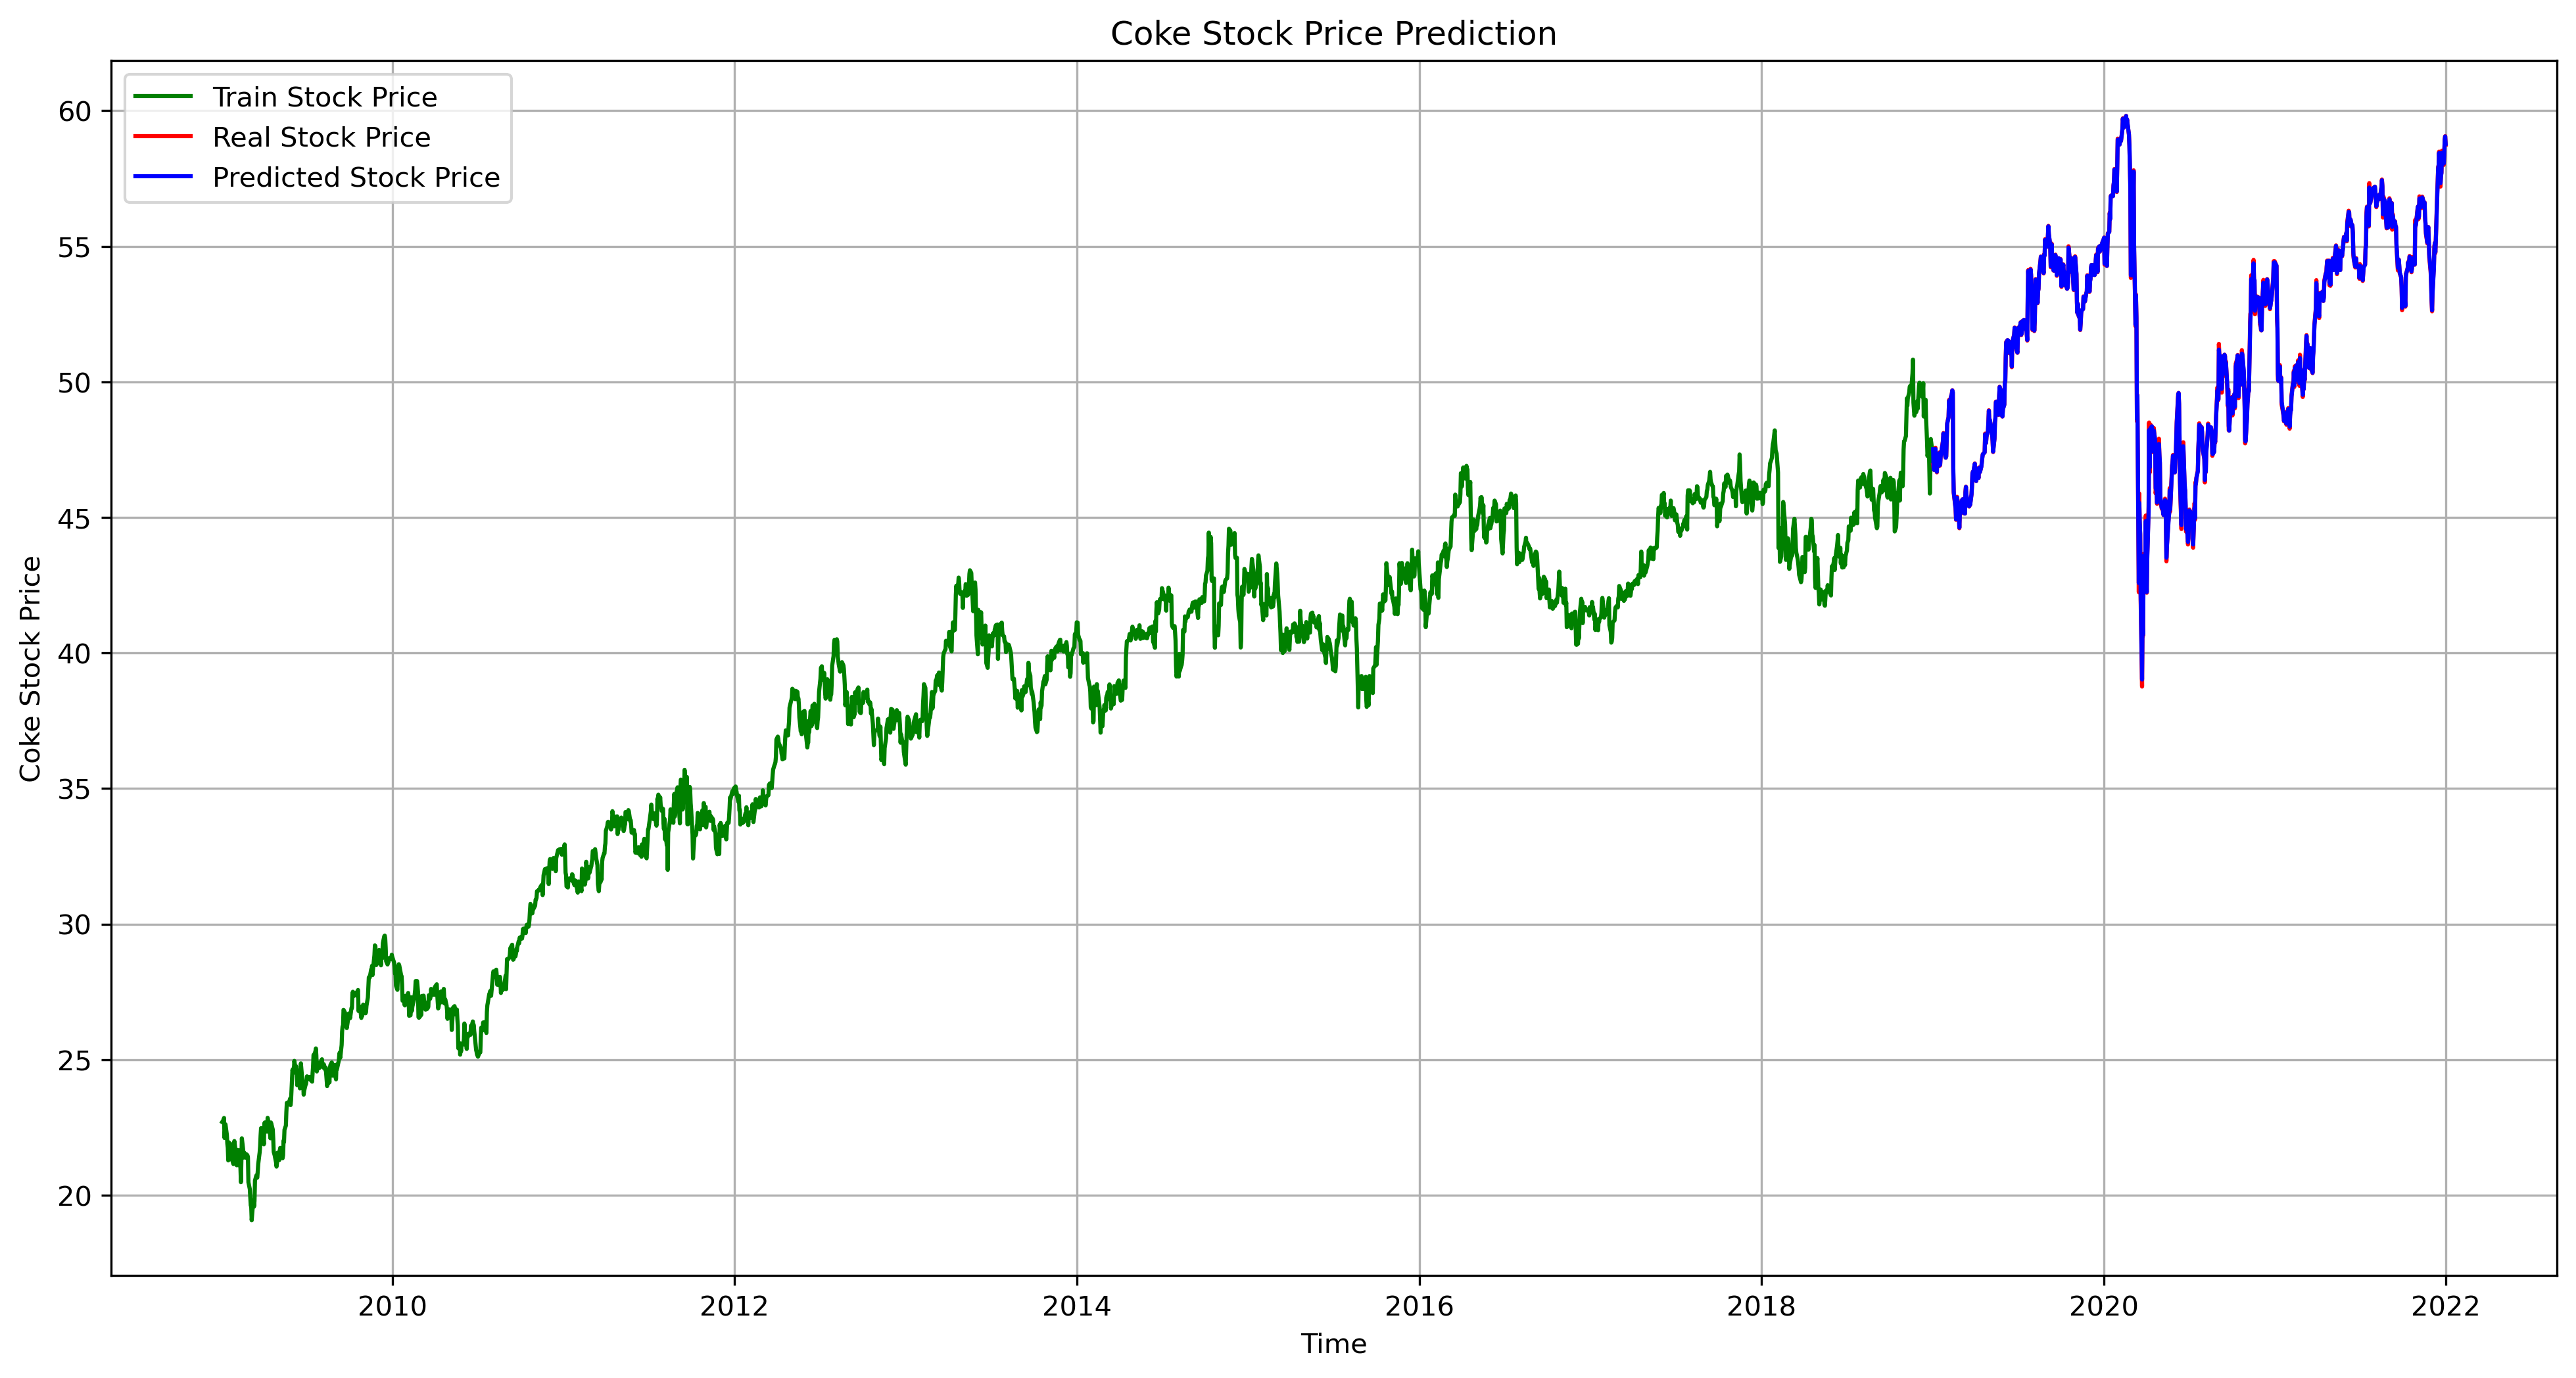

In [139]:
# plot these predictions
plt.figure(figsize=(16,8), dpi=300)
plt.plot(coke.index[-3285:], coke['Open'].tail(3285), color='green', label = 'Train Stock Price')
plt.plot( y, color = 'red', label = 'Real Stock Price')
plt.plot(new_coke.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Coke Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Coke Stock Price')
plt.legend()
plt.grid(True)
plt.show()